In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [34]:
allergies = pd.read_csv('allergies.csv')
cancer = pd.read_csv('cancer.csv')
careplans = pd.read_csv('careplans.csv')
claims = pd.read_csv('claims.csv')
conditions = pd.read_csv('conditions.csv')
diabetes = pd.read_csv('diabetes.csv')
encounters = pd.read_csv('encounters.csv') ##NOT USING RN, DO WE NEED?
etc = pd.read_csv('etc.csv')
heart = pd.read_csv('heart.csv')
immunizations = pd.read_csv('immunizations.csv')
lungs = pd.read_csv('lungs.csv')
medications = pd.read_csv('medications.csv')
observations = pd.read_csv('observations.csv')
patients = pd.read_csv('patients.csv')
pregnancy = pd.read_csv('pregnancy.csv')
procedures = pd.read_csv('procedures.csv')

Exploring Data by Visualization

In [35]:
# careplans #yeah
# conditions #yeah
# encounters #yeah
# immunizations #not best
# observations #might be cool to look at our average patient stats
# patients #could combine with above to give ethnicity and gender too ^

                              DESCRIPTION  count
67                      Stress management    830
34                       Exercise therapy    719
57       Recommendation to avoid exercise    641
22  Deep breathing and coughing exercises    641
60                    Respiratory therapy    641
62                 Routine antenatal care    609
6                     Antenatal education    609
53               Pregnancy diet education    609
27                          Diabetic diet    498
26          Diabetes self management plan    498


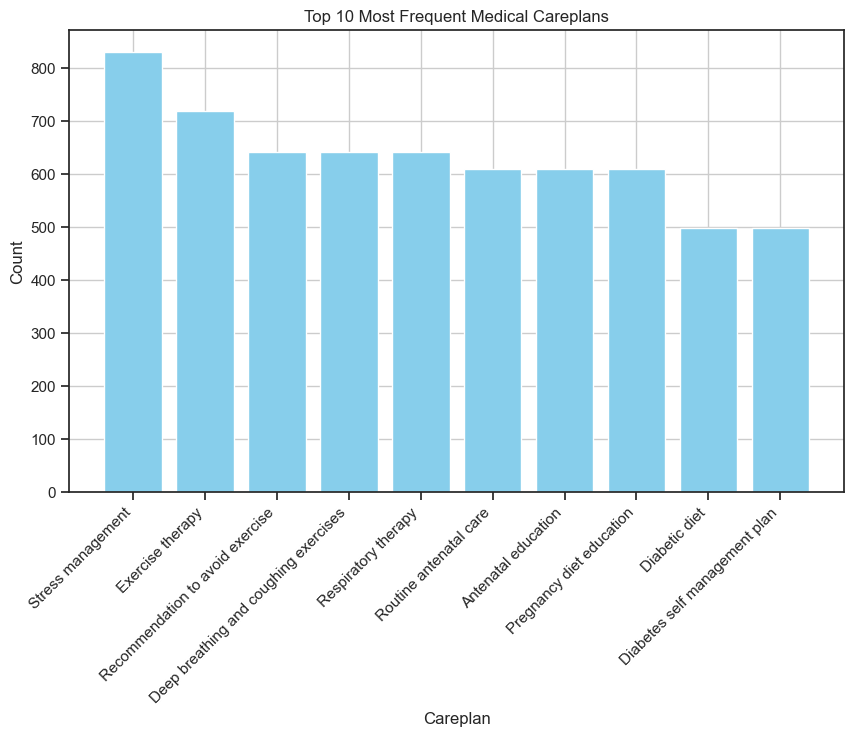

In [67]:
# careplans viz 
careplanCounts = careplans.groupby('DESCRIPTION').size().reset_index(name='count')
careplanCounts = careplanCounts.sort_values(by='count', ascending=False)
top10Careplans = careplanCounts.head(10)
print(top10Careplans)

plt.figure(figsize=(10, 6))
plt.bar(top10Careplans['DESCRIPTION'], top10Careplans['count'], color='skyblue')
plt.xlabel('Careplan')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Careplans')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

                              DESCRIPTION  count
116            Viral sinusitis (disorder)   1125
3      Acute viral pharyngitis (disorder)    602
2             Acute bronchitis (disorder)    508
86                            Prediabetes    458
52                           Hypertension    373
75                       Normal pregnancy    339
20           Chronic sinusitis (disorder)    329
79                           Otitis media    202
110  Streptococcal sore throat (disorder)    146
108                       Sprain of ankle    108


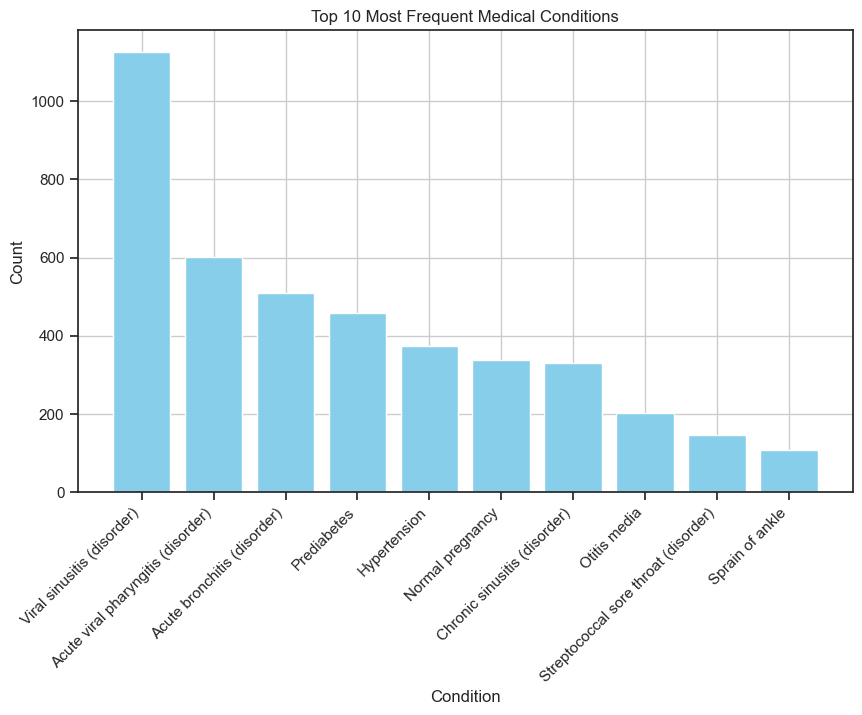

In [68]:
#conditions viz 
conditionsCounts = conditions.groupby('DESCRIPTION').size().reset_index(name='count')
conditionsCounts = conditionsCounts.sort_values(by='count', ascending=False)
top10Conditions = conditionsCounts.head(10)
print(top10Conditions)

plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(top10Conditions['DESCRIPTION'], top10Conditions['count'], color='skyblue')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

#note that there is some matchup between top 10 careplans and top 10 conditions. this is good bc is expected behavior 

                    DESCRIPTION  count
22         Outpatient Encounter   8629
17        Encounter for symptom   2852
24  Patient encounter procedure   1524
27               Prenatal visit   1383
23         Outpatient procedure   1281
5    Consultation for treatment    899
15     Encounter for 'check-up'    751
13     Emergency room admission    694
16        Encounter for problem    628
6           Death Certification    461


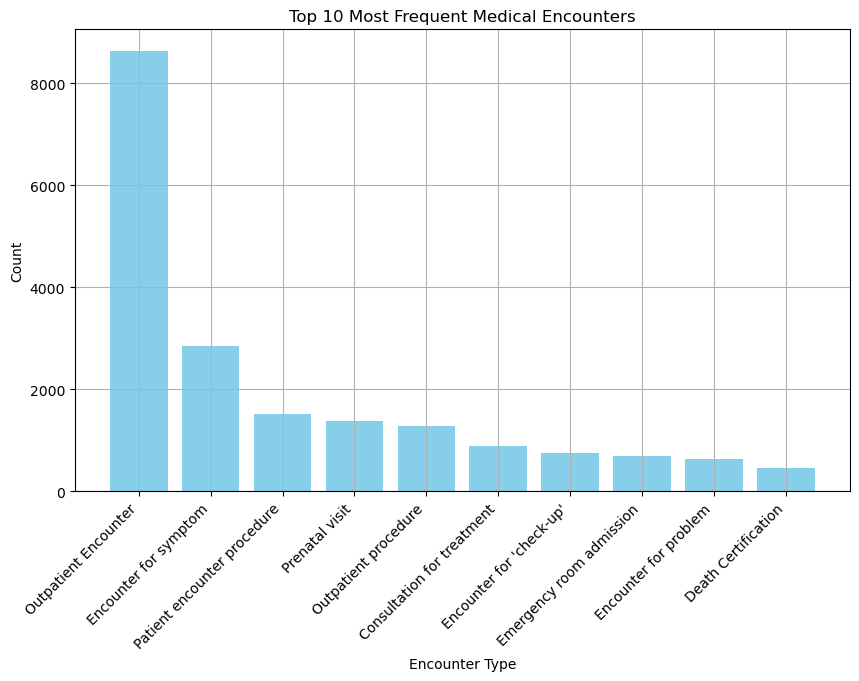

In [38]:
#encounters viz 
encountersCounts = encounters.groupby('DESCRIPTION').size().reset_index(name='count')
encountersCounts = encountersCounts.sort_values(by='count', ascending=False)
top10Encounters = encountersCounts.head(10)
print(top10Encounters)

plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(top10Encounters['DESCRIPTION'], top10Encounters['count'], color='skyblue')
plt.xlabel('Encounter Type')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Medical Encounters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
#what the 'average' patient looks like in terms of race and gender,, viz?

#find most frequent race to represent average
patientRaceCount = patients.groupby('race').size().reset_index(name='raceCount')
patientRaceCount = patientRaceCount.sort_values(by='raceCount', ascending=False)
top5FreqRace = patientRaceCount.head(5)
print(top5FreqRace)

#repeat for gender
patientGenderCount = patients.groupby('gender').size().reset_index(name='genderCount')
patientGenderCount = patientGenderCount.sort_values(by='genderCount', ascending=False)
top5FreqGender = patientGenderCount.head(5)
print(top5FreqGender)

#repeat for ethnicity ? i dont find this super meaningful
# patientEthnicityCount = patients.groupby('ethnicity').size().reset_index(name='ethnicityCount')
# patientEthnicityCount = patientEthnicityCount.sort_values(by='ethnicityCount', ascending=False)
# top5FreqEthnicity = patientEthnicityCount.head(5)
# print(top5FreqEthnicity)

       race  raceCount
3     white       1085
2  hispanic        155
1     black        129
0     asian         93
  gender  genderCount
1      M          741
0      F          721


In [40]:
#visualization for what the 'average' patient looks like in terms of body stat characteristics
#want to create a radar chart but having a hard time eek
observationsRadar = observations.drop(columns = ['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'UNITS'])
observationsRadar = observationsRadar.dropna()
observationsRadar['VALUE'] = pd.to_numeric(observationsRadar['VALUE'], errors='coerce')
averageVals = observationsRadar.groupby('DESCRIPTION')['VALUE'].mean().reset_index()
averageVals = averageVals[averageVals['DESCRIPTION'].isin(['Body Height', 'Body Weight', 'Body Mass Index', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Quality adjusted life years'])]
#averageVals = averageVals.transpose()
averageVals


DESCRIPTION       VALUE
3                   Body Height  145.246010
4               Body Mass Index   27.837863
5                   Body Weight   65.032186
16     Diastolic Blood Pressure   84.485896
40  Quality adjusted life years   41.901321
45      Systolic Blood Pressure  129.587277

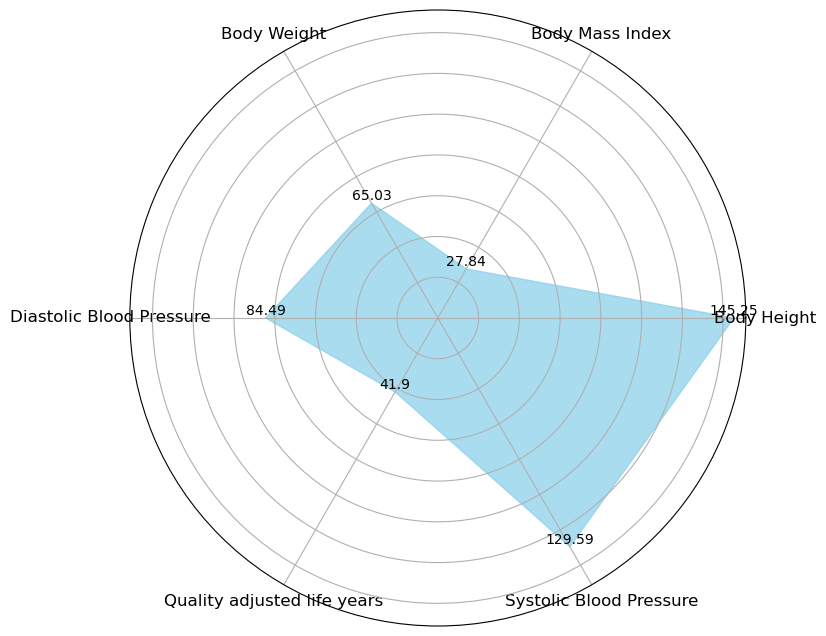

In [41]:
#CREATION OF RADAR CHART OBTAINED FROM ONLINE CODE 
descriptions = averageVals['DESCRIPTION'].tolist()
values = averageVals['VALUE'].tolist()

#to close the circle
values.append(values[0])

num_vars = len(descriptions)

#compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

#need to "complete the loop" and append the start value to the end since plot is a cirlce
values += values[:1]
angles += angles[:1]
values.pop()

#plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.7)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(descriptions, fontsize=12)

ax.set_yticklabels([])

#add values to each point
for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

## Pulmonary Diseases EDA

### PULMONARY DISEASES BY RACE

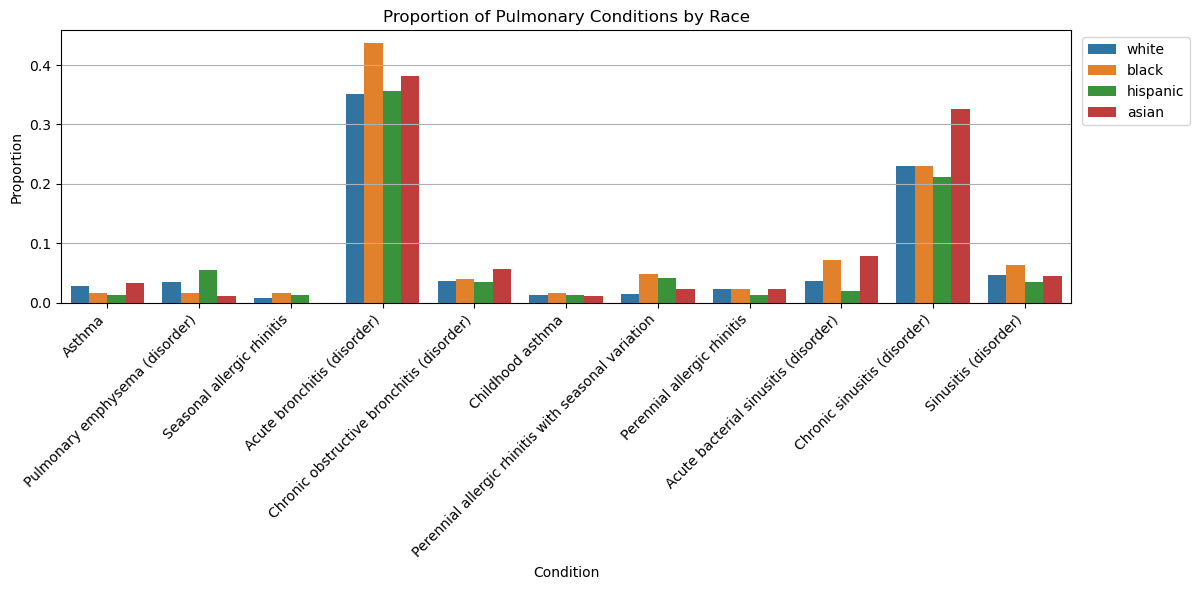

In [42]:
import seaborn as sns

# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in lungs.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(lungs, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Pulmonary Conditions by Race')
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.tight_layout()
plt.show()

### PULMONARY DISEASES BY ETHNICITY

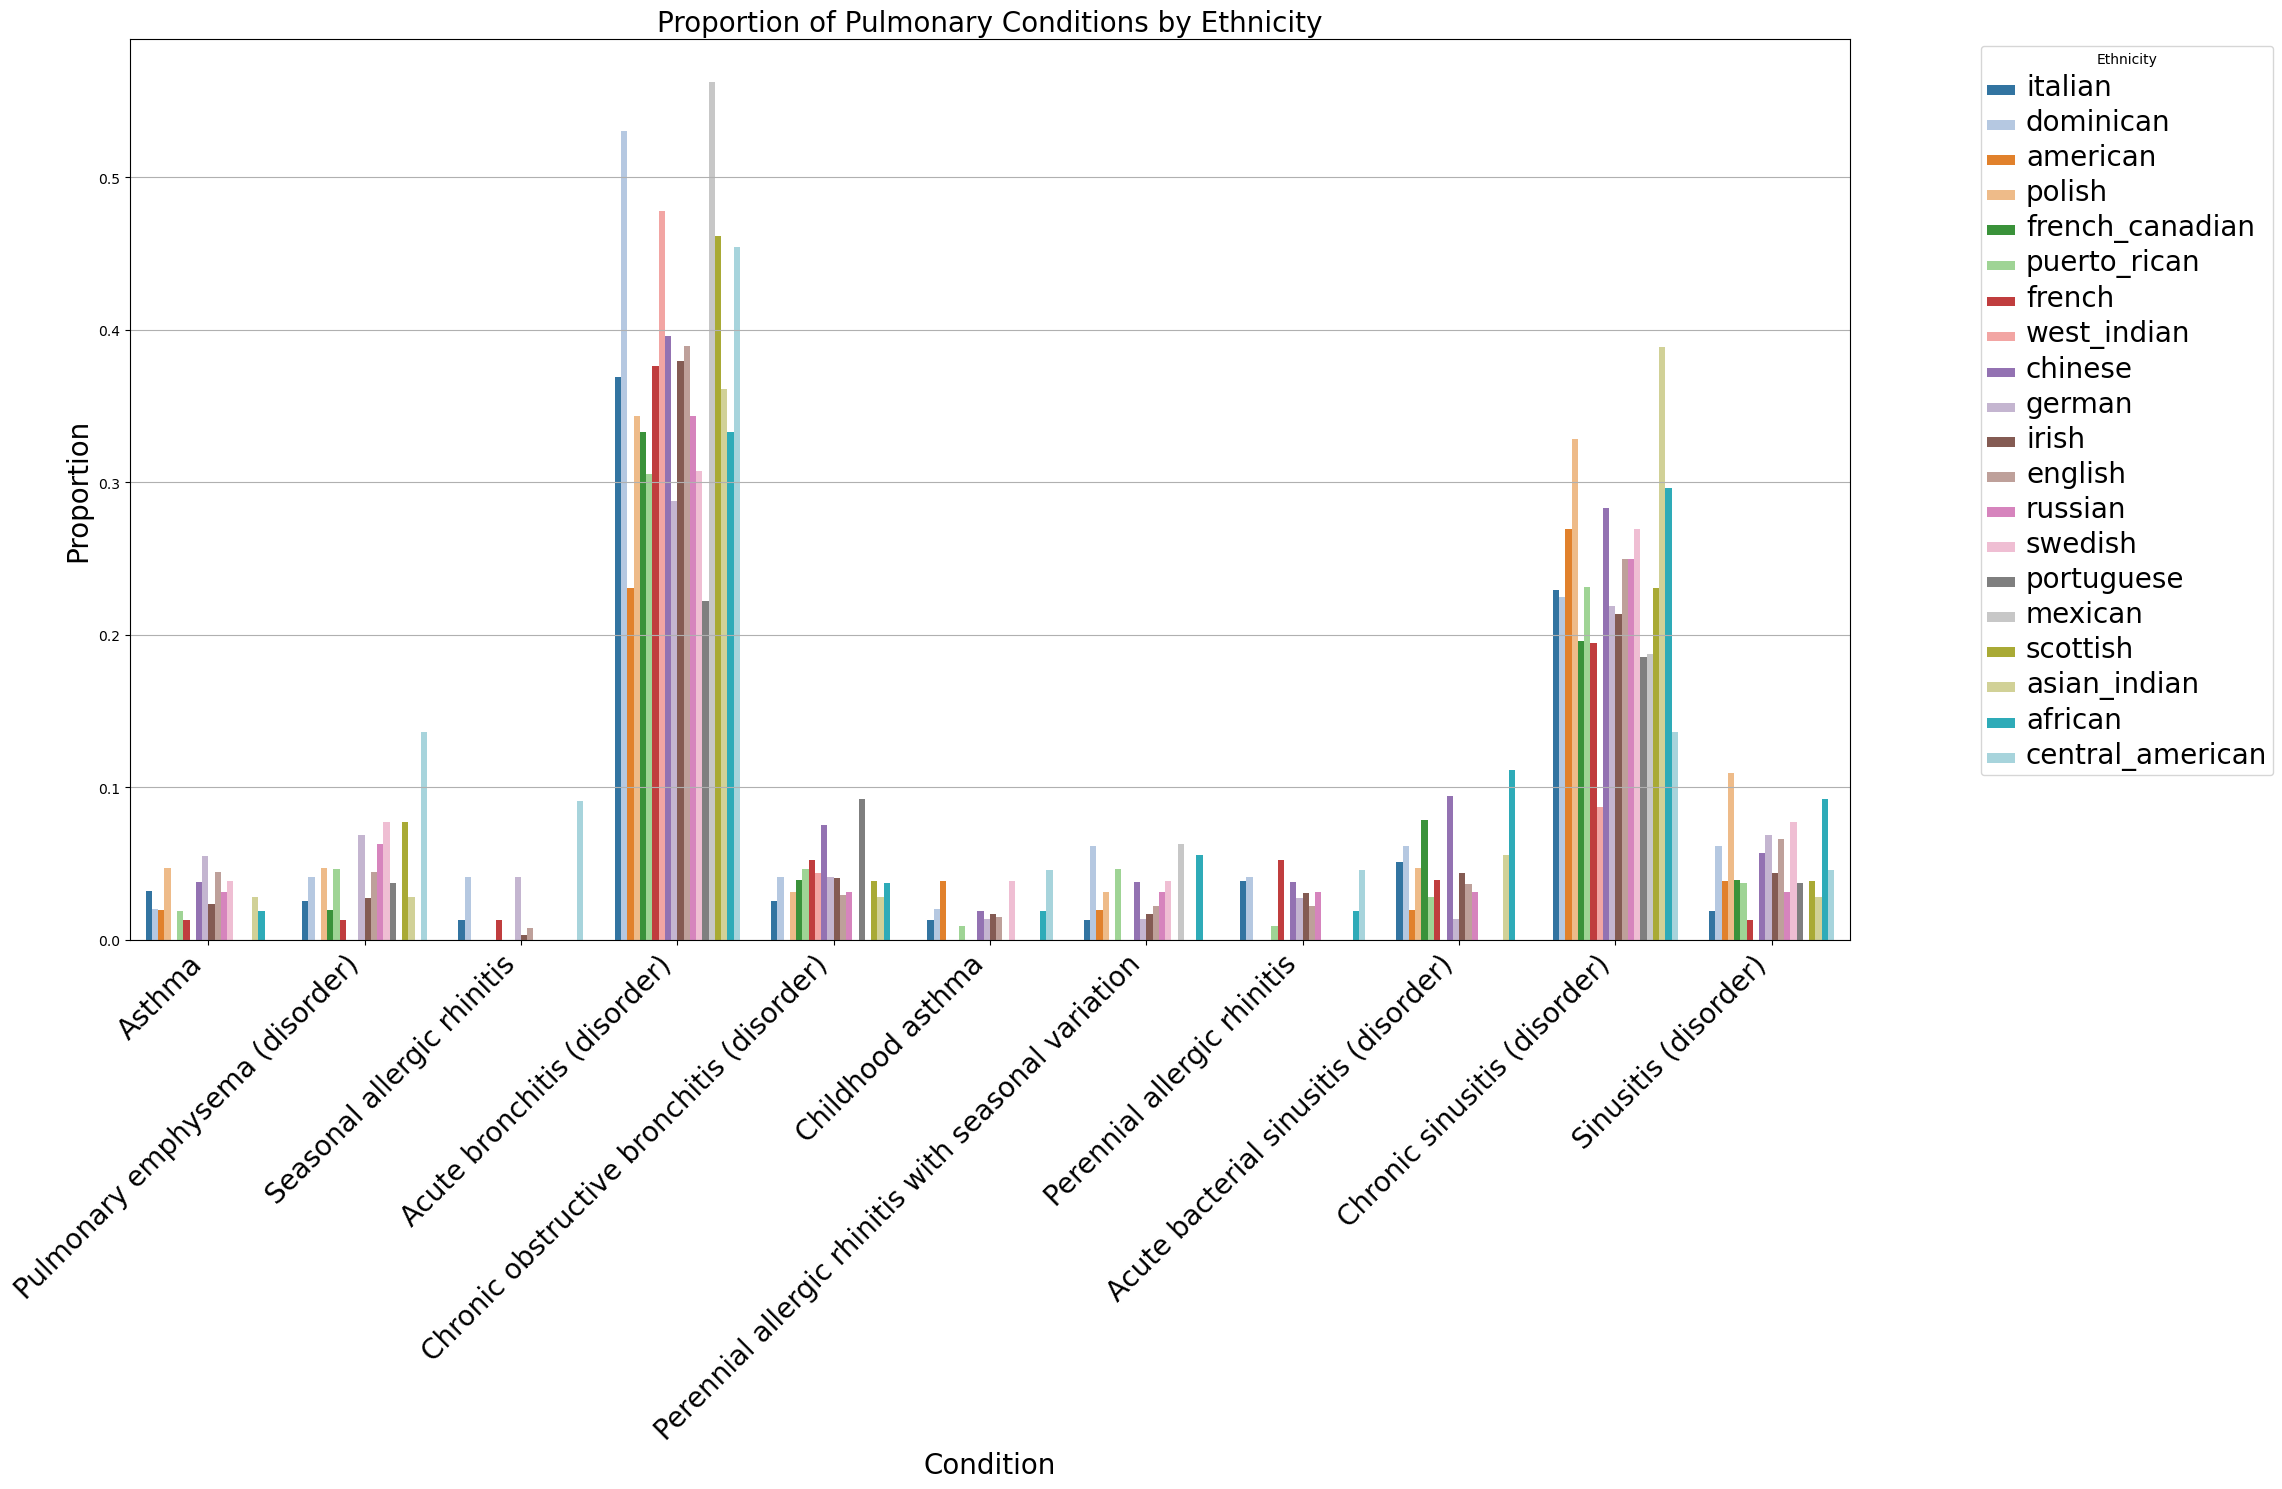

In [43]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in lungs.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(lungs, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Pulmonary Conditions by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### PULMONARY DISEASES BY BIRTHPLACE

Creating a dataframe of populations of all the towns present in our data (all in Massachusetts), in order to calculate adjusted prevalance.

In [44]:
populations = pd.DataFrame()
unique_birthplaces = lungs['birthplace'].unique()
populations['birthplace'] = unique_birthplaces
populations['pop'] = [37819, 101727, 35313, 93682, 3785, 53896, 87954,
                       62698, 60803, 5025, 18317, 23662, 1734, 79762, 205319, 1641,
                       25334, 650706, 6362, 31531, 59922, 6802, 58528, 87381, 19872,
                       17612, 54980, 25121, 24747, 17489, 35022, 64065, 22992, 6196, 15946, 27395,
                       44722, 25905, 9806, 11657, 65399, 8485, 15988, 113608, 28854, 4301, 104826, 
                       118488, 29155, 13885, 12265, 23315, 1677, 28501, 67153, 49350, 29327, 10293,
                       29349, 8270, 154064, 19808, 43310, 29862, 22325, 16593, 6388, 6379, 17619, 14939, 
                       16720, 40971, 31747, 43646, 25050, 38637, 1802, 15702, 15101, 29195, 18448, 16732,
                       16516, 11048, 7754, 11066, 19948, 4688, 100891, 33792, 18181, 11115, 37286, 100682,
                       36229, 14570, 46601, 10911, 11625, 17669, 13697, 20902, 10667, 19163, 22666, 10580,
                       32158, 11777, 1861, 2215, 6347, 64712, 23629, 34307, 752, 9547, 16705, 13866, 18510,
                       43784, 35744, 21478, 70963, 42844, 40535, 16296, 16127, 7973, 31296, 26123, 3265, 13320,
                       53241, 3234, 7839, 14749, 8055, 24498, 9640, 42235, 1730, 5798, 37973, 8316, 23923, 18662,
                       10084, 6975, 15827, 49532, 11964, 136913, 6279, 7214, 17806, 41248, 6358, 10874, 19063, 6569,
                       23184, 11753, 11386, 2985, 16450, 9182, 7764, 21374, 11802, 41502, 4111, 16053, 6183, 27003,
                       15710, 6125, 8471, 4963, 29836, 1029, 15227, 10000, 12337, 1793, 491, 4678, 11988, 8168, 28950,
                       1566, 12904, 57410, 6850, 13427, 11327, 6532, 917, 17456, 25209, 717, 17182, 15168, 12777, 
                       8153, 14313, 13435, 1264, 7884, 9230, 14180, 3056, 12418, 14382, 31248, 10169, 8541, 16188, 
                       36500, 31388, 17027, 16094, 13911, 28385, 9395, 11261, 1489, 12925, 27999, 5943, 16693, 5346,
                       9811, 27400, 4871, 24296, 12133, 6346, 31635, 11688, 1245, 5284, 5966, 1458, 780, 27135, 316,
                       5429, 17765, 12629, 3390, 6952, 7144, 2180, 7649, 4907, 5139, 4852, 5125, 5135, 2901, 5398, 4519]

In [45]:
condition_columns = [col for col in lungs.columns if col.endswith('_CONDITIONS')]
conditions_summed = lungs.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatalungs = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatalungs[f'prevalence_{condition_column}'] = prevdatalungs[condition_column] / prevdatalungs['pop']

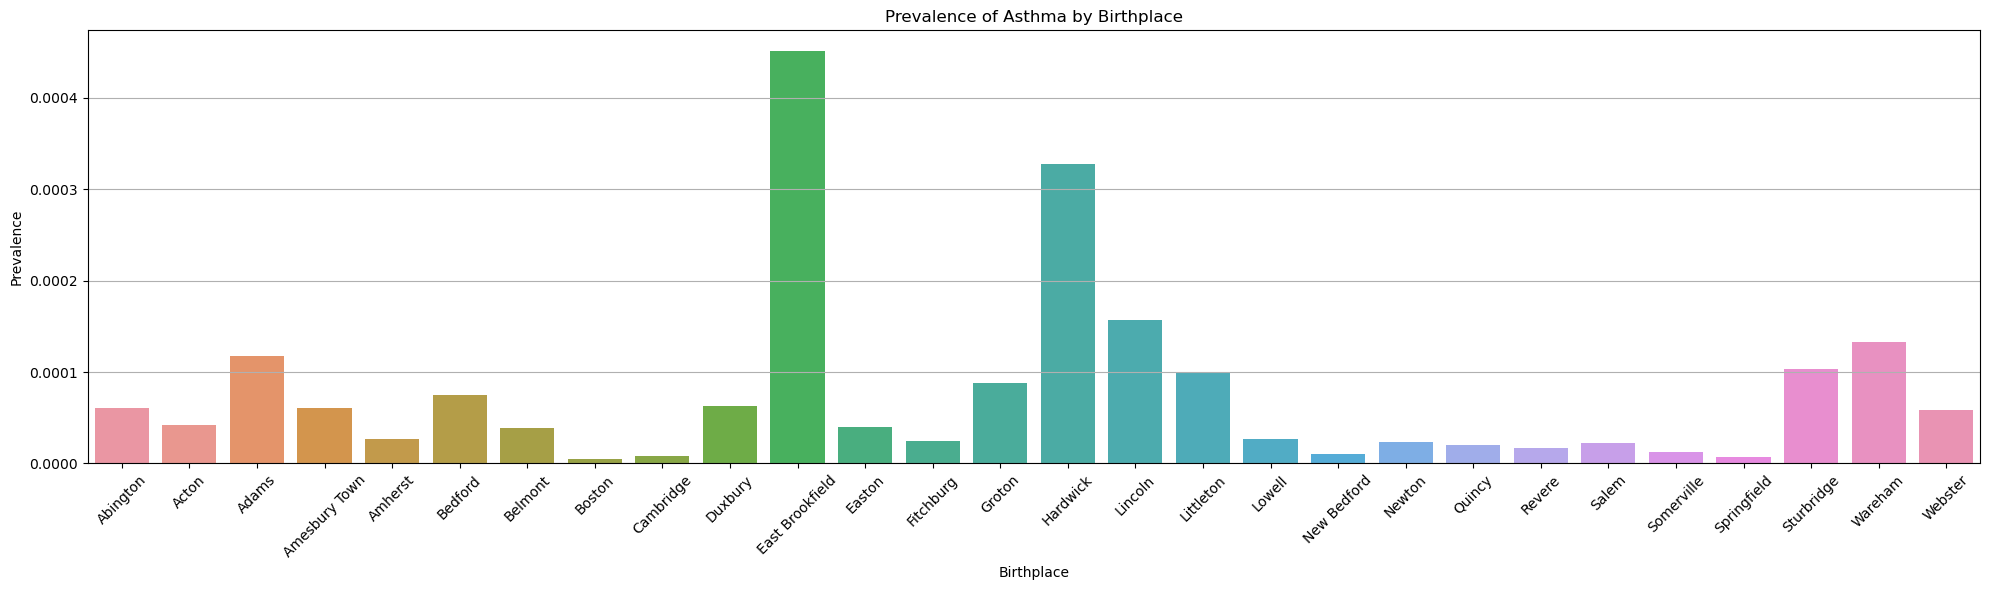

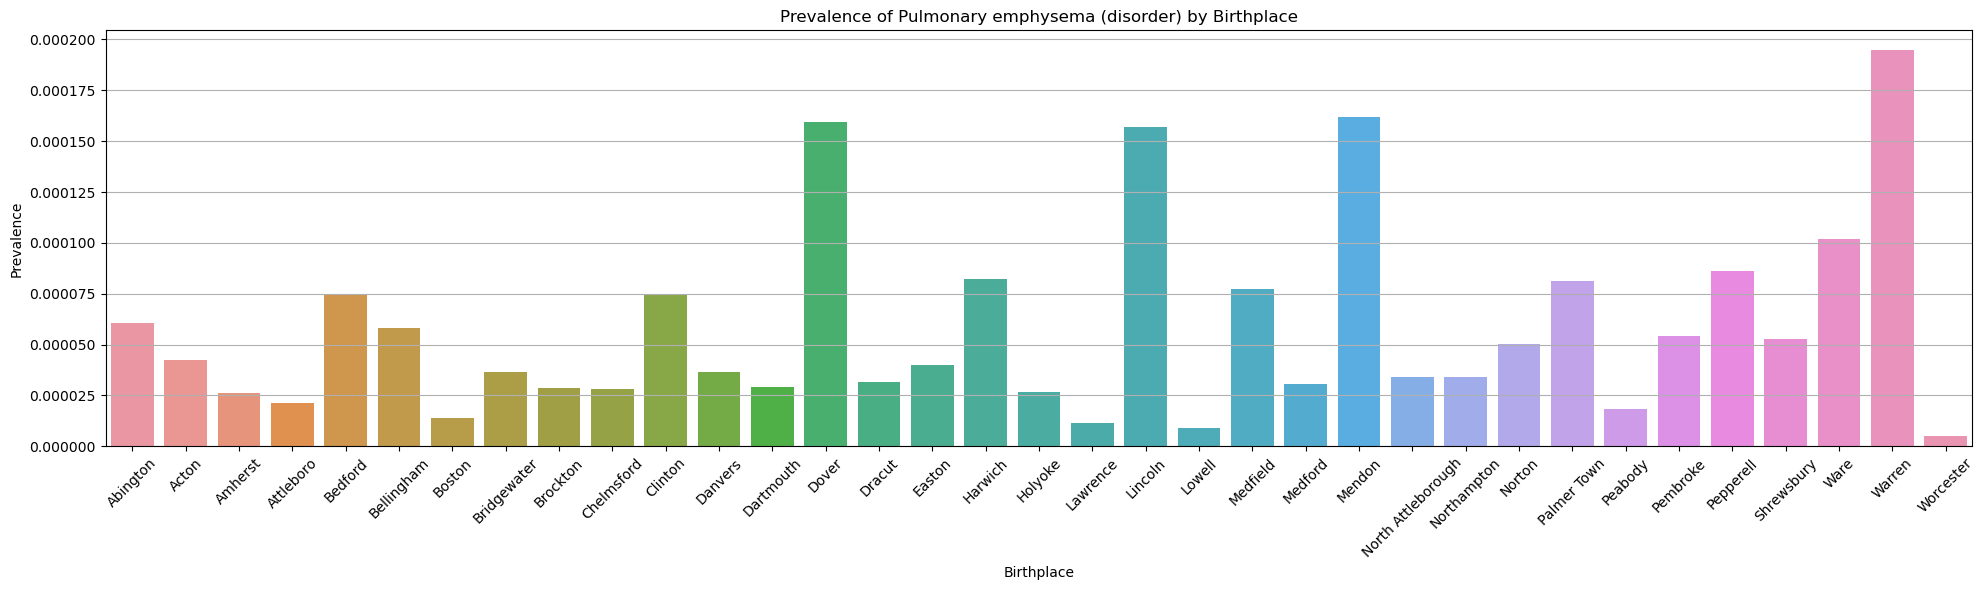

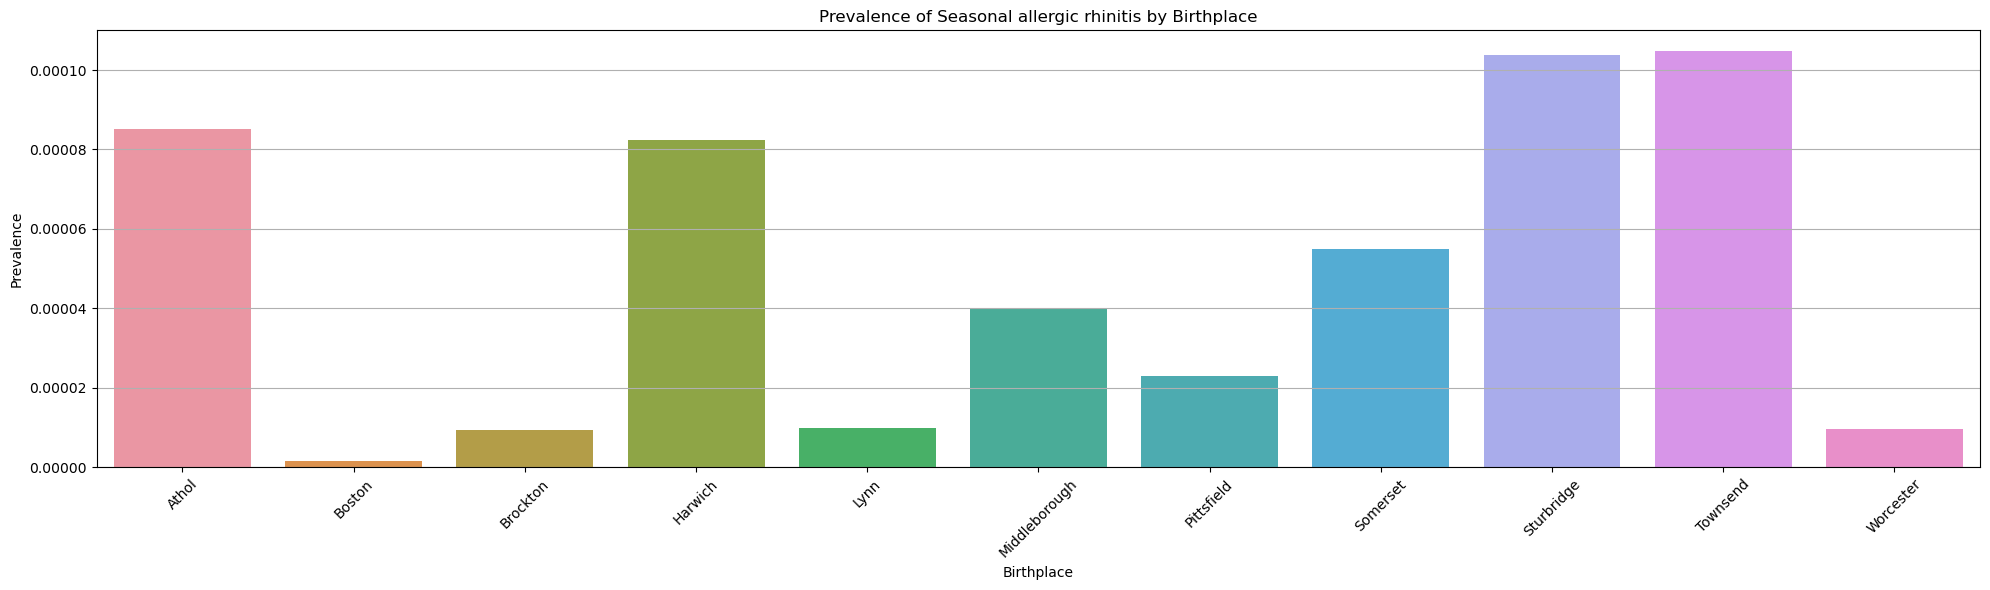

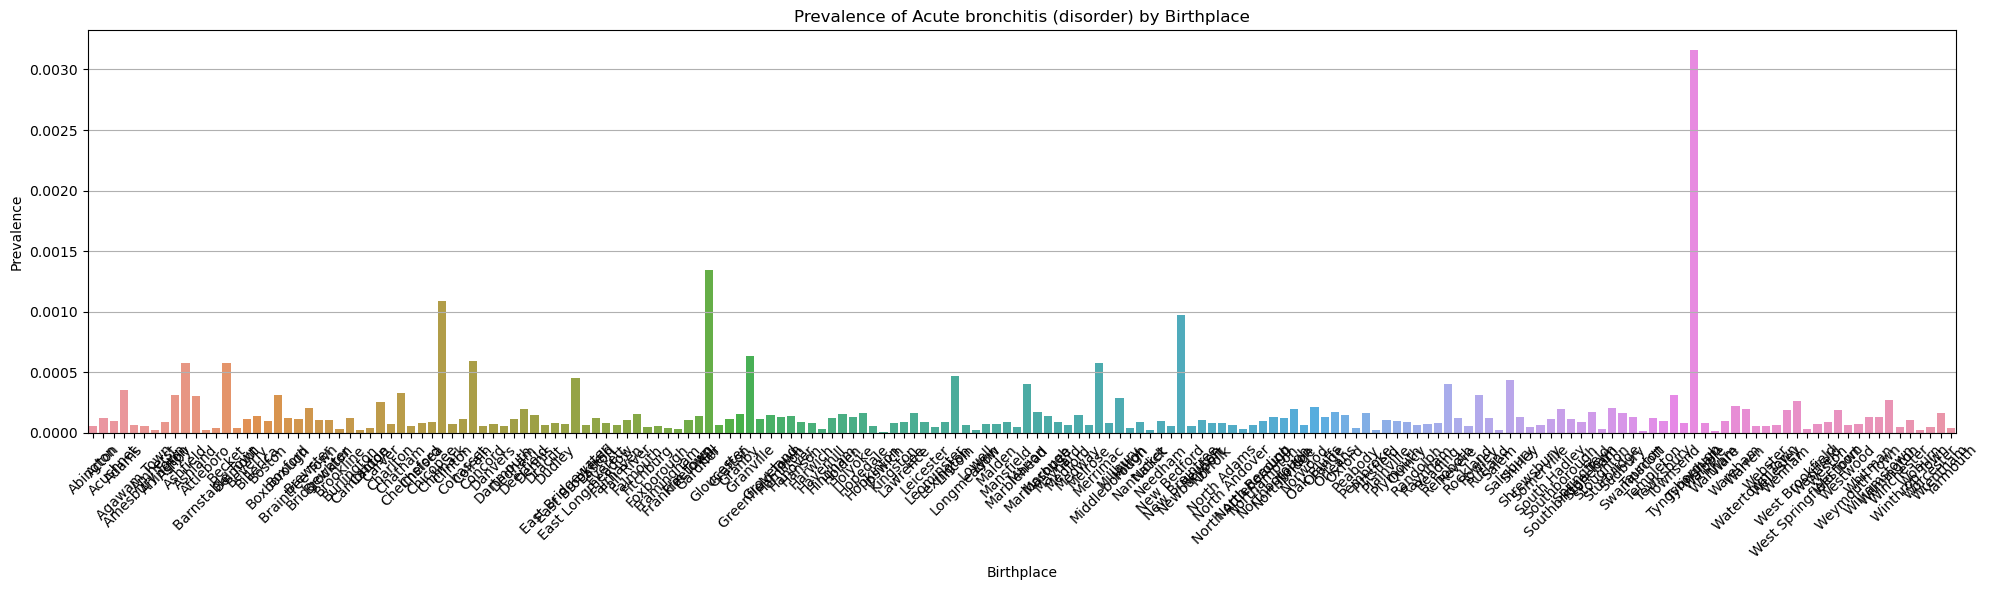

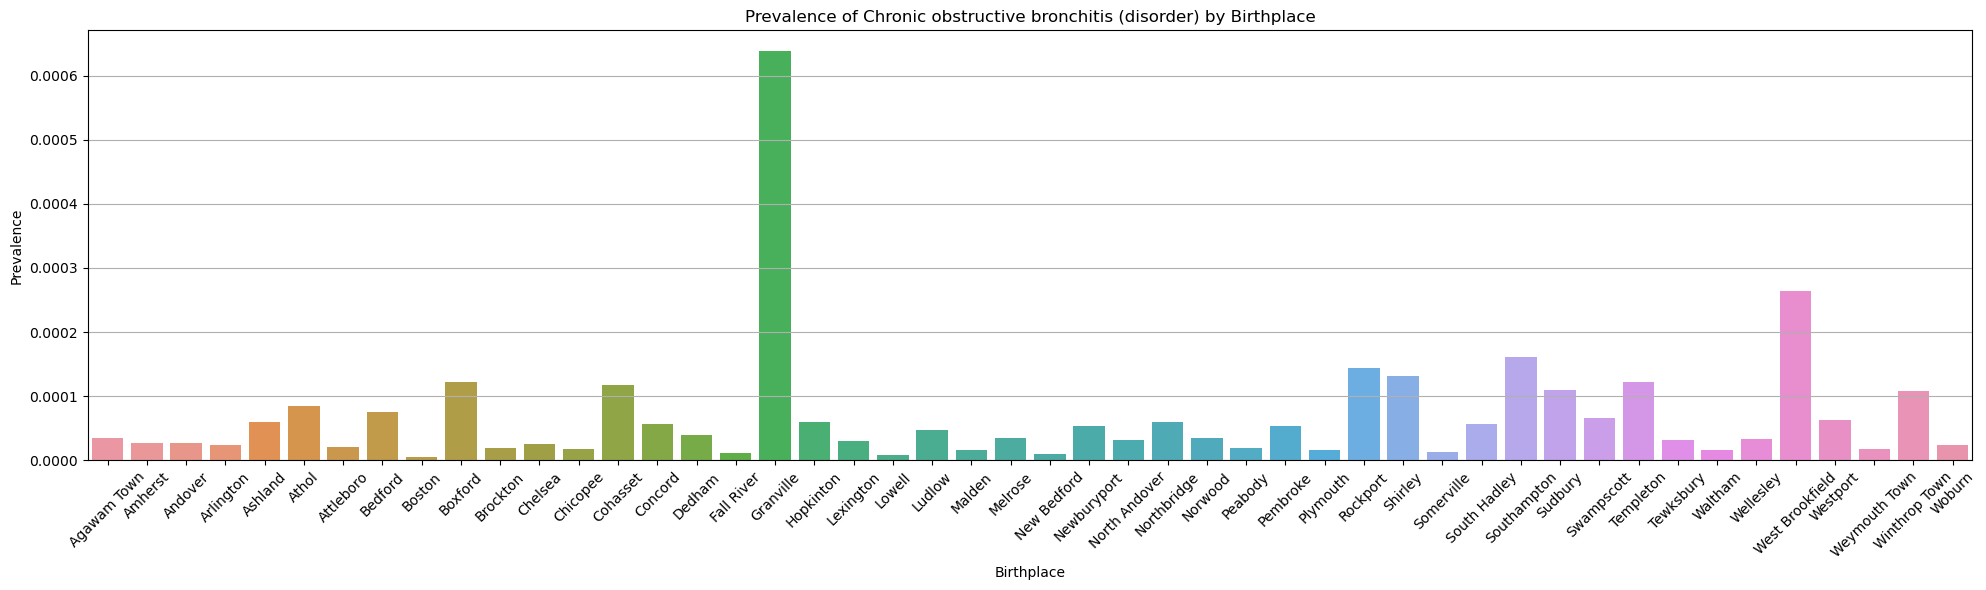

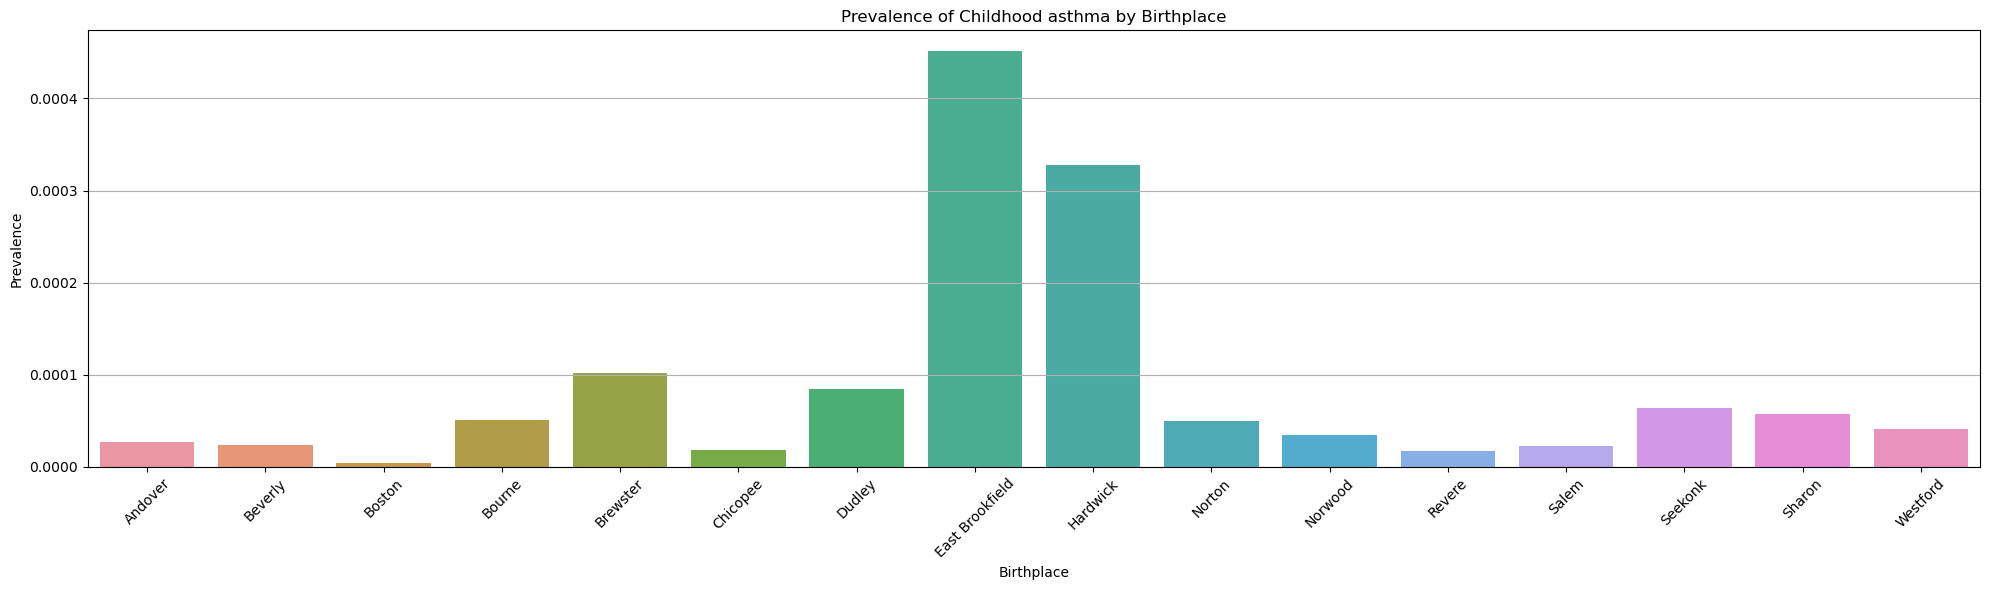

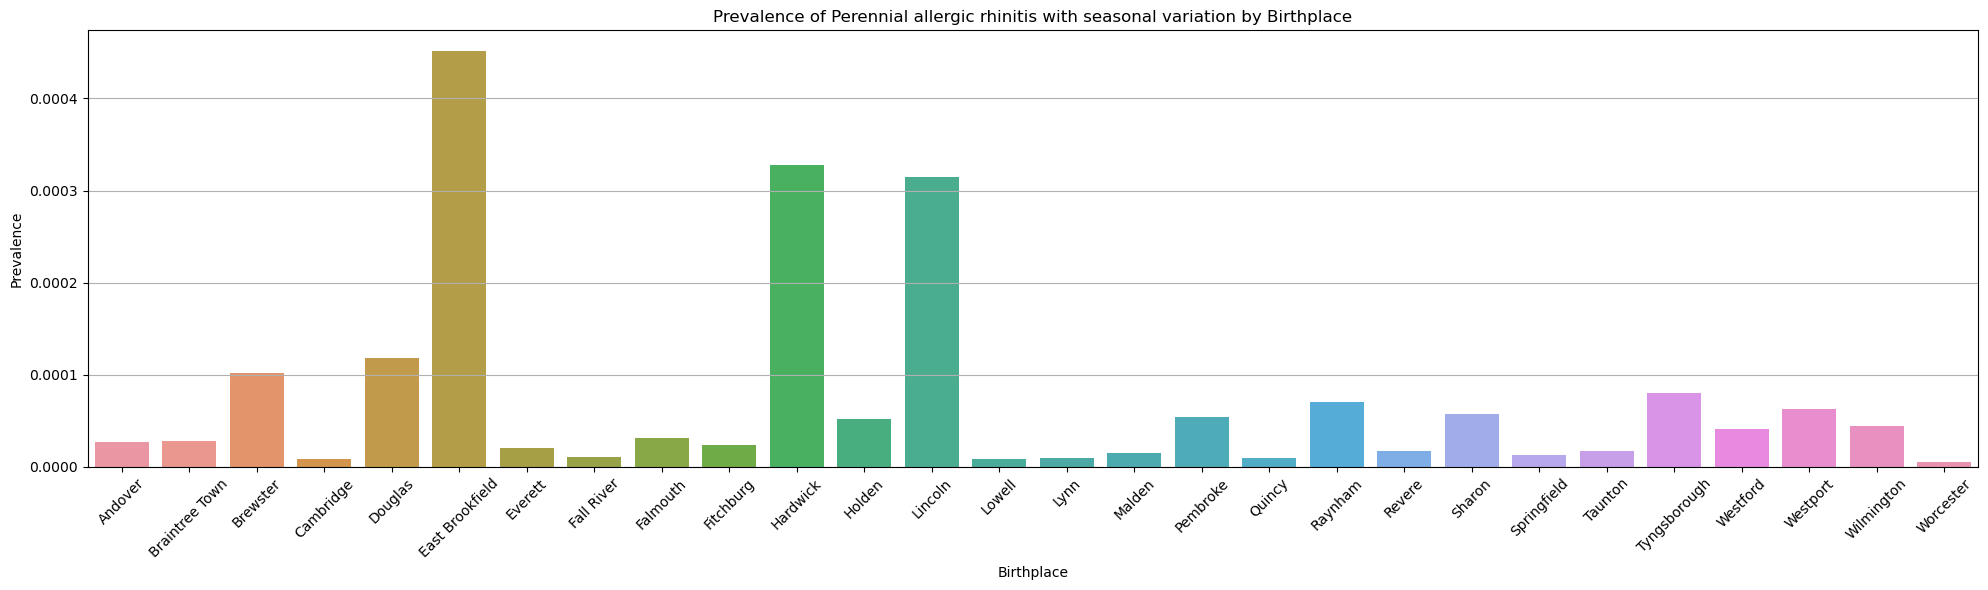

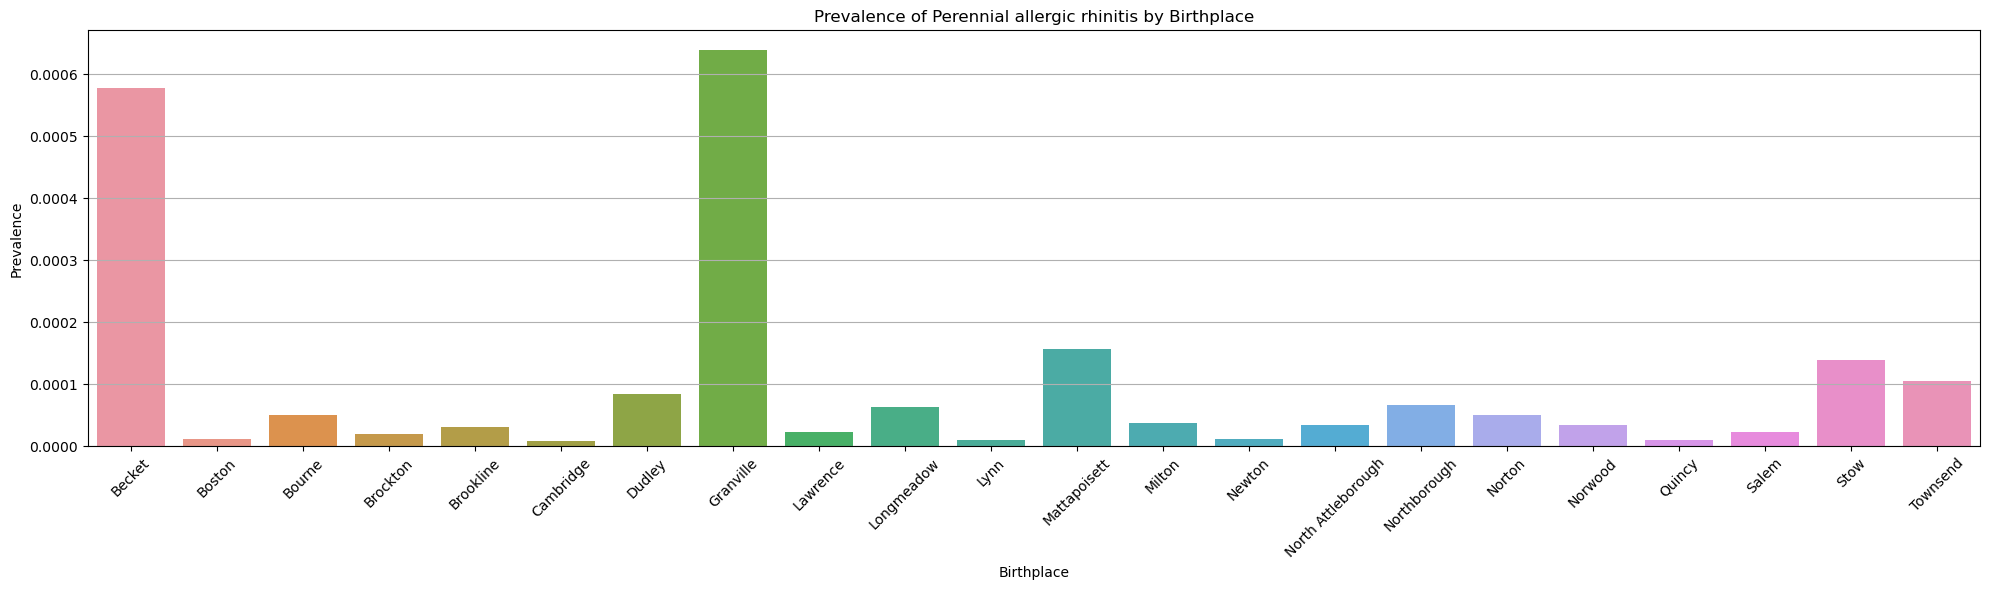

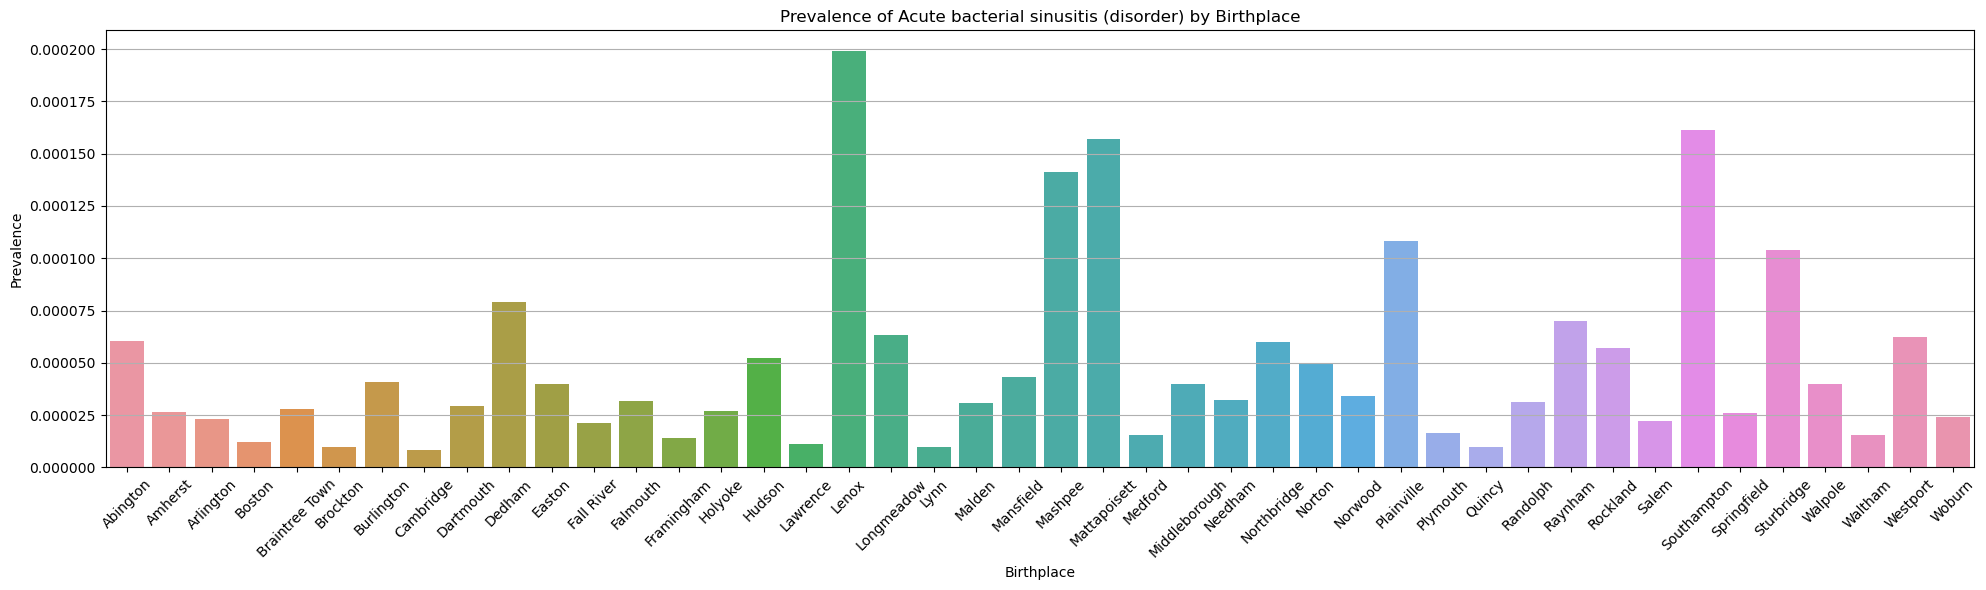

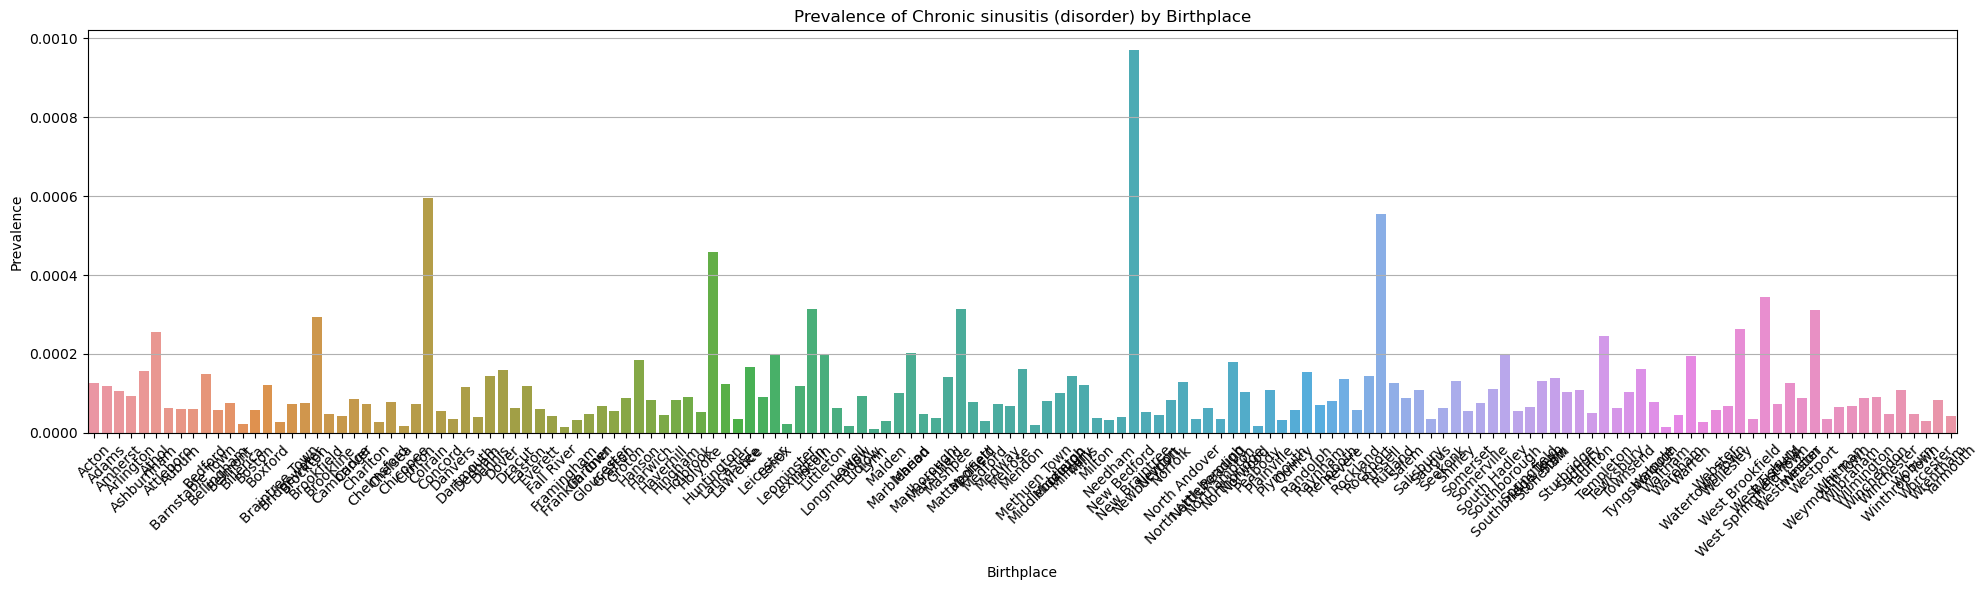

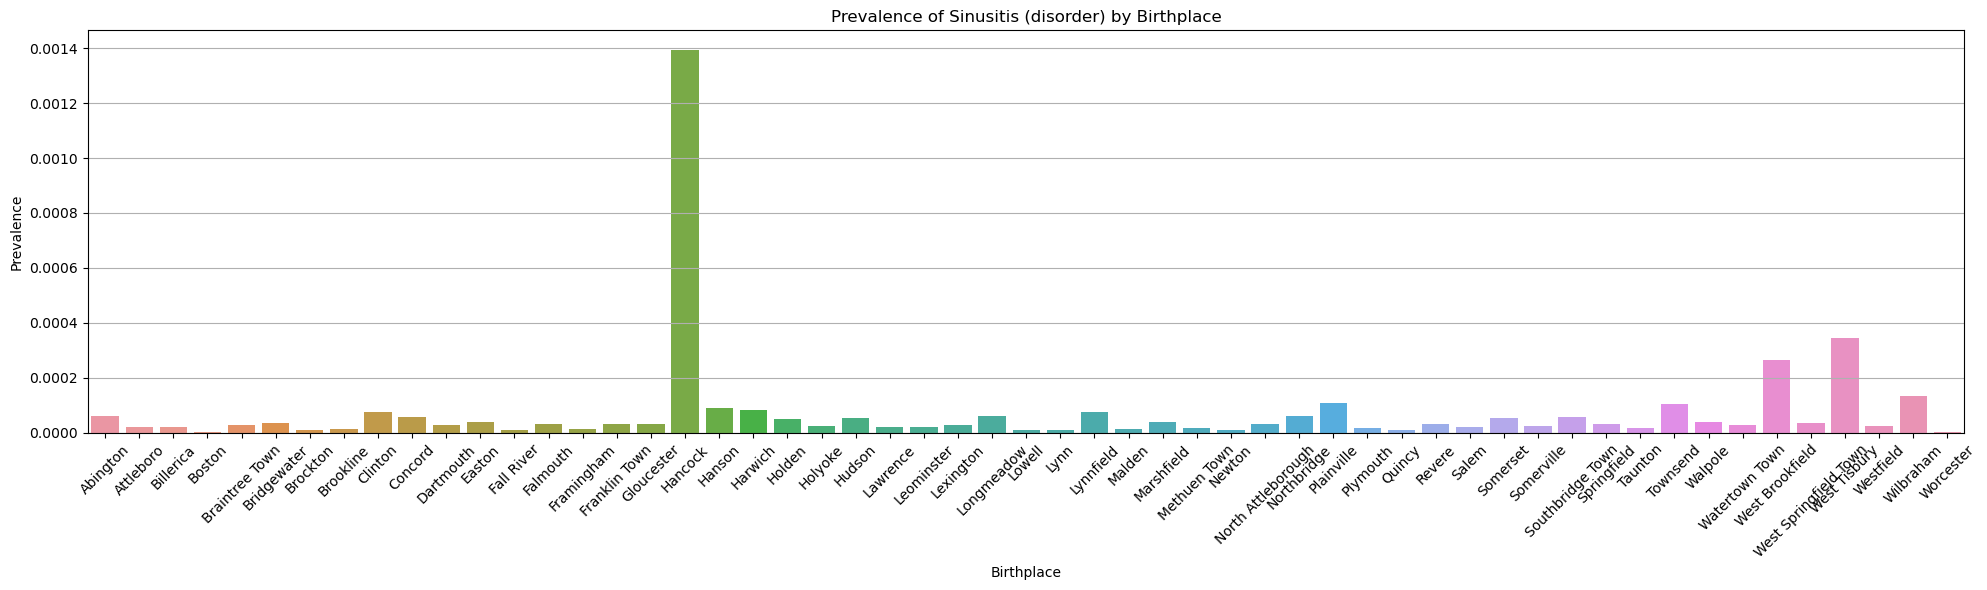

In [46]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatalungs[prevdatalungs[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Cancer EDA

### CANCER BY RACE

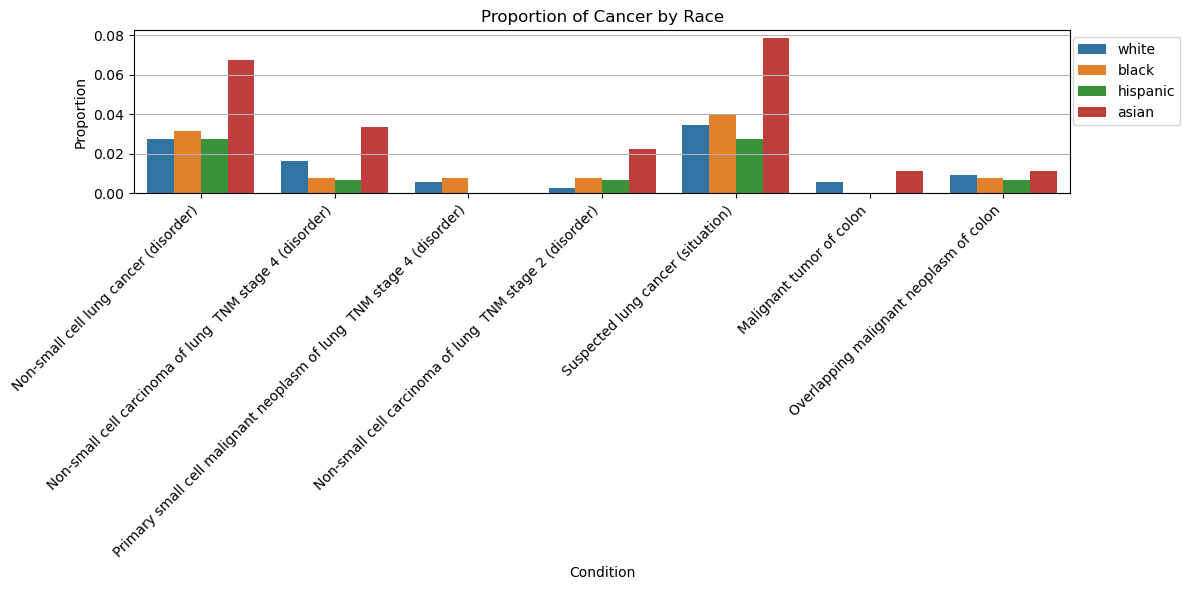

In [47]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in cancer.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(cancer, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Cancer by Race')
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.tight_layout()
plt.show()

### CANCER BY ETHNICITY

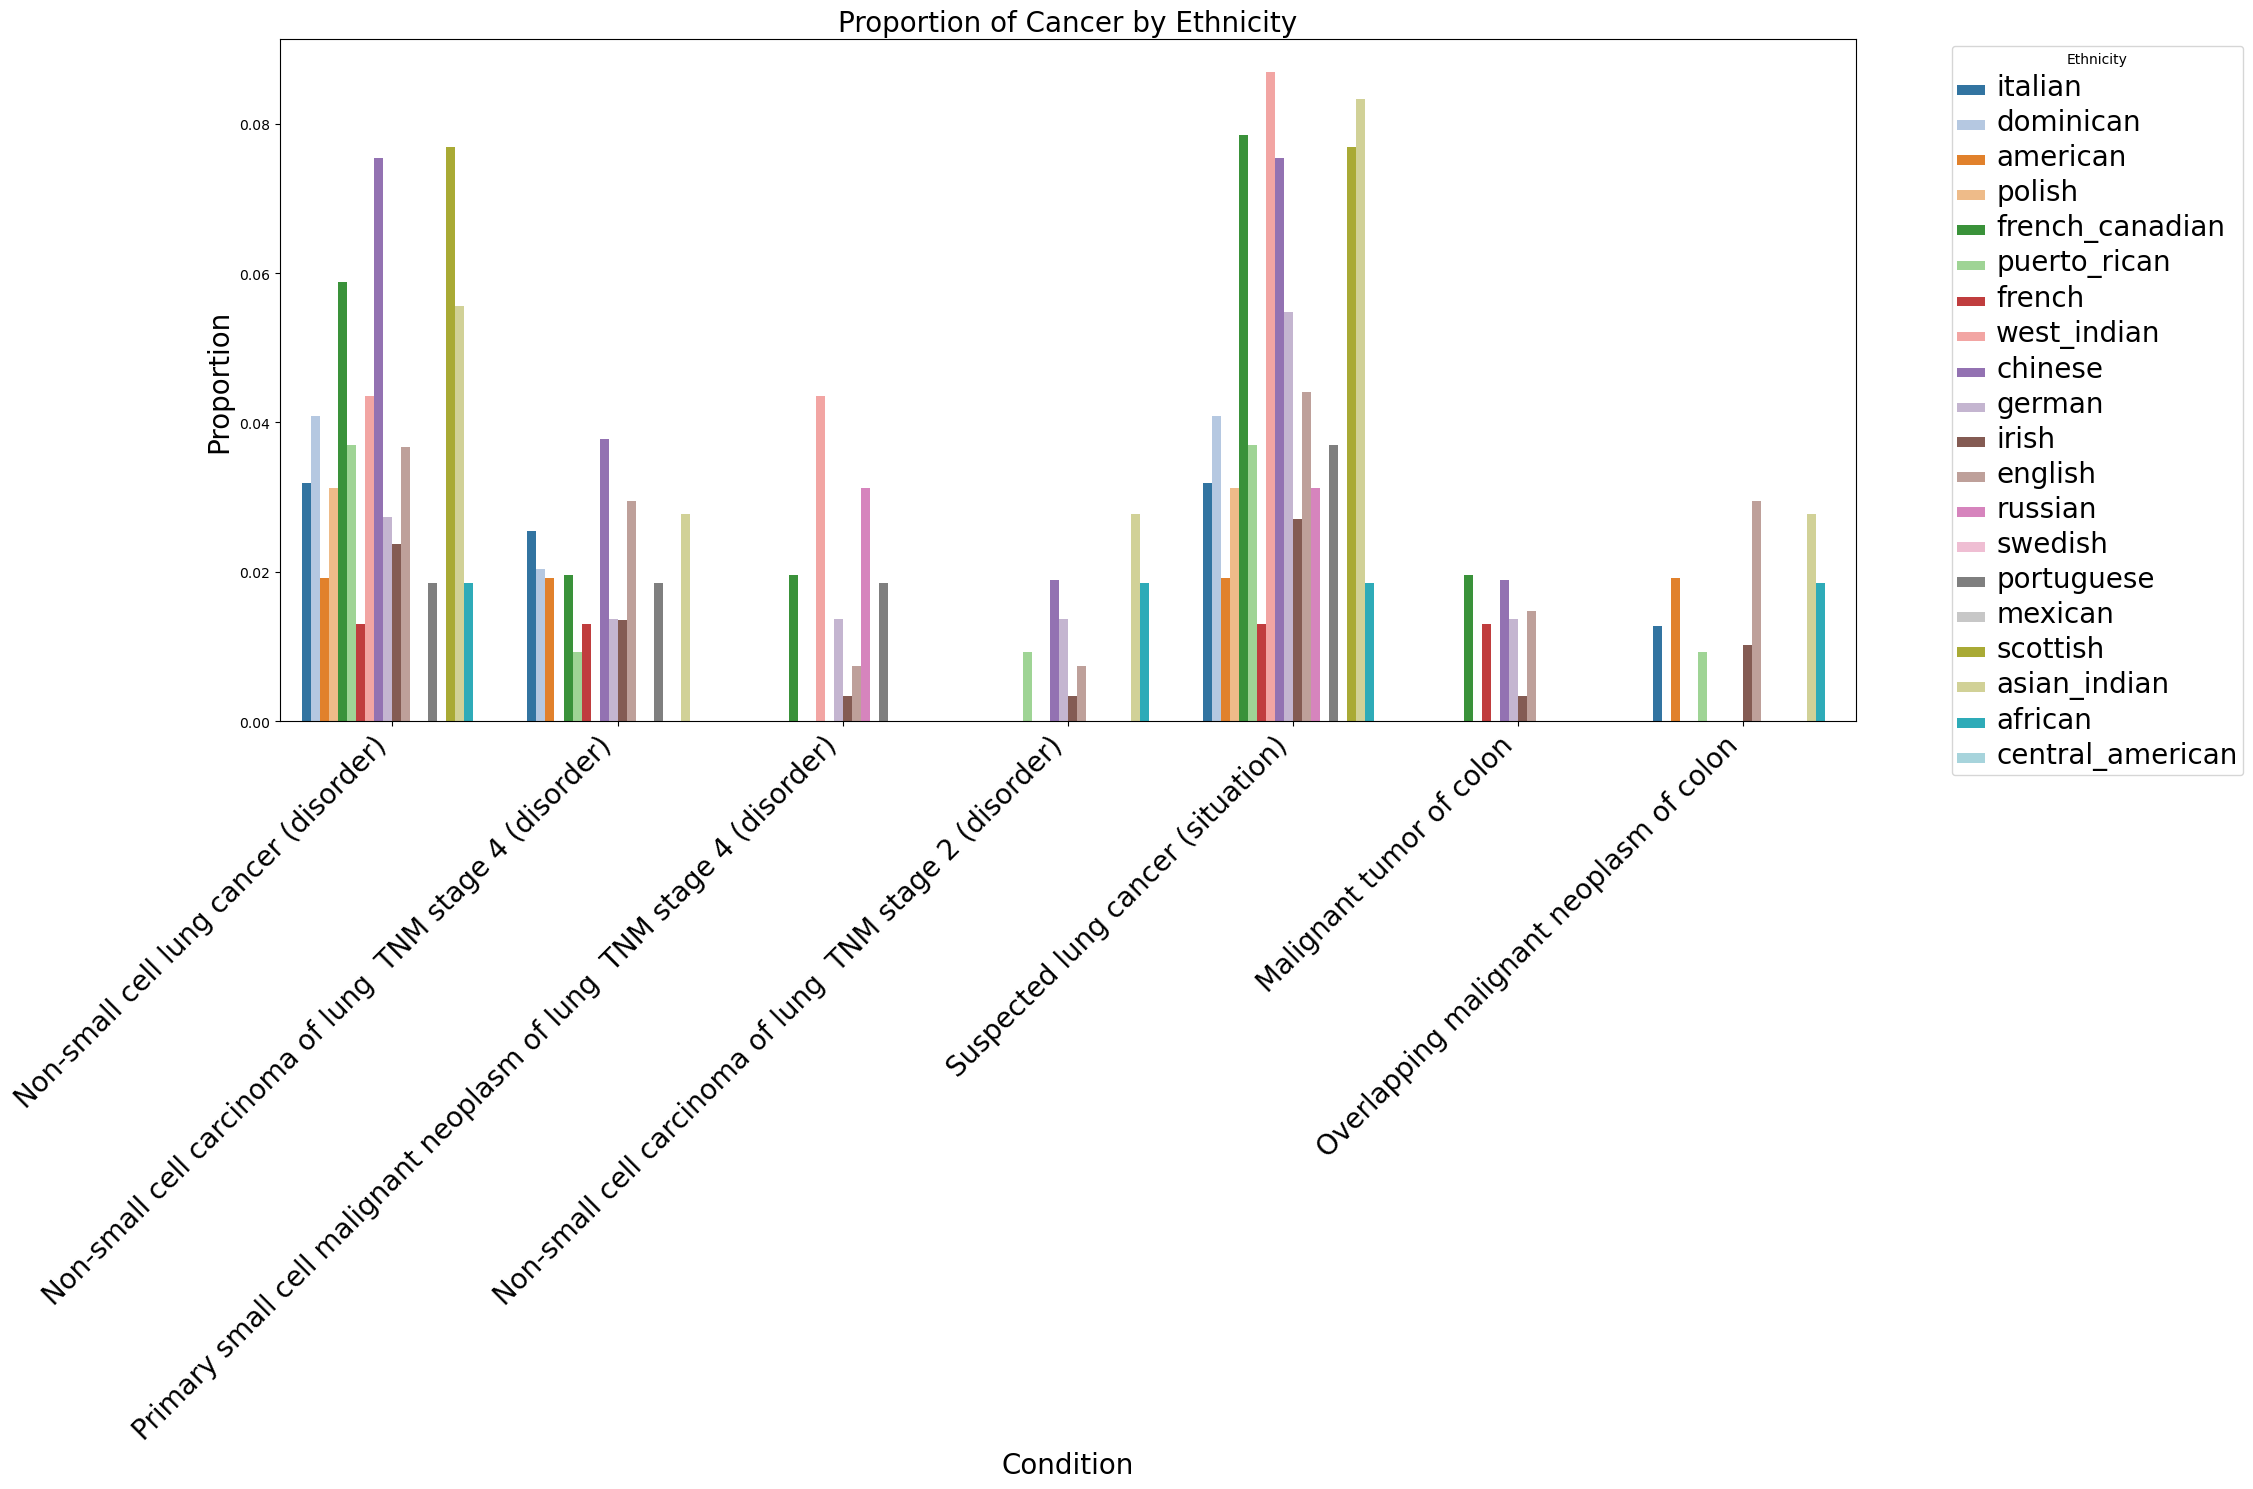

In [48]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in cancer.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(cancer, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Cancer by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### CANCER PREVALANCE BY BIRTHPLACE

In [49]:
condition_columns = [col for col in cancer.columns if col.endswith('_CONDITIONS')]
conditions_summed = cancer.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatacanc = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatacanc[f'prevalence_{condition_column}'] = prevdatacanc[condition_column] / prevdatacanc['pop']

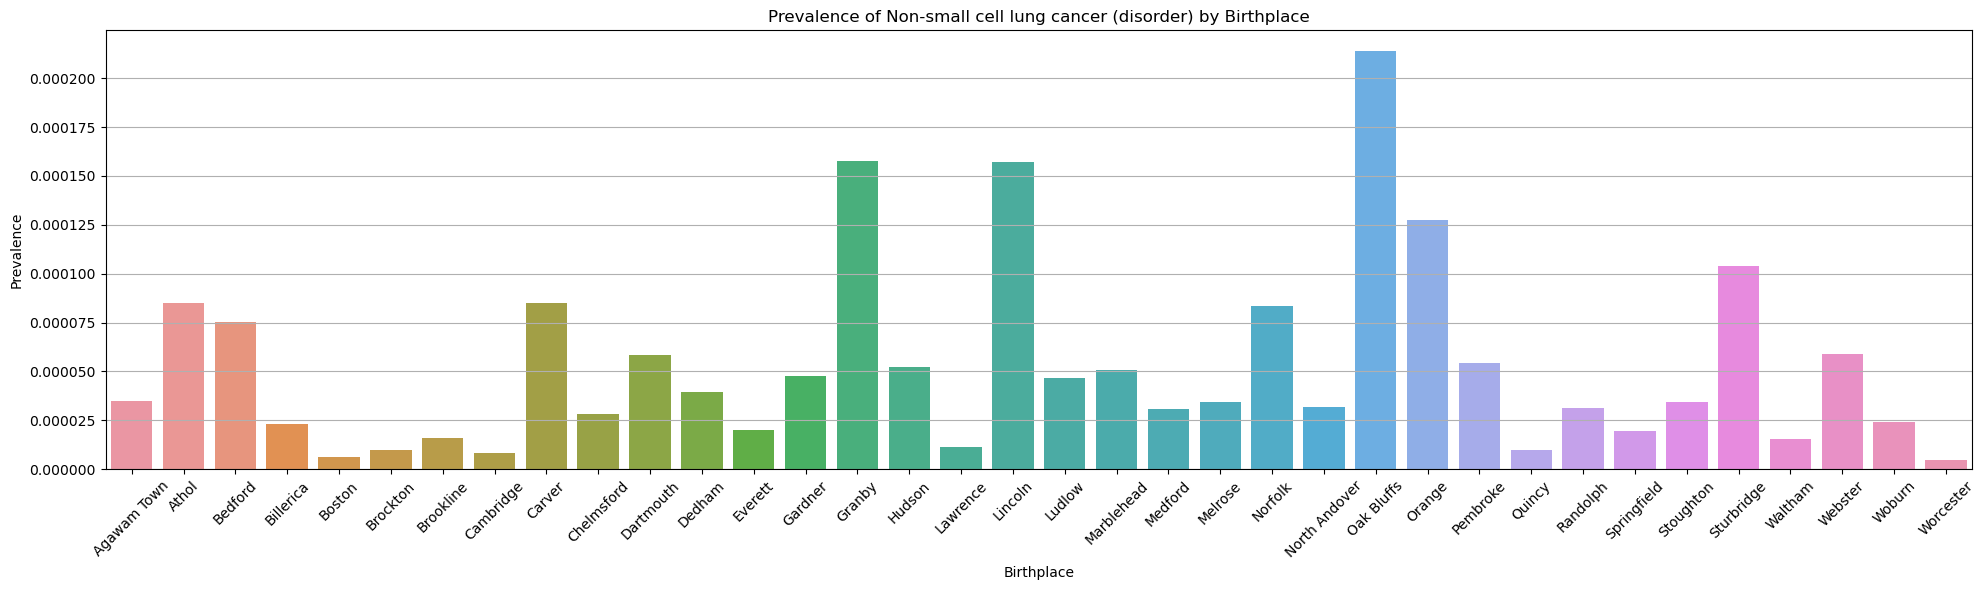

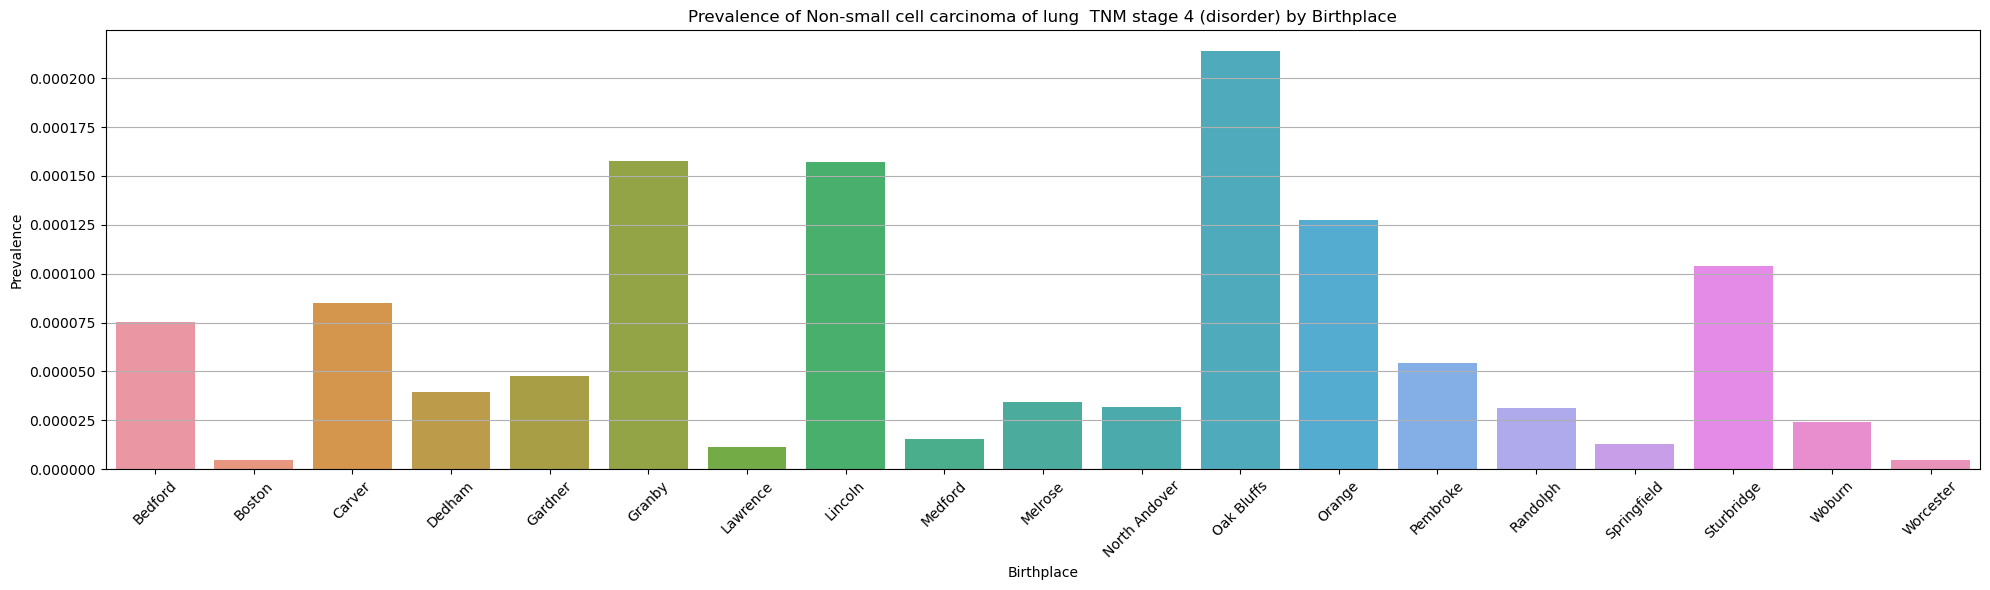

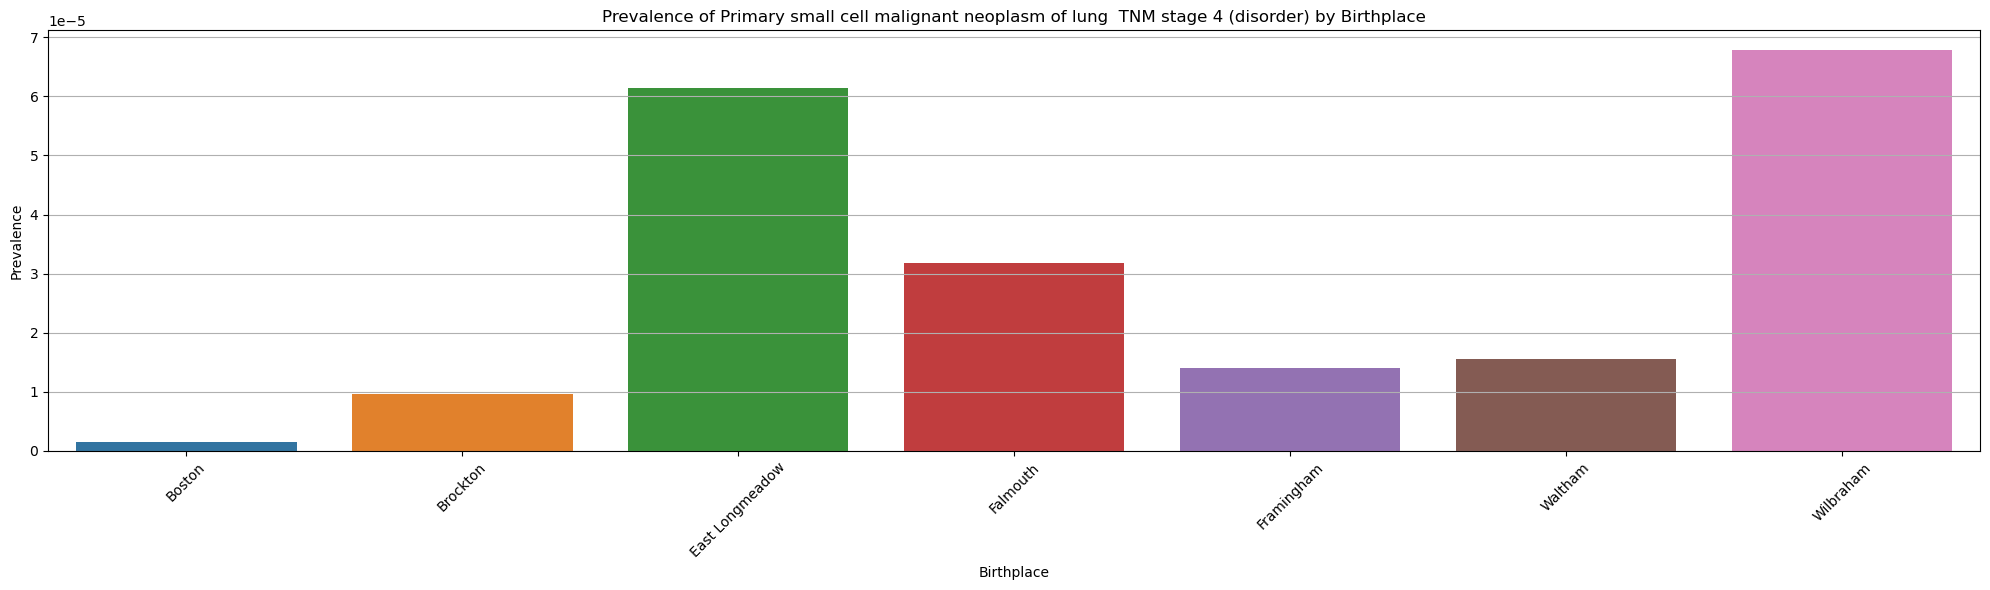

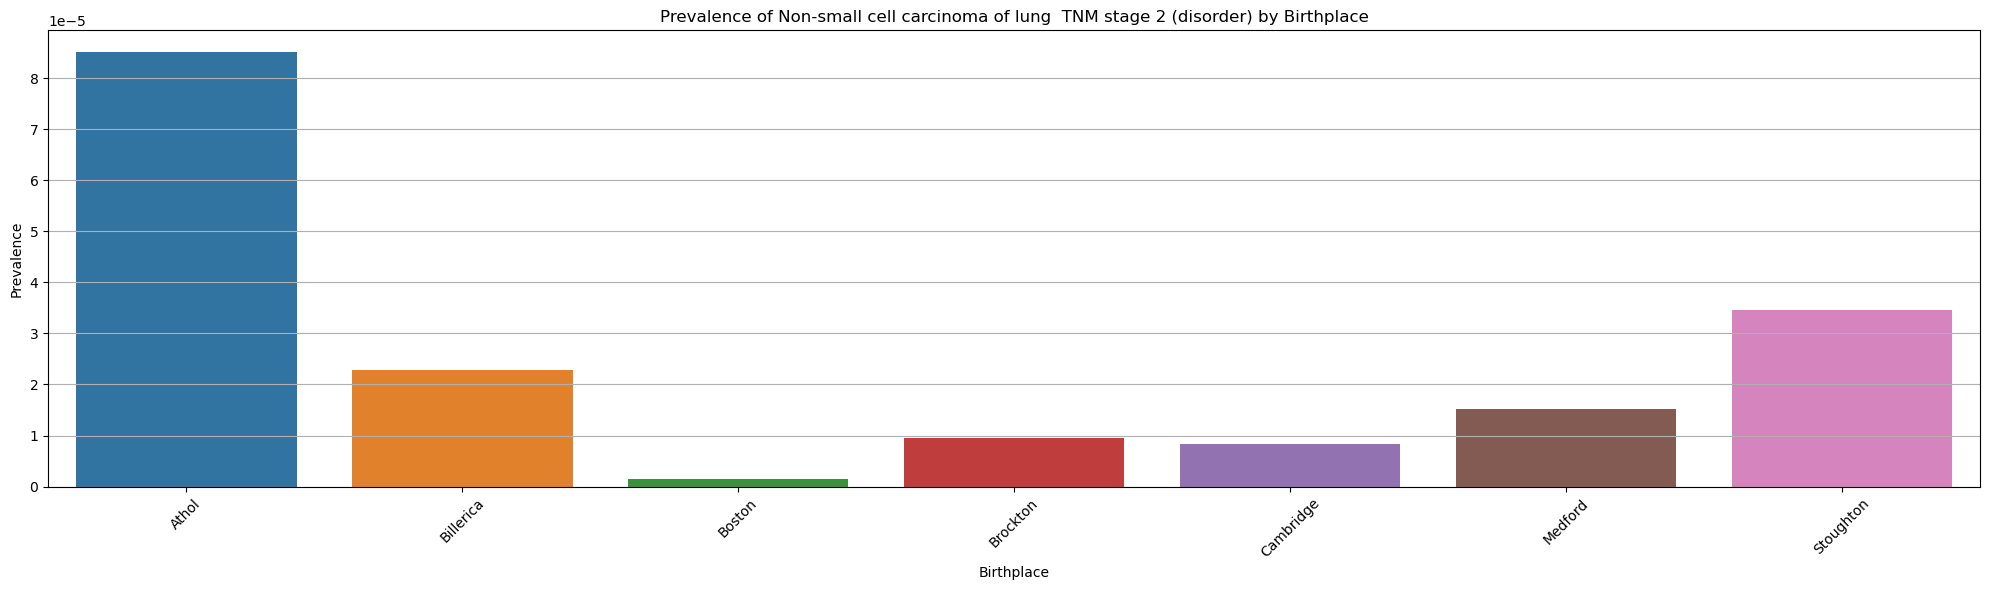

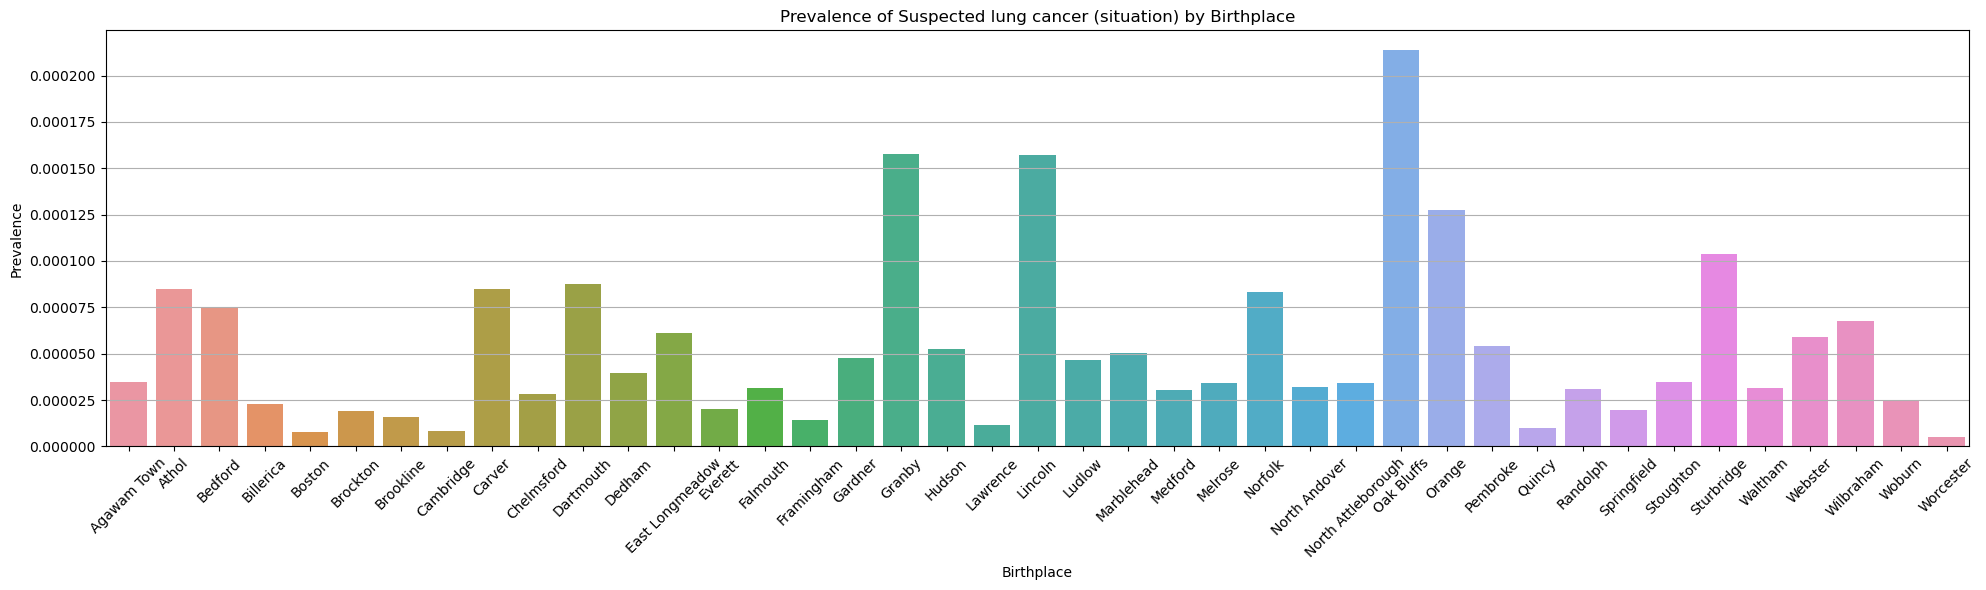

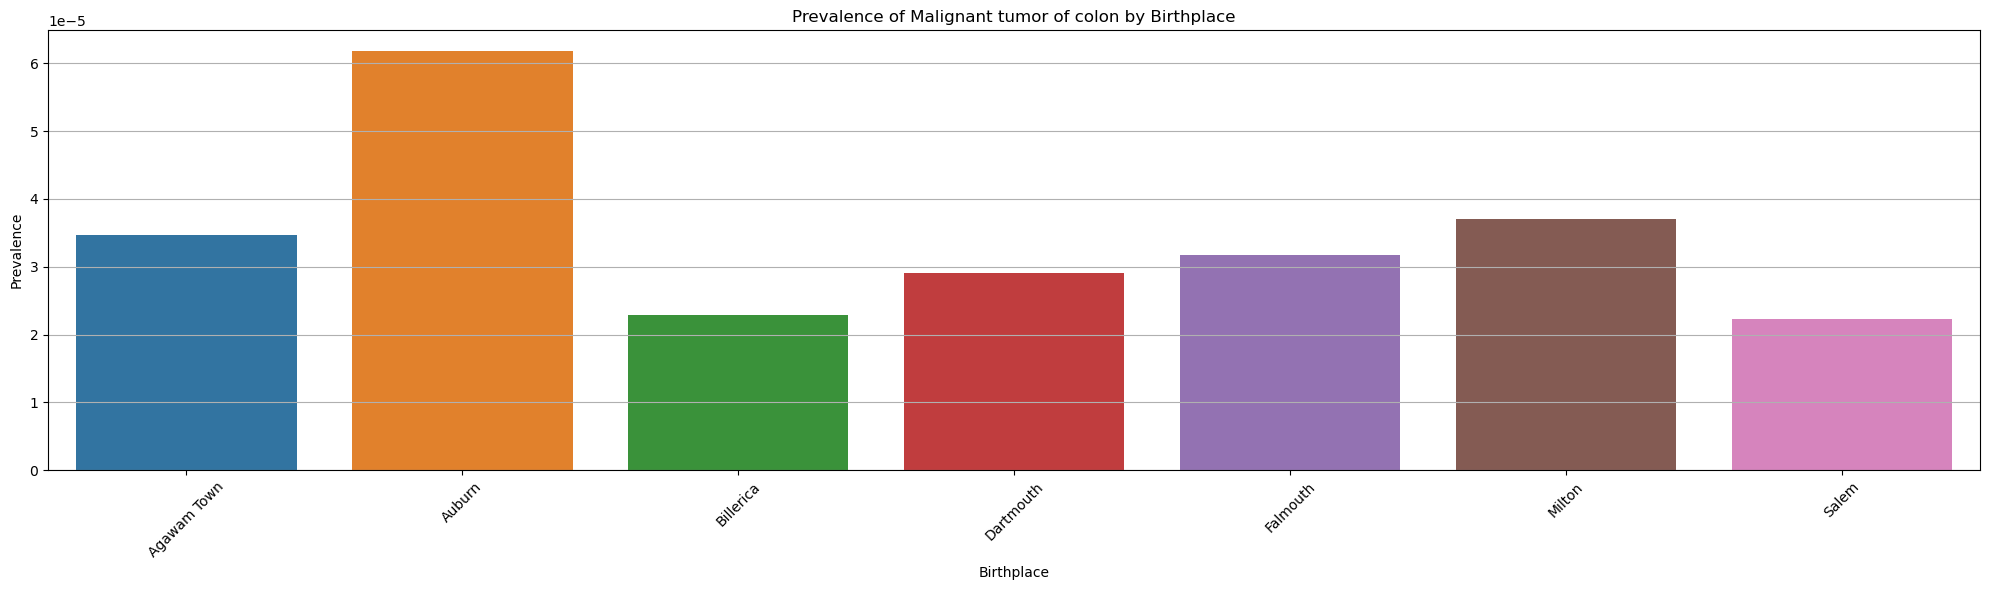

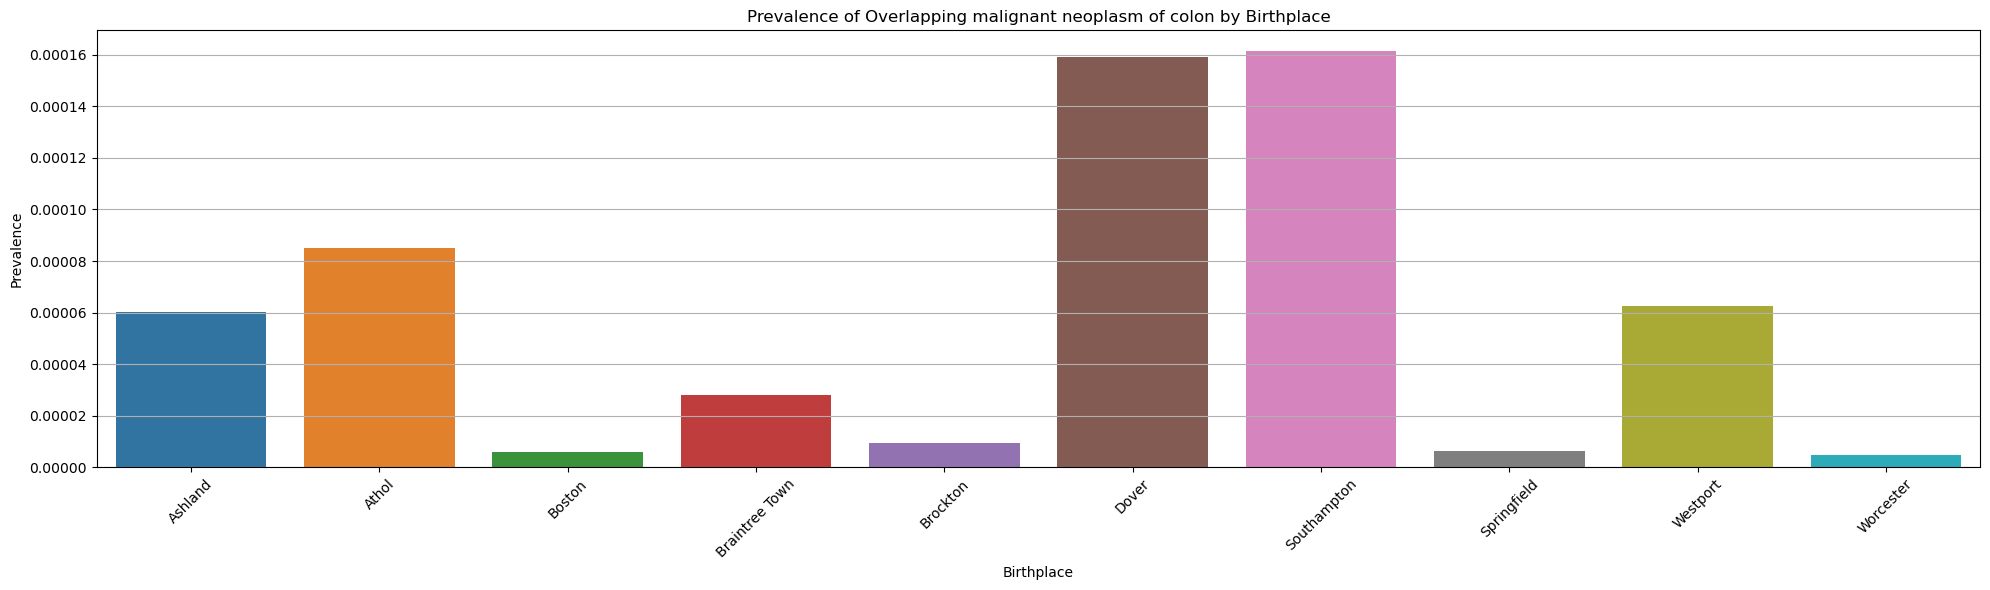

In [50]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatacanc[prevdatacanc[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Diabetes EDA

### DIABETES BY RACE

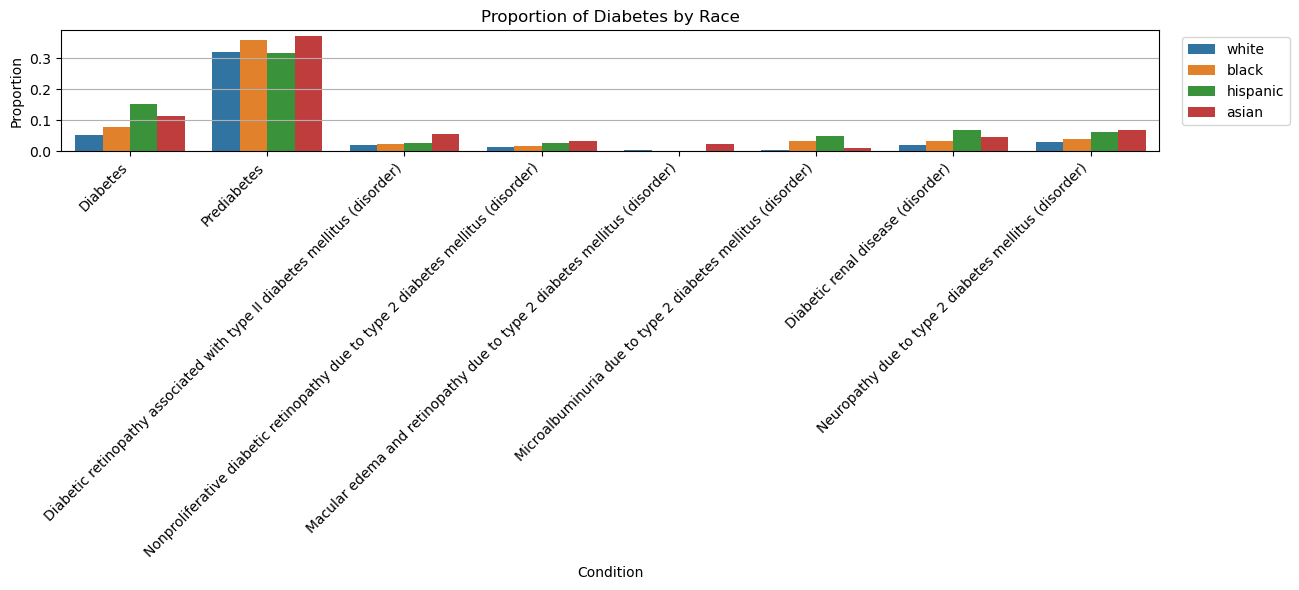

In [51]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in diabetes.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(diabetes, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Diabetes by Race')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.show()

### DIABETES BY ETHNICITY

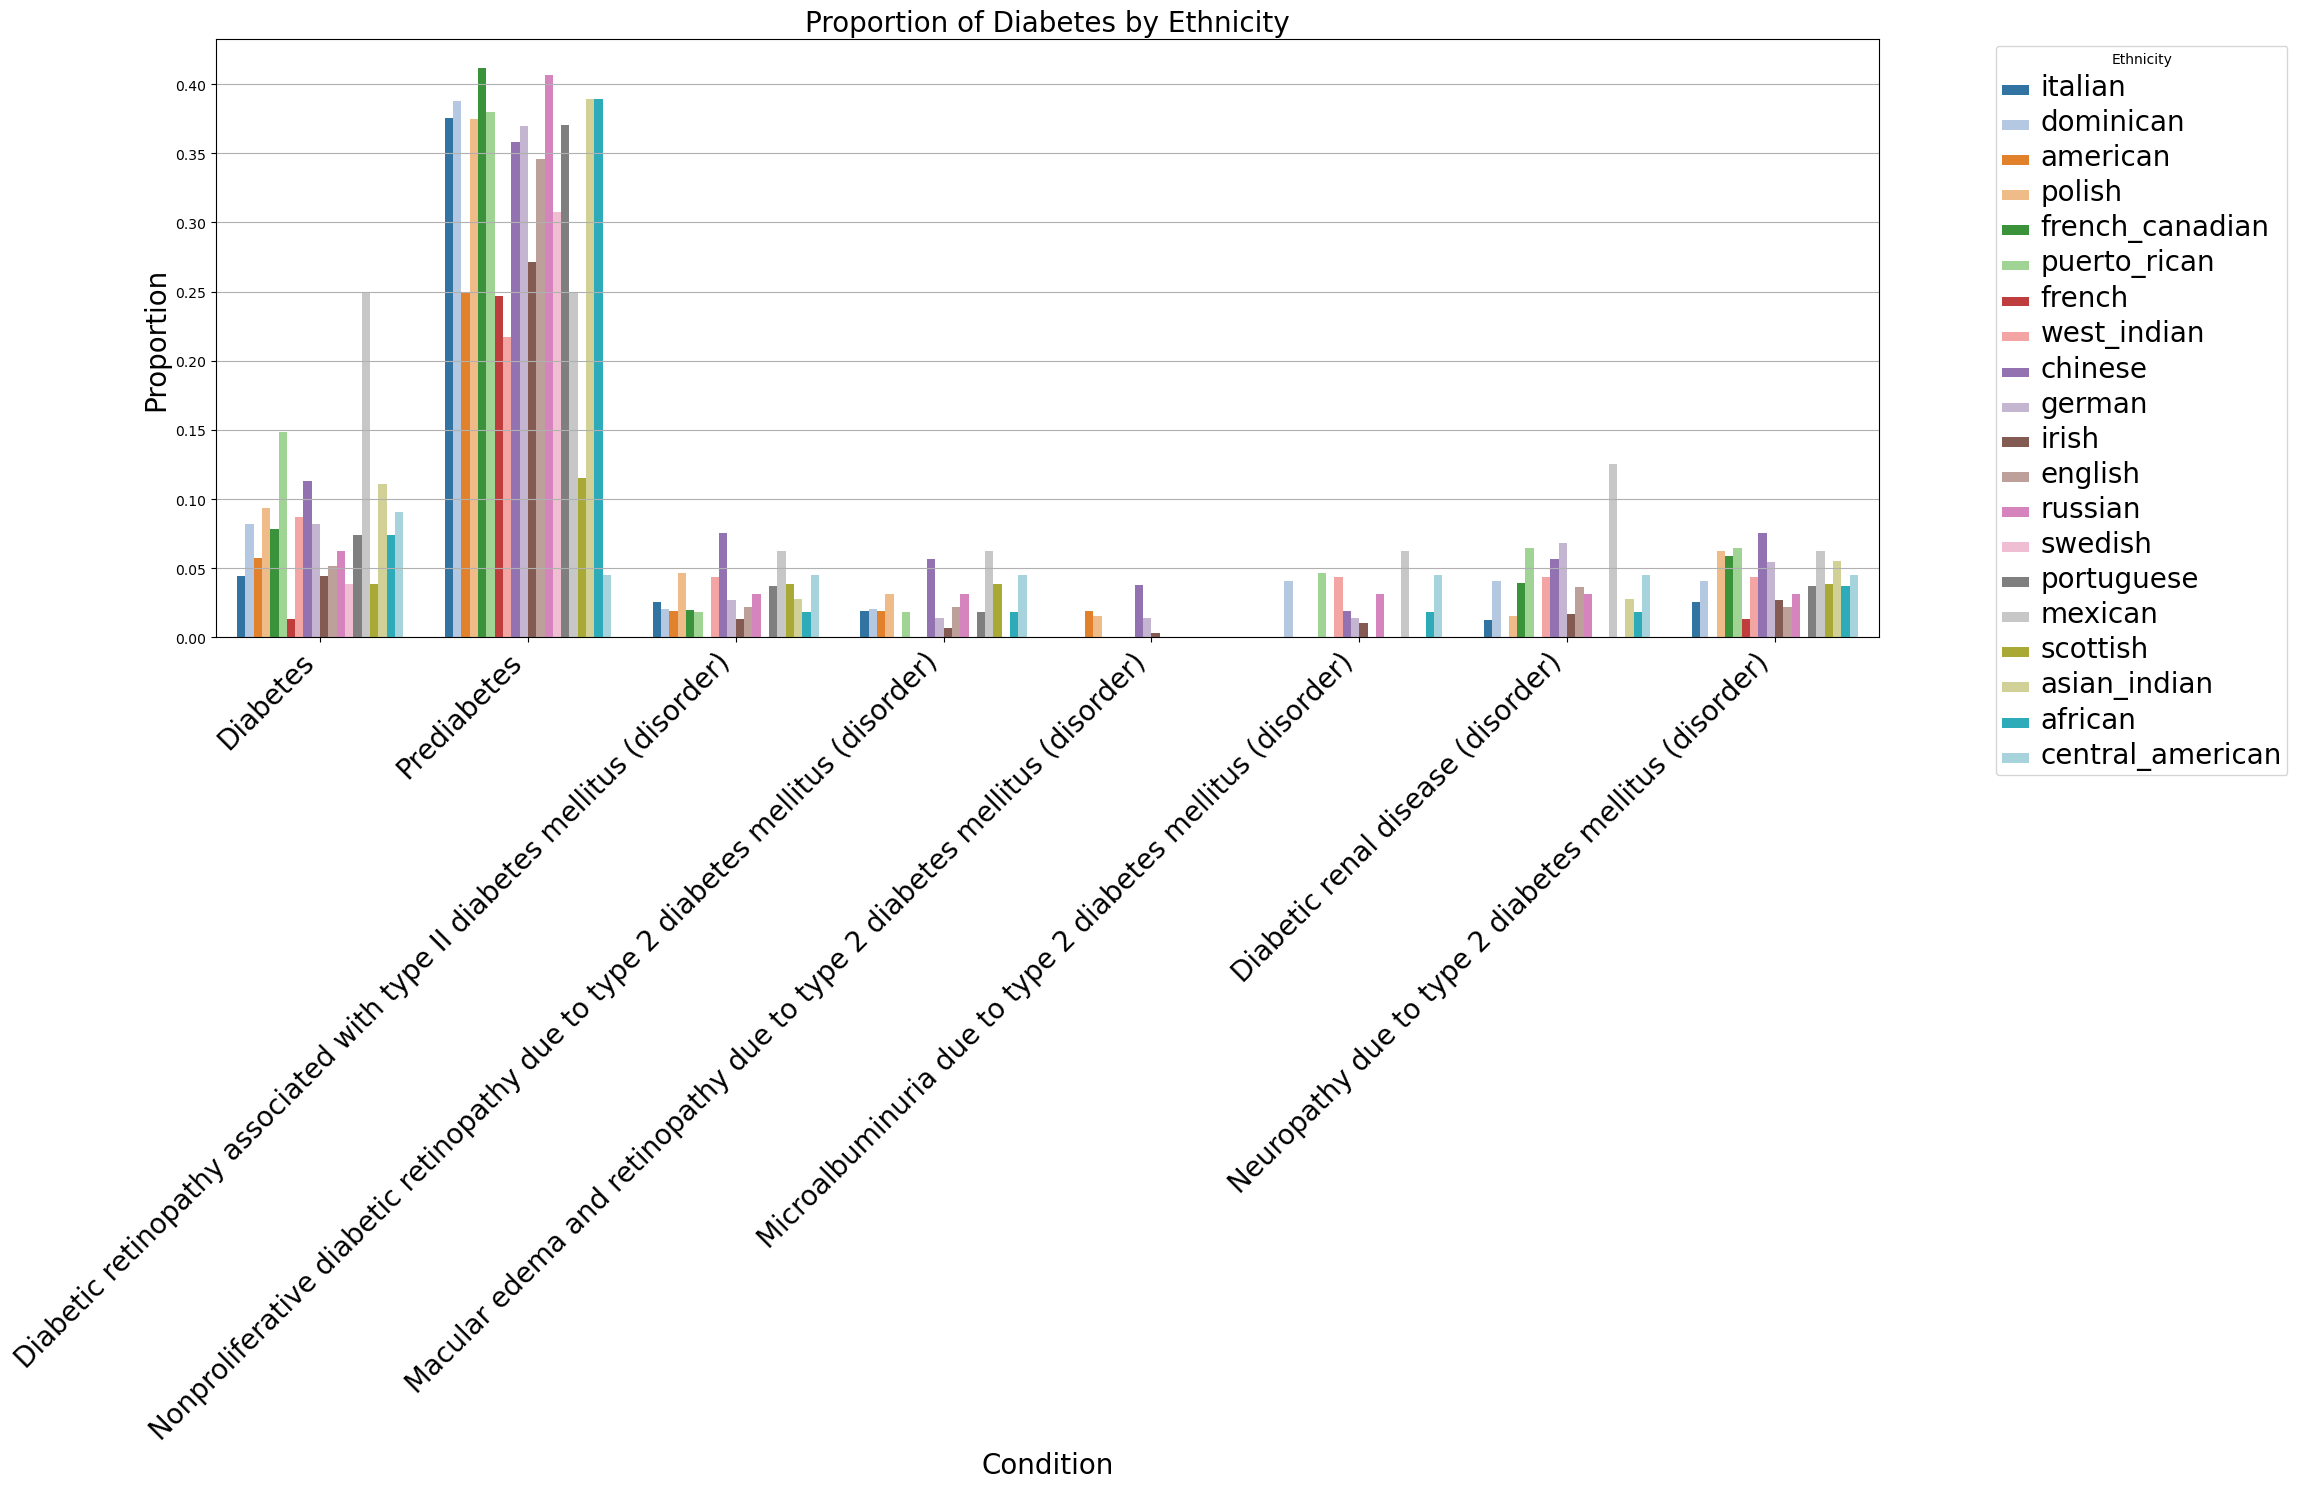

In [52]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in diabetes.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(diabetes, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Diabetes by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### DIABETES PREVALENCE BY BIRTHPLACE

In [53]:
condition_columns = [col for col in diabetes.columns if col.endswith('_CONDITIONS')]
conditions_summed = diabetes.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatadiab = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatadiab[f'prevalence_{condition_column}'] = prevdatadiab[condition_column] / prevdatadiab['pop']

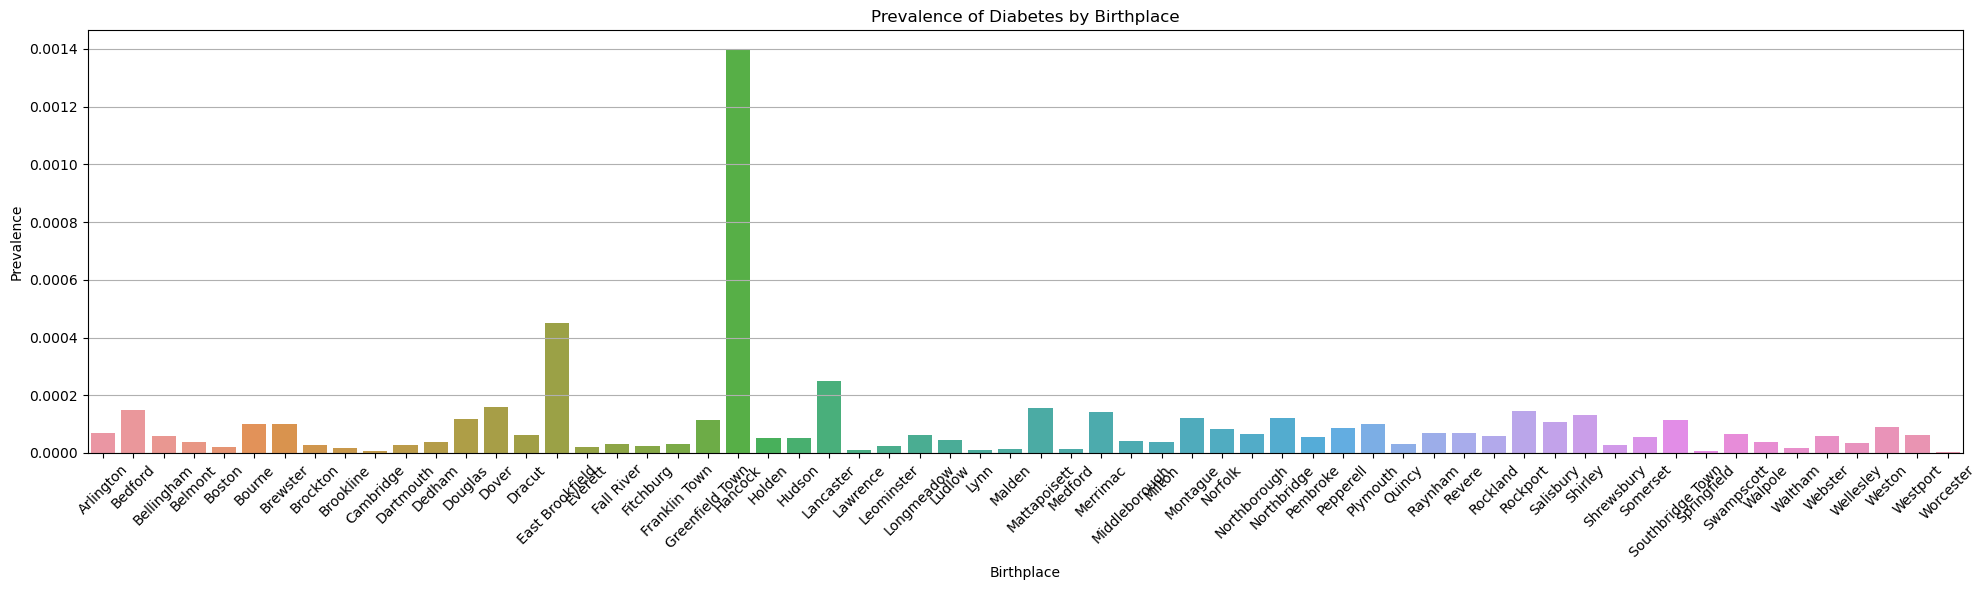

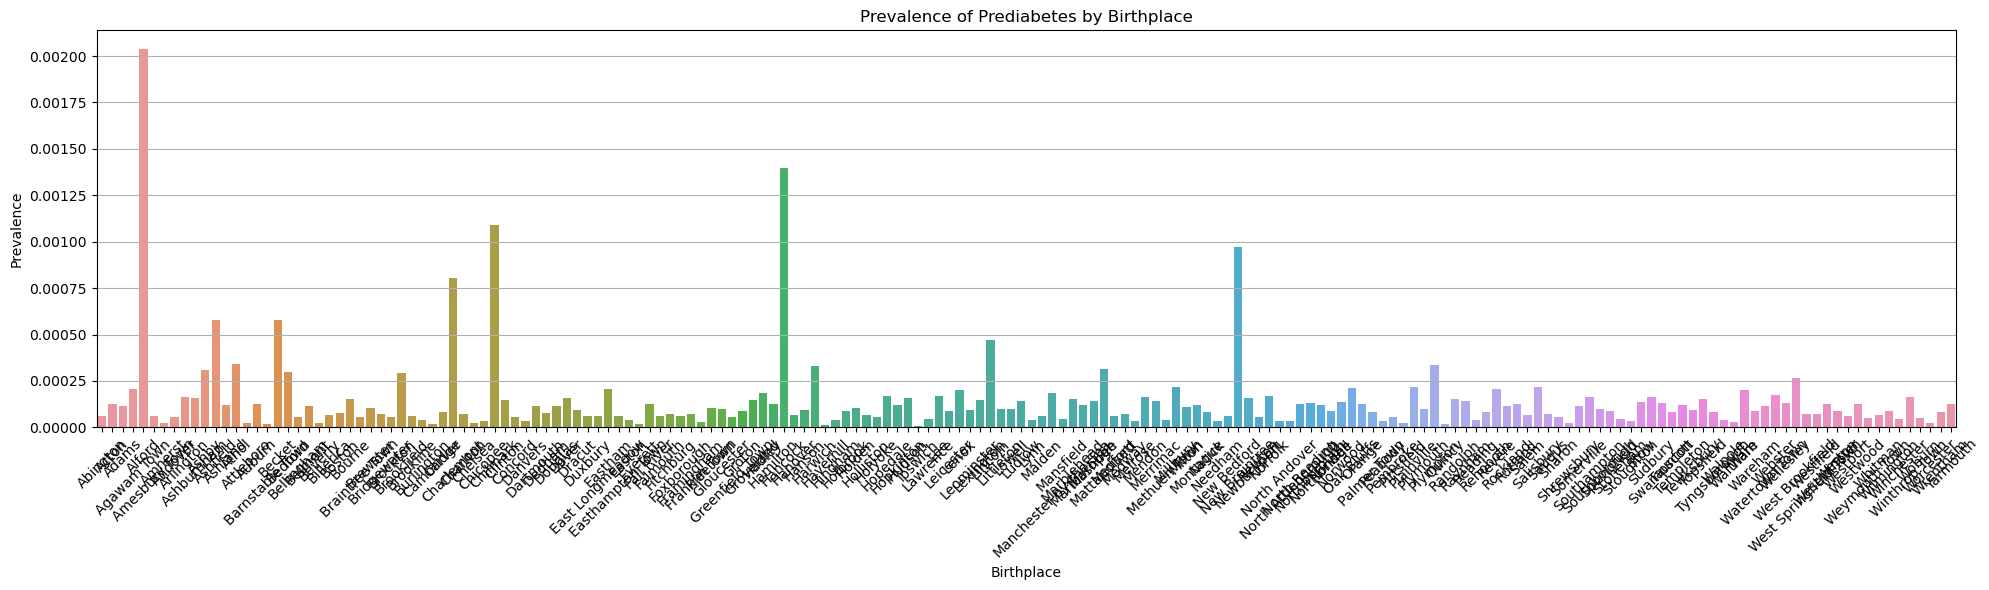

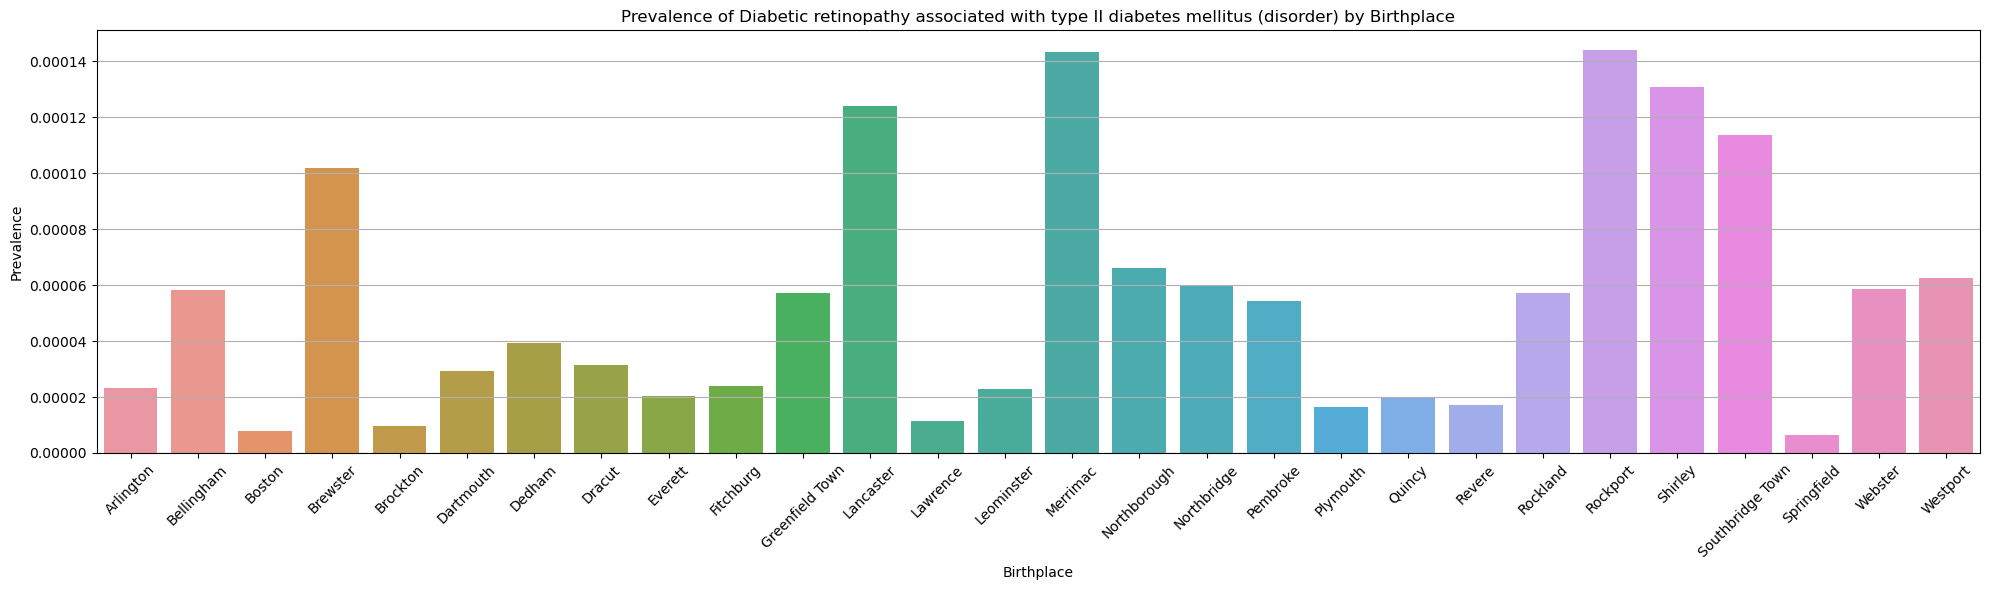

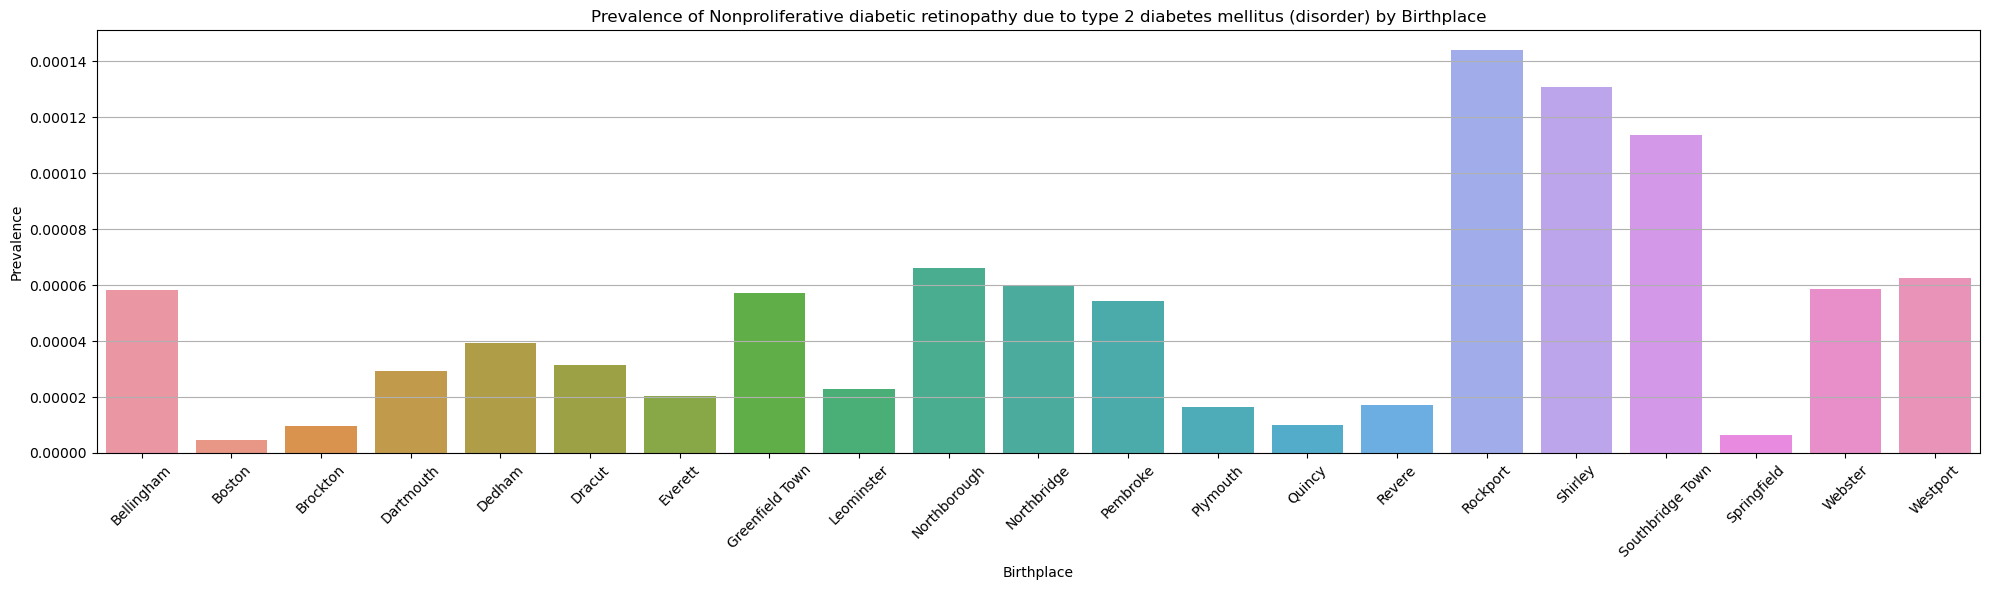

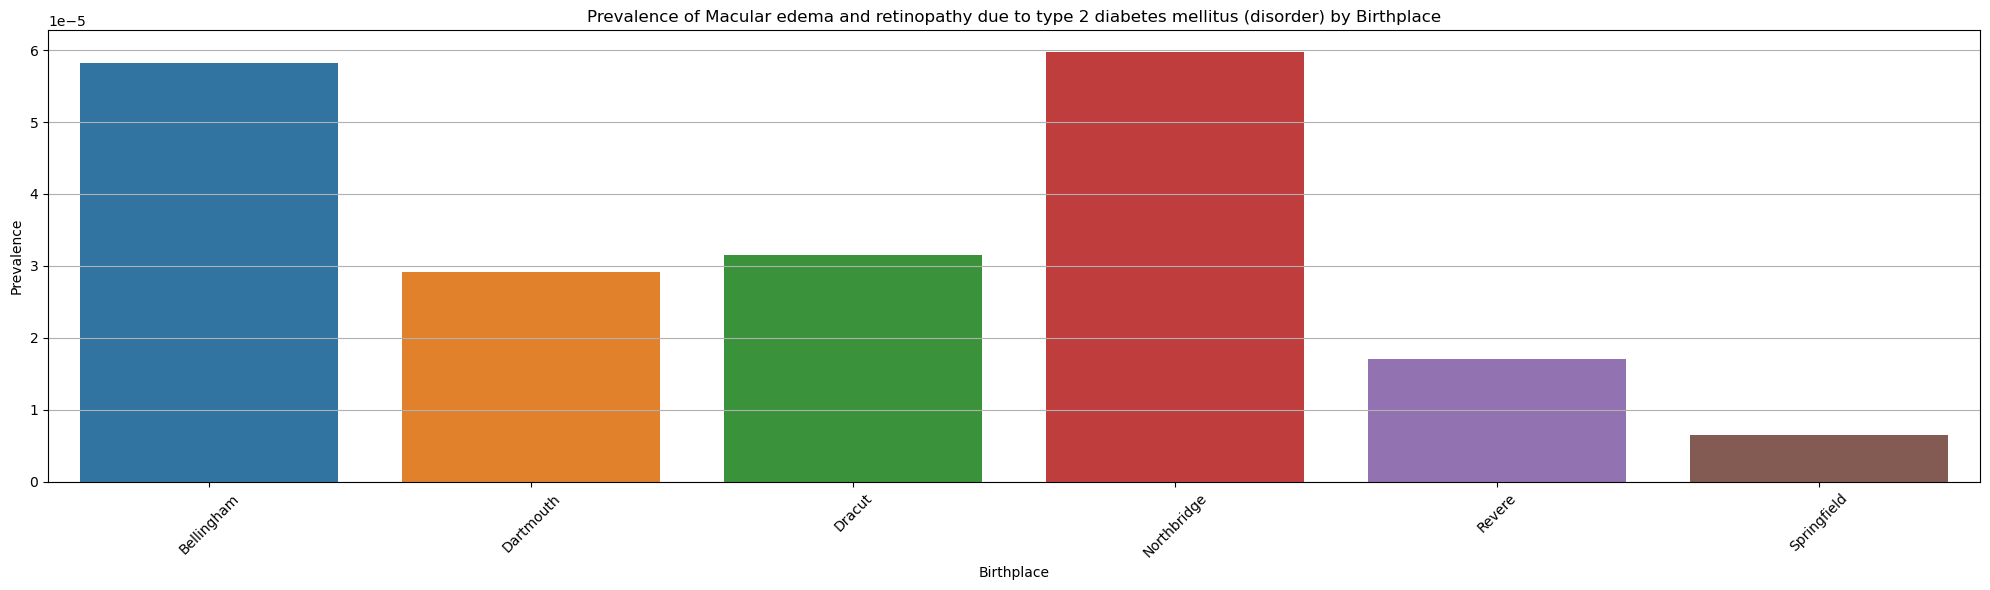

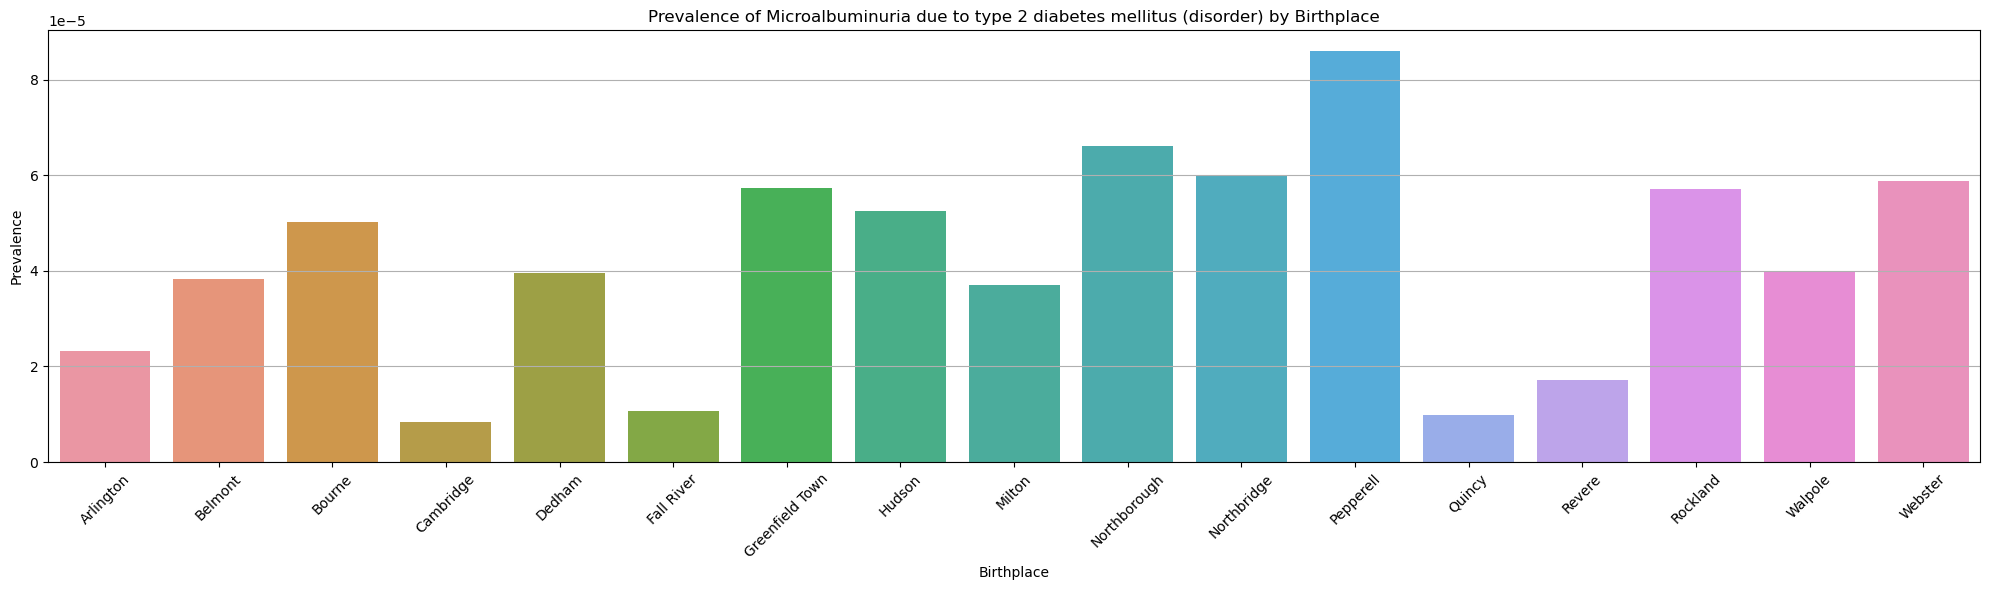

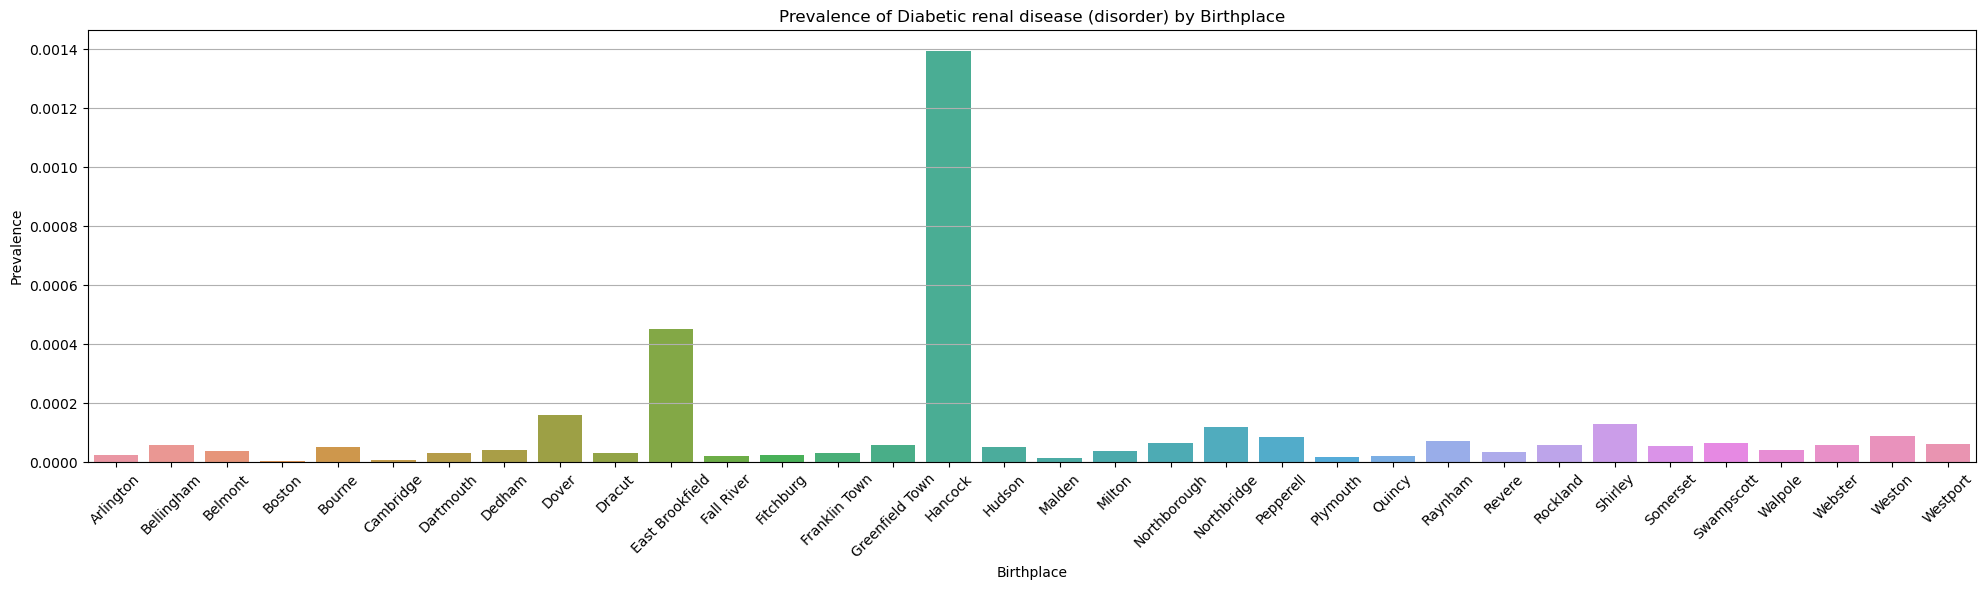

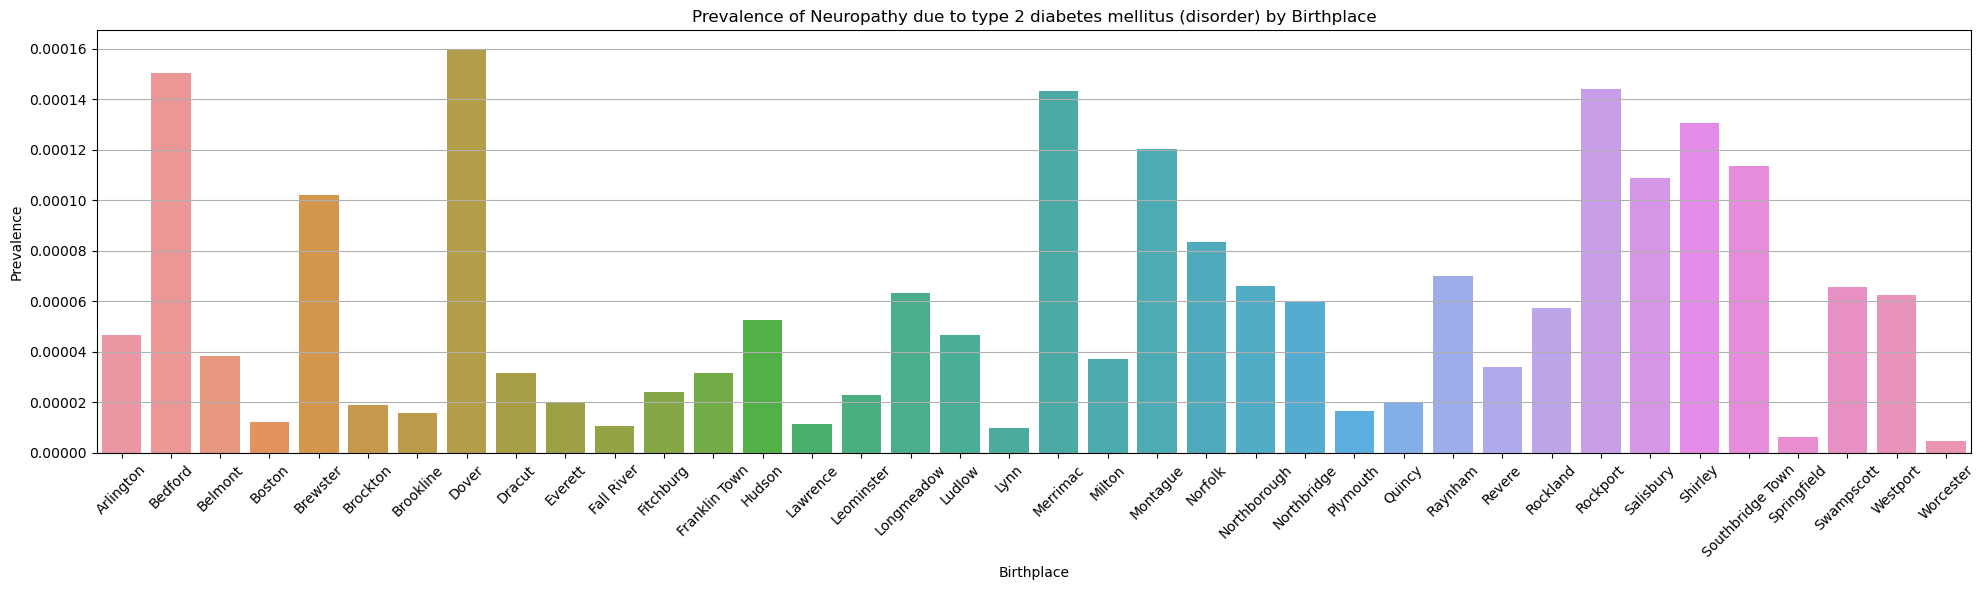

In [54]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatadiab[prevdatadiab[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Cardiovascular Diseases EDA

### CARDIOVASCULAR DISEASES BY RACE

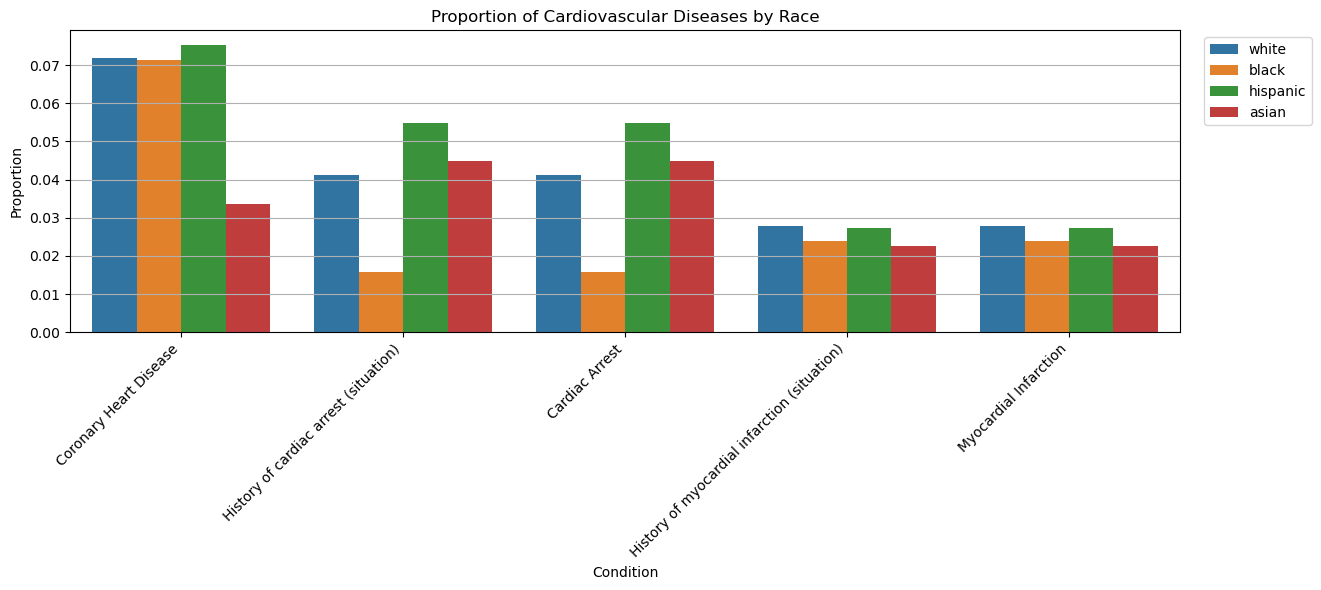

In [55]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in heart.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(heart, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Cardiovascular Diseases by Race')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.show()

### CARDIOVASCULAR DISEASES BY ETHNICITY

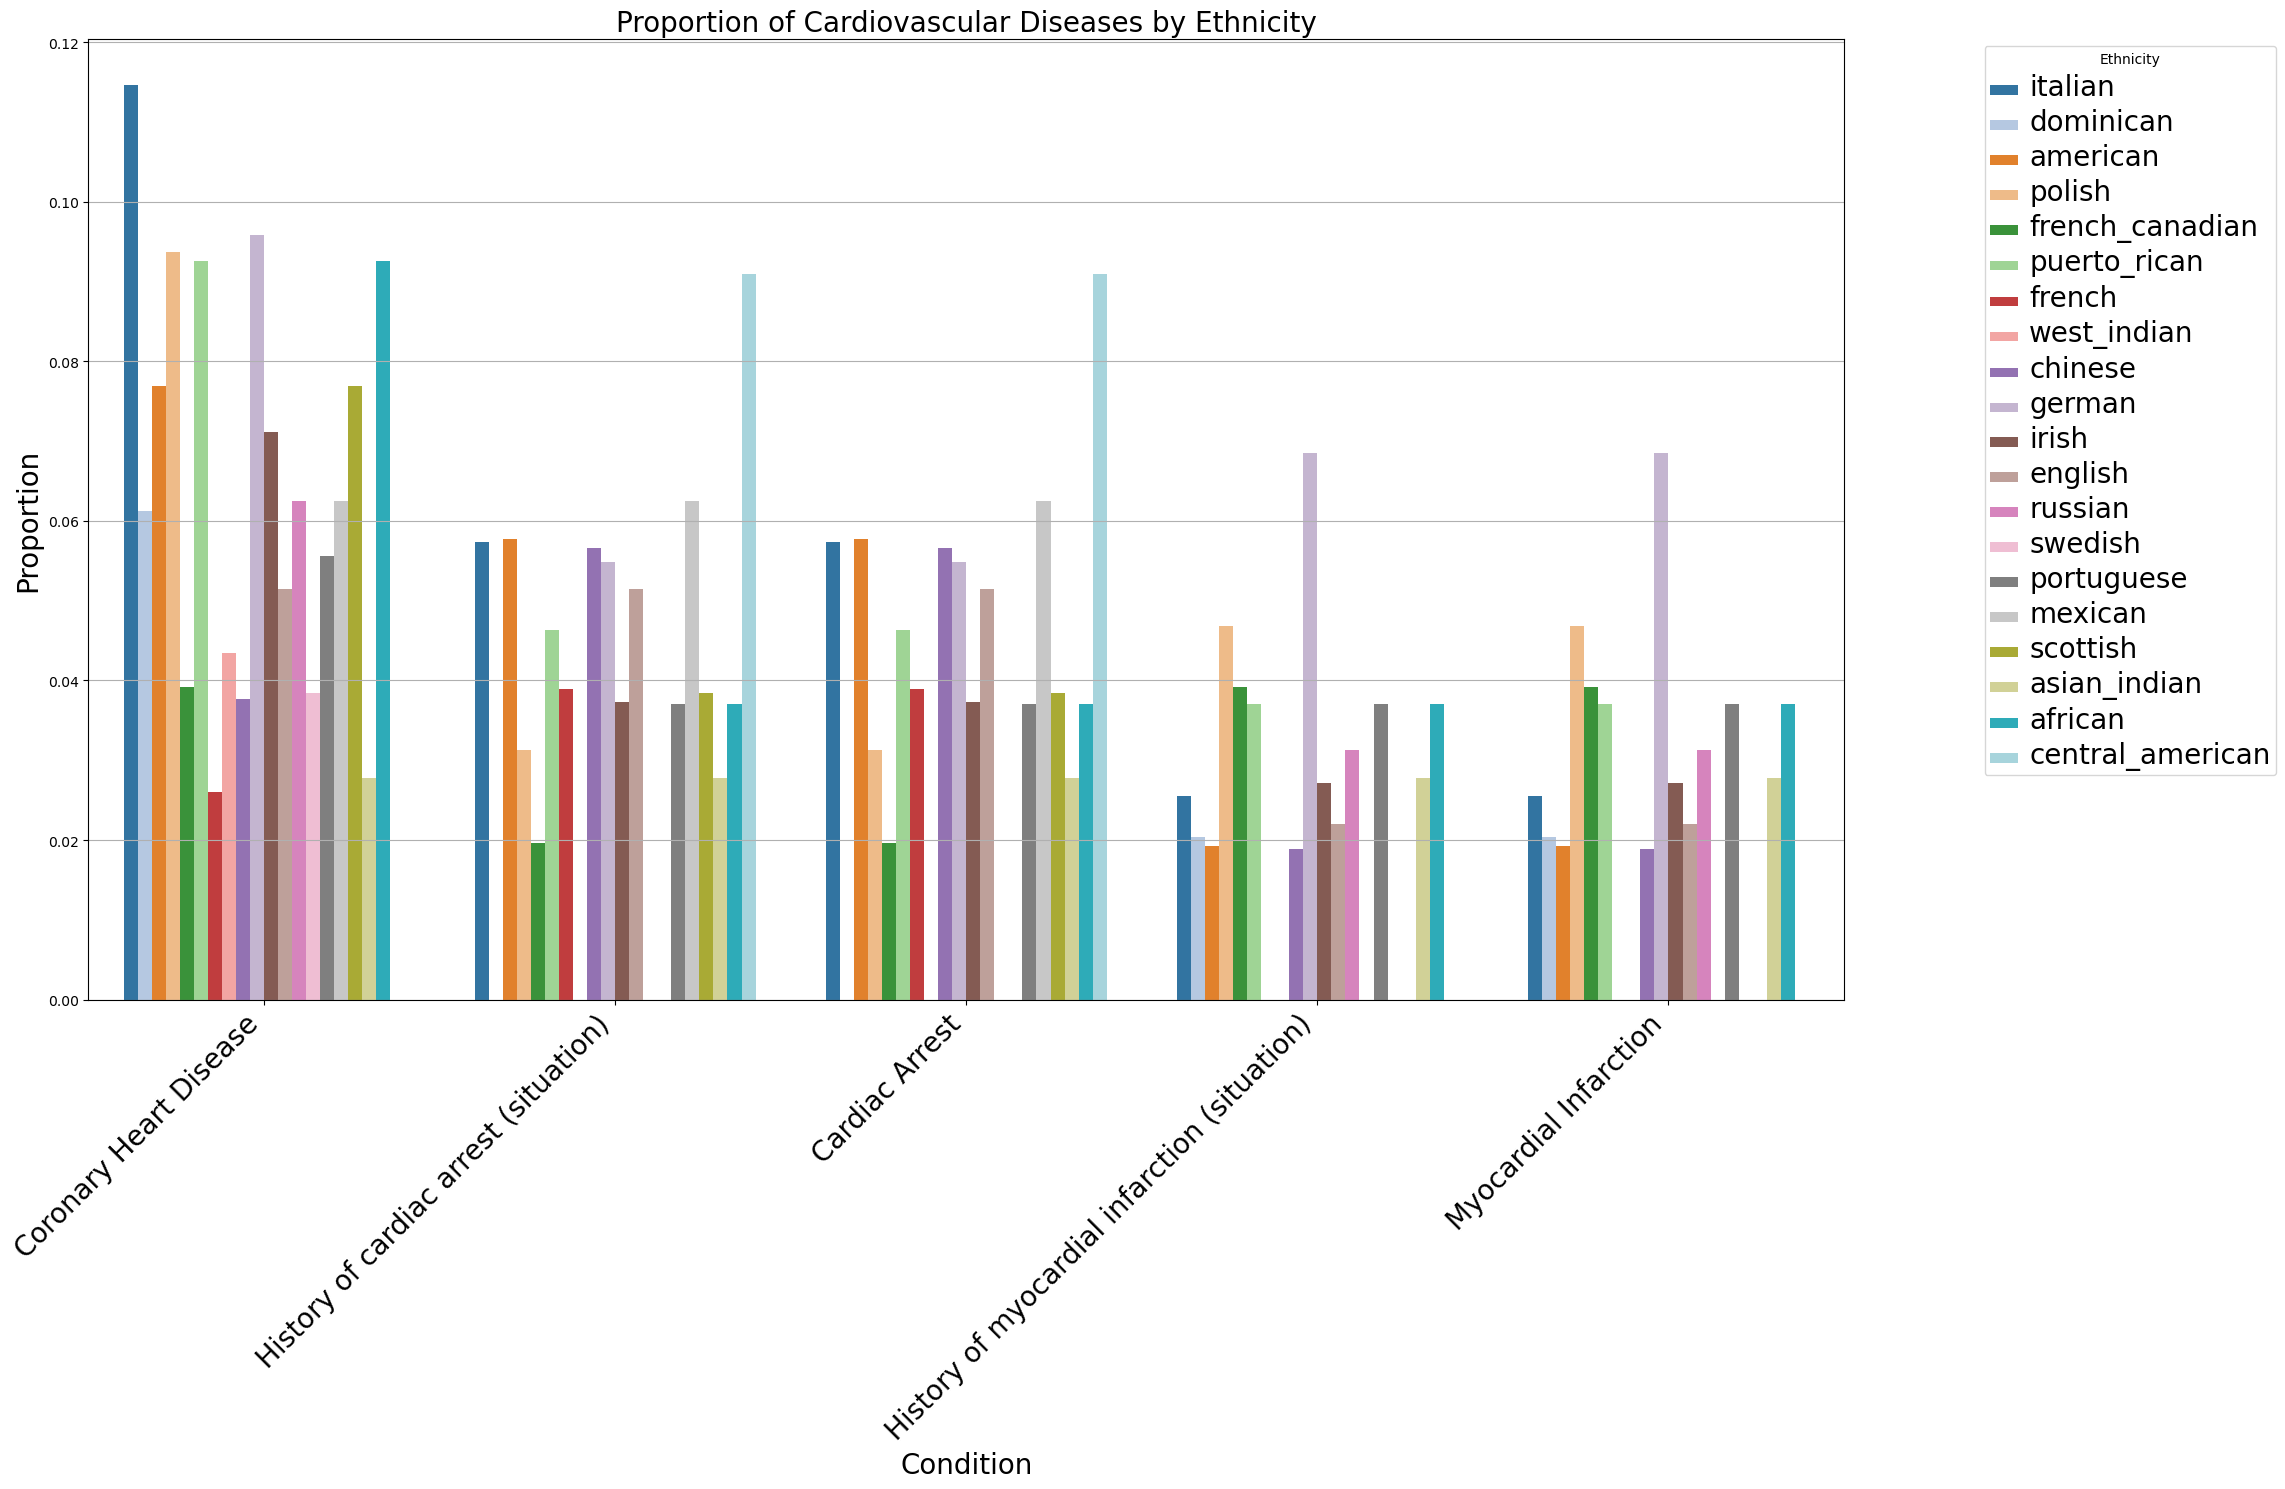

In [56]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in heart.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(heart, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Cardiovascular Diseases by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### CARDIOVASCULAR DISEASE PREVALENCE BY BIRTHPLACE

In [57]:
condition_columns = [col for col in heart.columns if col.endswith('_CONDITIONS')]
conditions_summed = heart.groupby('birthplace')[condition_columns].sum().reset_index()
prevdataheart = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdataheart[f'prevalence_{condition_column}'] = prevdataheart[condition_column] / prevdataheart['pop']

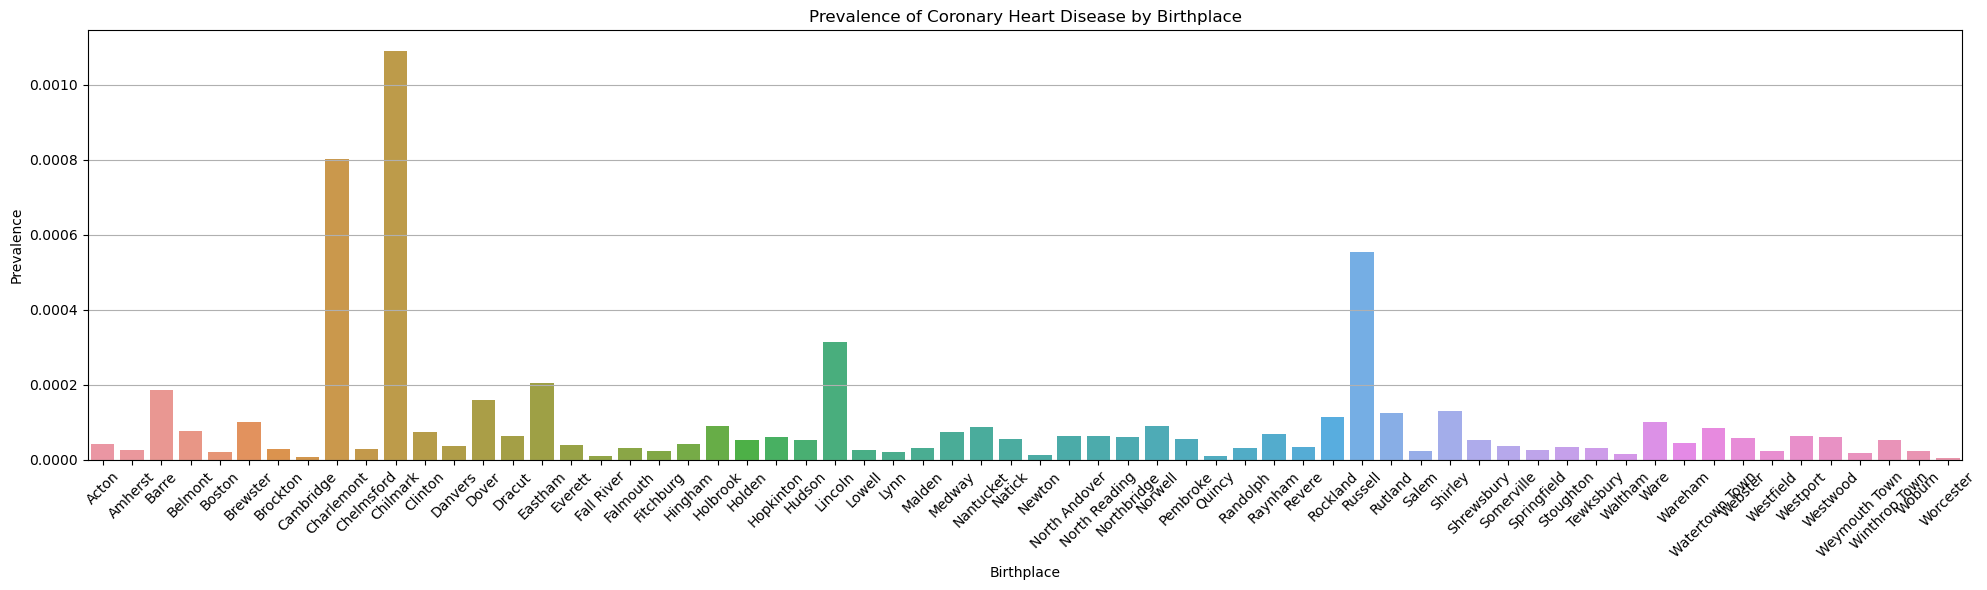

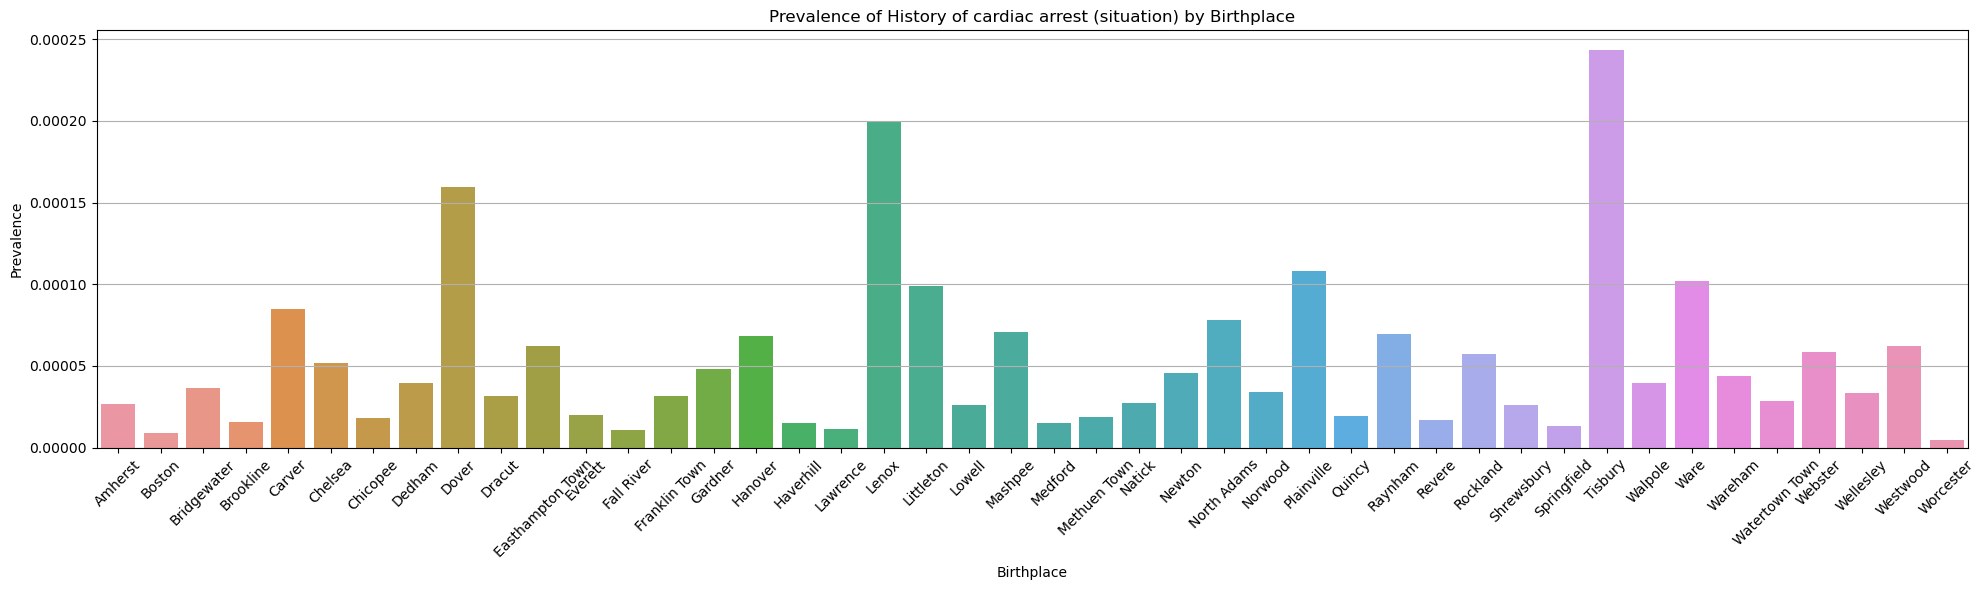

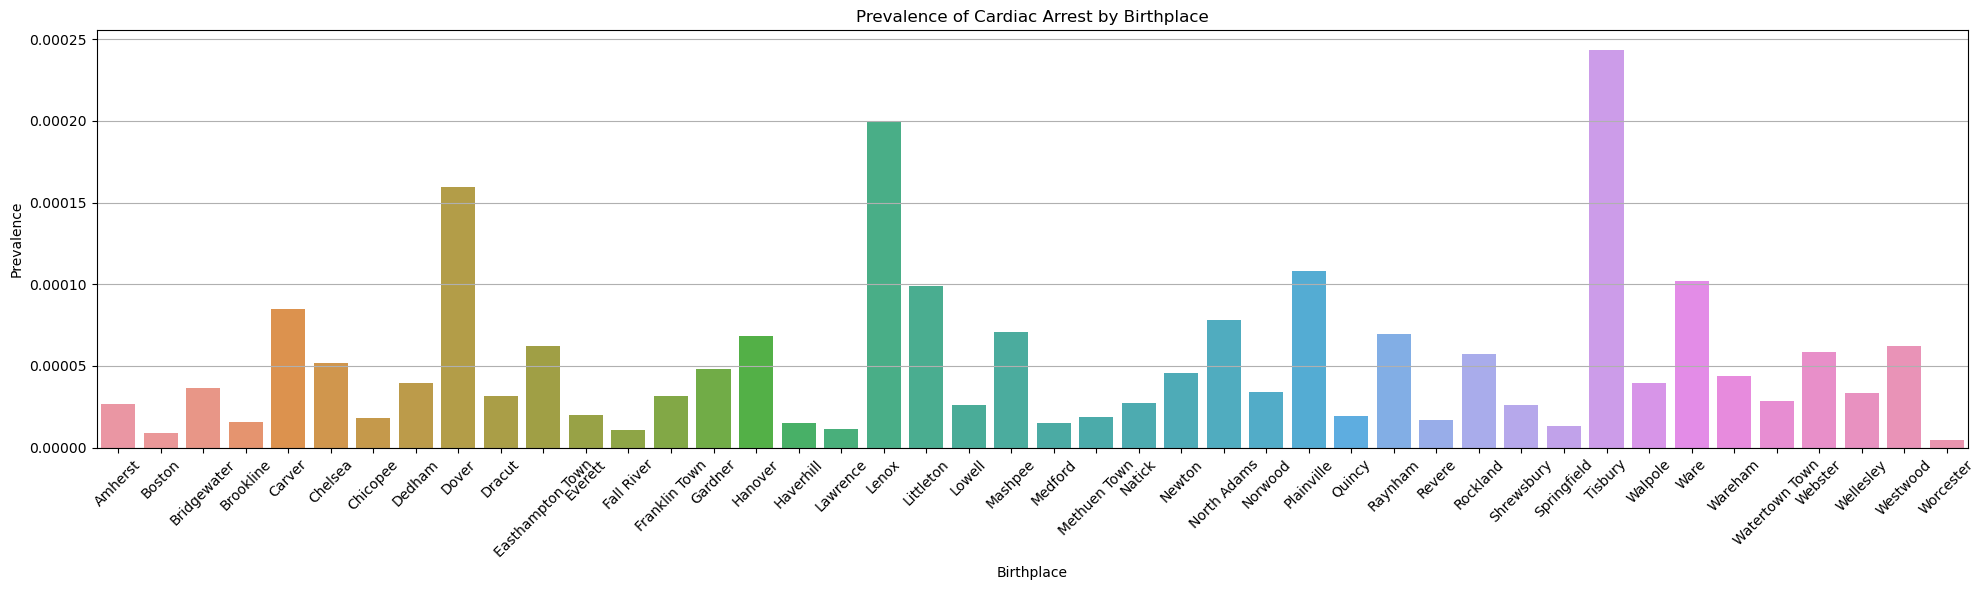

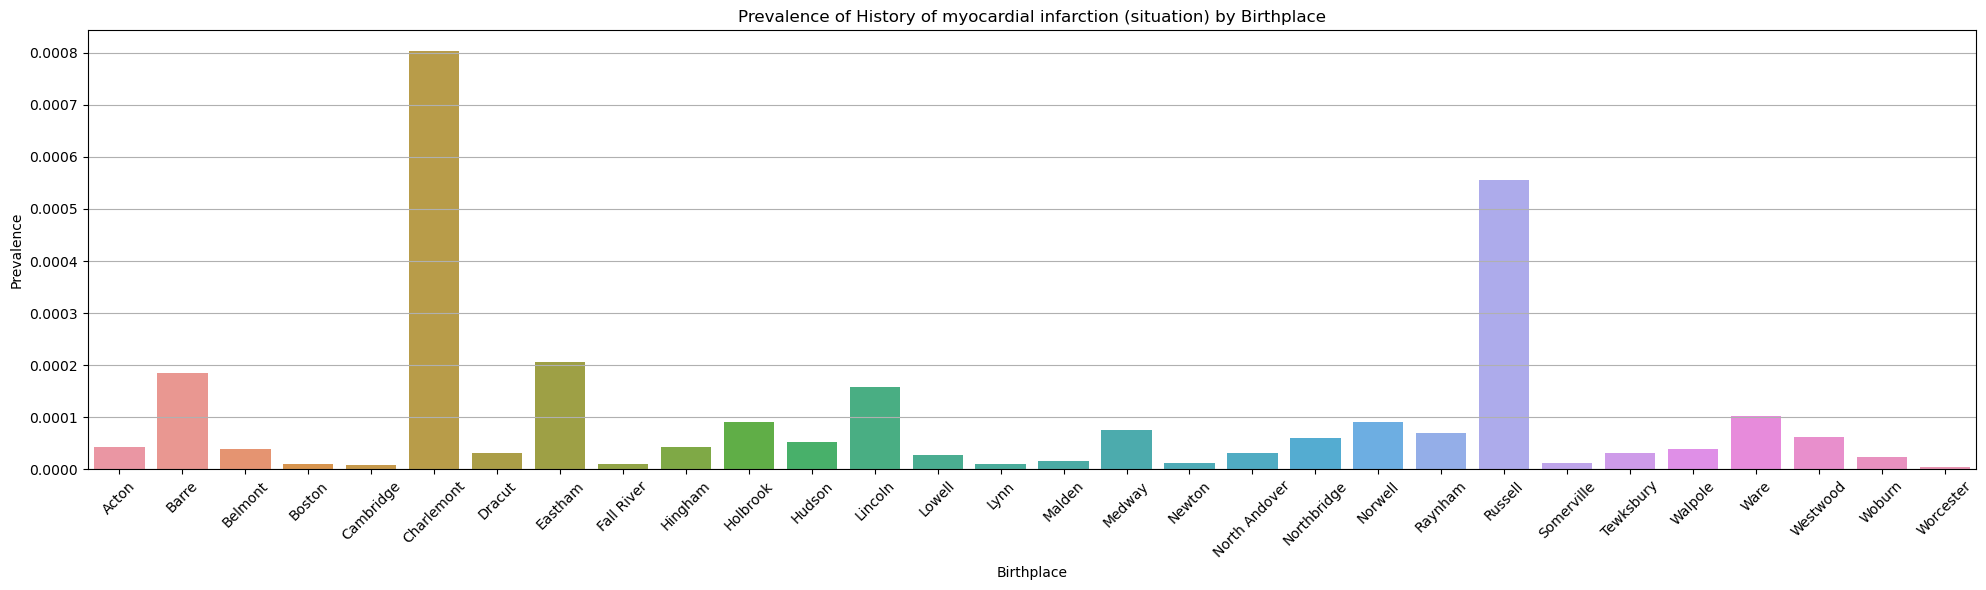

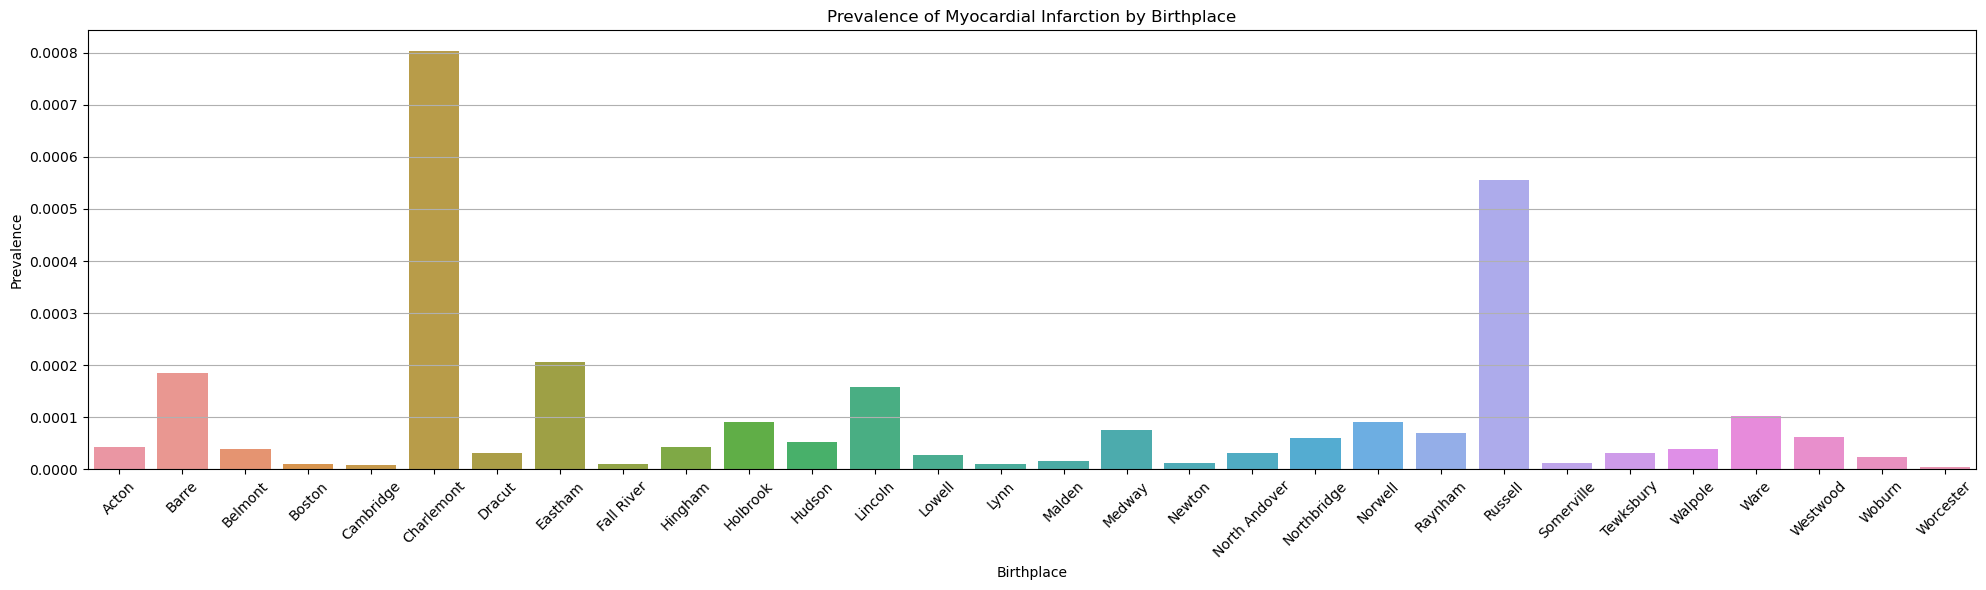

In [58]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdataheart[prevdataheart[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Pregnancy Complicationsn EDA

### PREGNANCY COMPLICATIONS BY RACE

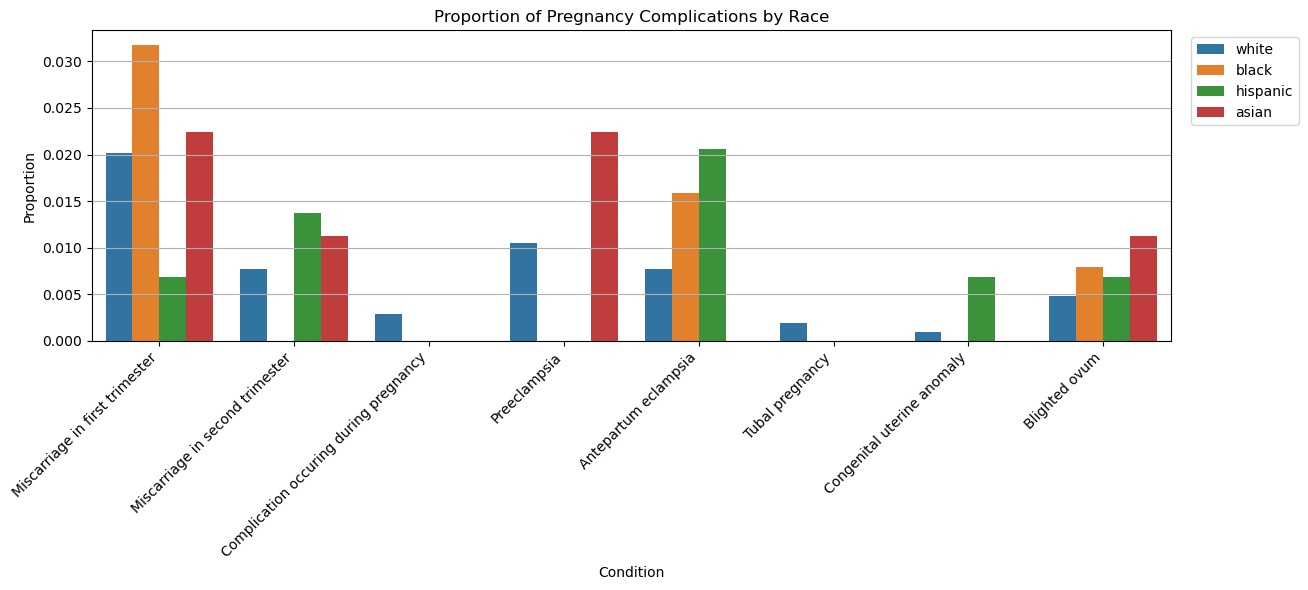

In [59]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in pregnancy.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(pregnancy, id_vars=['race'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]


plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(x='variable', y='value', hue='race', data=melted_df, errorbar=None)
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right')
plt.xlabel('Condition')
plt.ylabel('Proportion')
plt.title('Proportion of Pregnancy Complications by Race')
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.125, 1))
plt.show()

### PREGNANCY COMPLICATIONS BY ETHNICITY

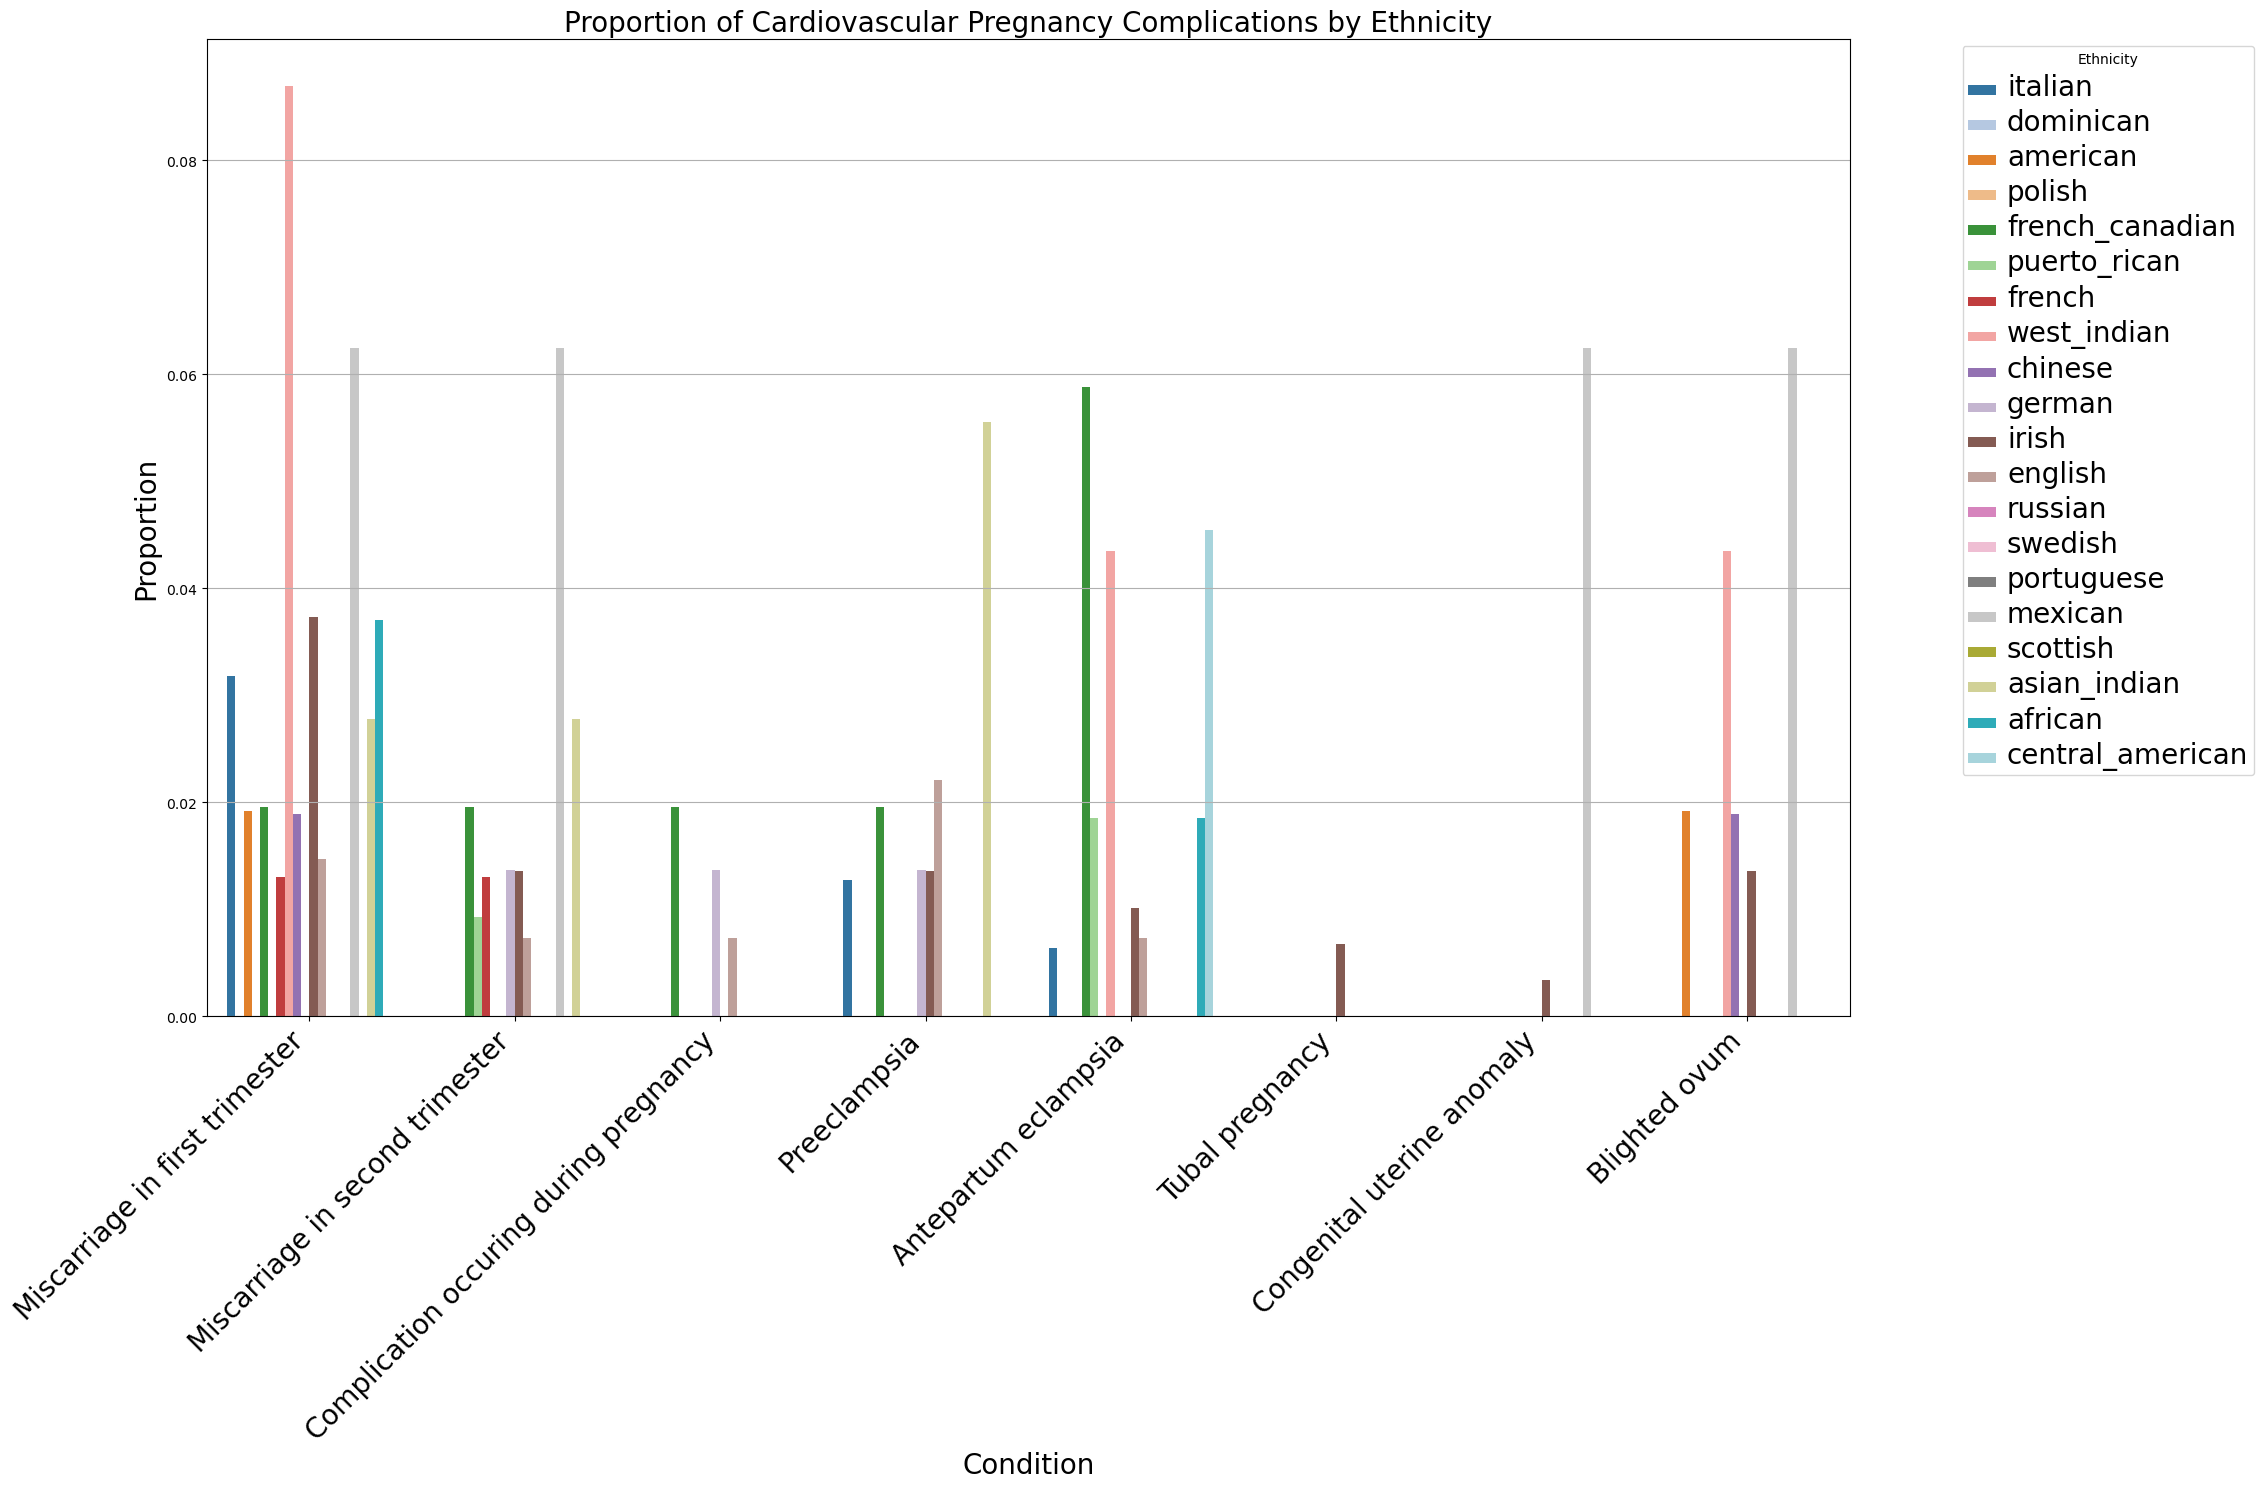

In [60]:
# Get the columns ending with '_CONDITIONS'
condition_columns = [col for col in pregnancy.columns if col.endswith('_CONDITIONS')]

# Melt the DataFrame to long format
melted_df = pd.melt(pregnancy, id_vars=['ethnicity'], value_vars=condition_columns)

clean_condition_labels = [col.replace('_CONDITIONS', '') for col in condition_columns]

plt.figure(figsize=(23, 15))
plt.grid()
sns.barplot(x='variable', y='value', hue='ethnicity', data=melted_df, errorbar=None, palette='tab20')
plt.xticks(ticks=range(len(clean_condition_labels)), labels=clean_condition_labels, rotation=45, ha='right', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.title('Proportion of Cardiovascular Pregnancy Complications by Ethnicity', fontsize=20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Ethnicity')
for label in legend.get_texts():
    label.set_fontsize(20) 
plt.tight_layout()
plt.show()

### PREGNANCY COMPLICATIONS BY BIRTHPLACE

In [61]:
condition_columns = [col for col in pregnancy.columns if col.endswith('_CONDITIONS')]
conditions_summed = pregnancy.groupby('birthplace')[condition_columns].sum().reset_index()
prevdatapreg = pd.merge(conditions_summed, populations, on="birthplace")
for condition_column in condition_columns:
    prevdatapreg[f'prevalence_{condition_column}'] = prevdatapreg[condition_column] / prevdatapreg['pop']

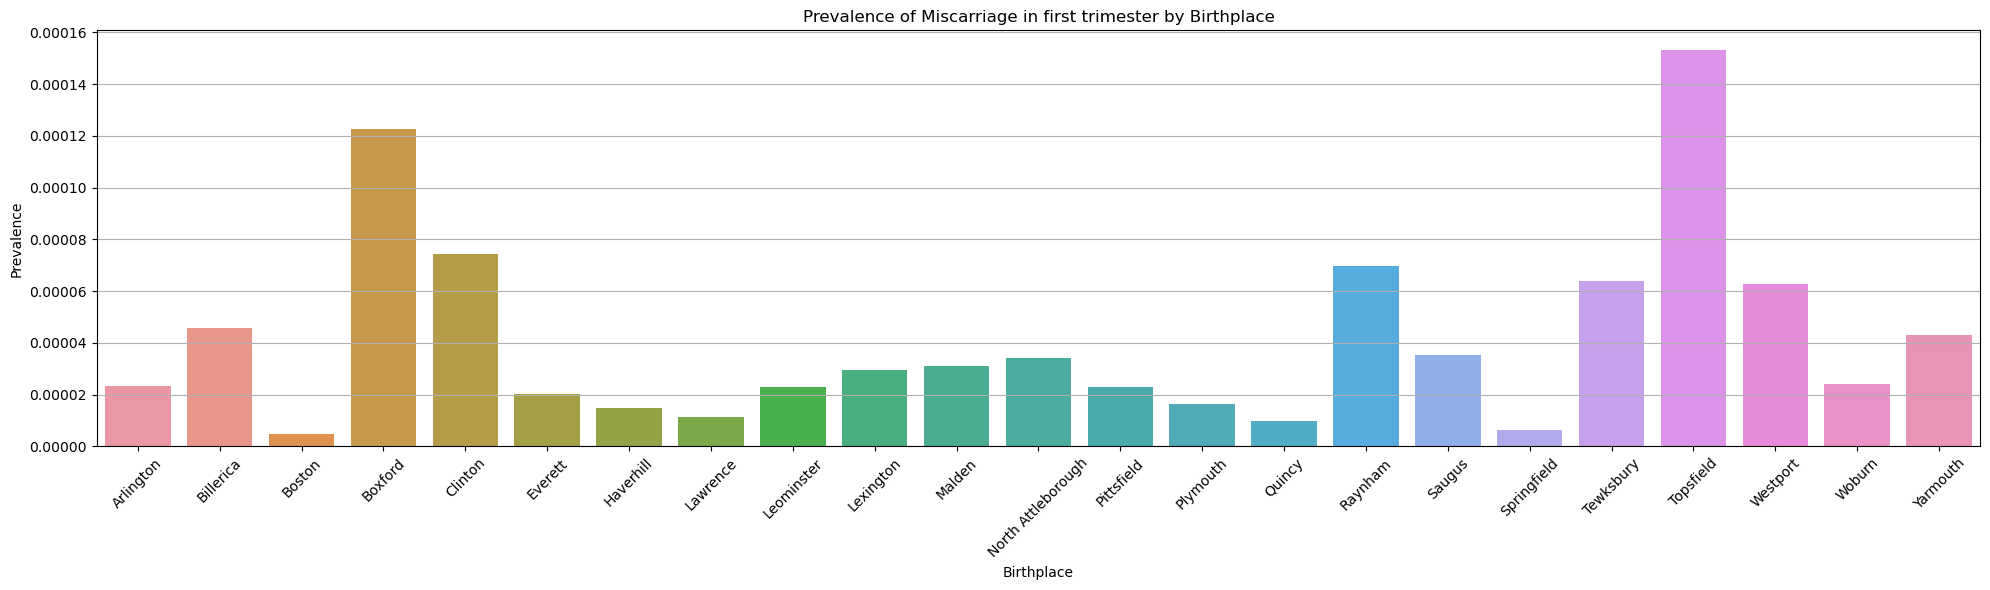

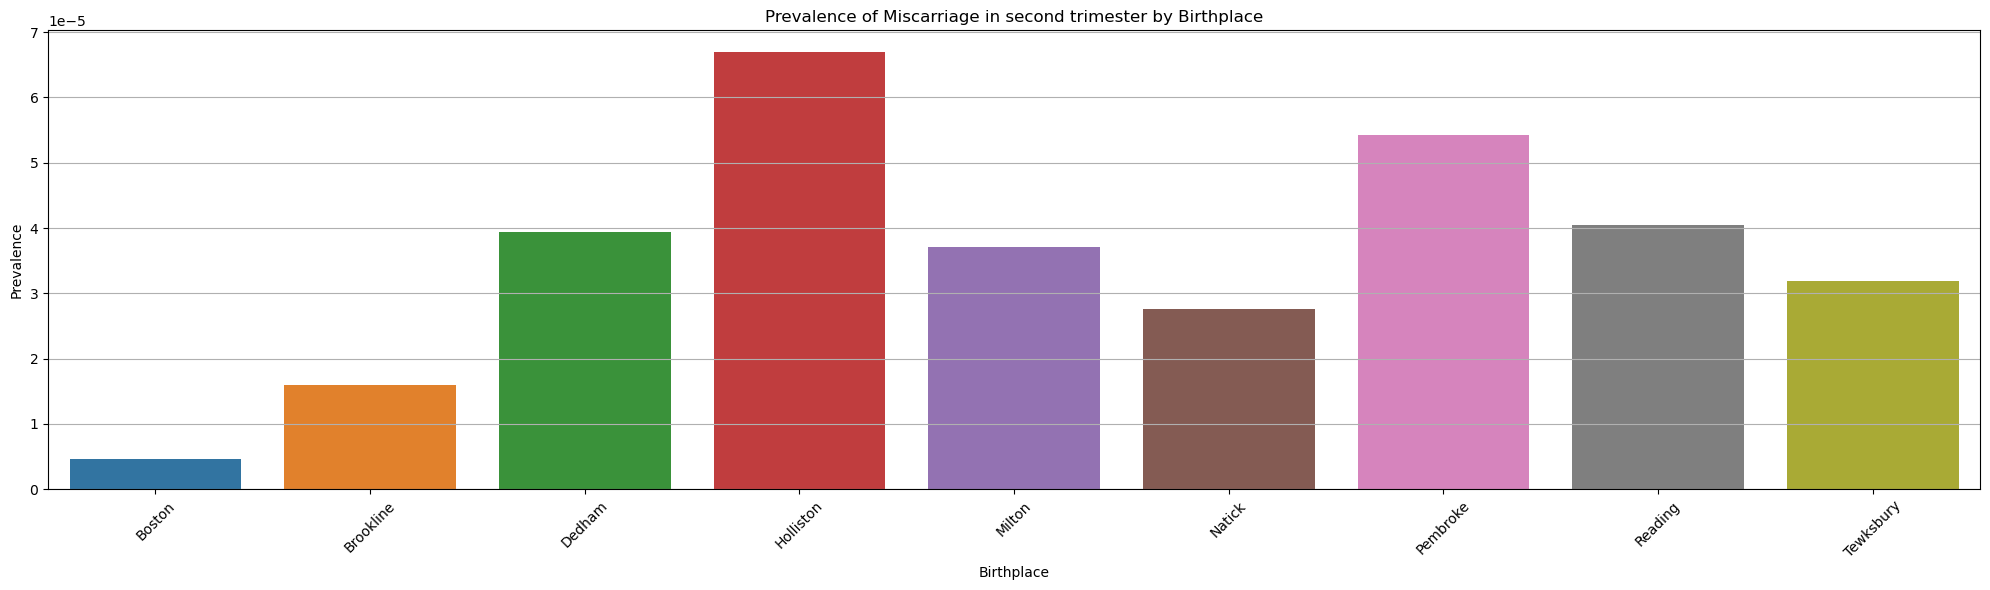

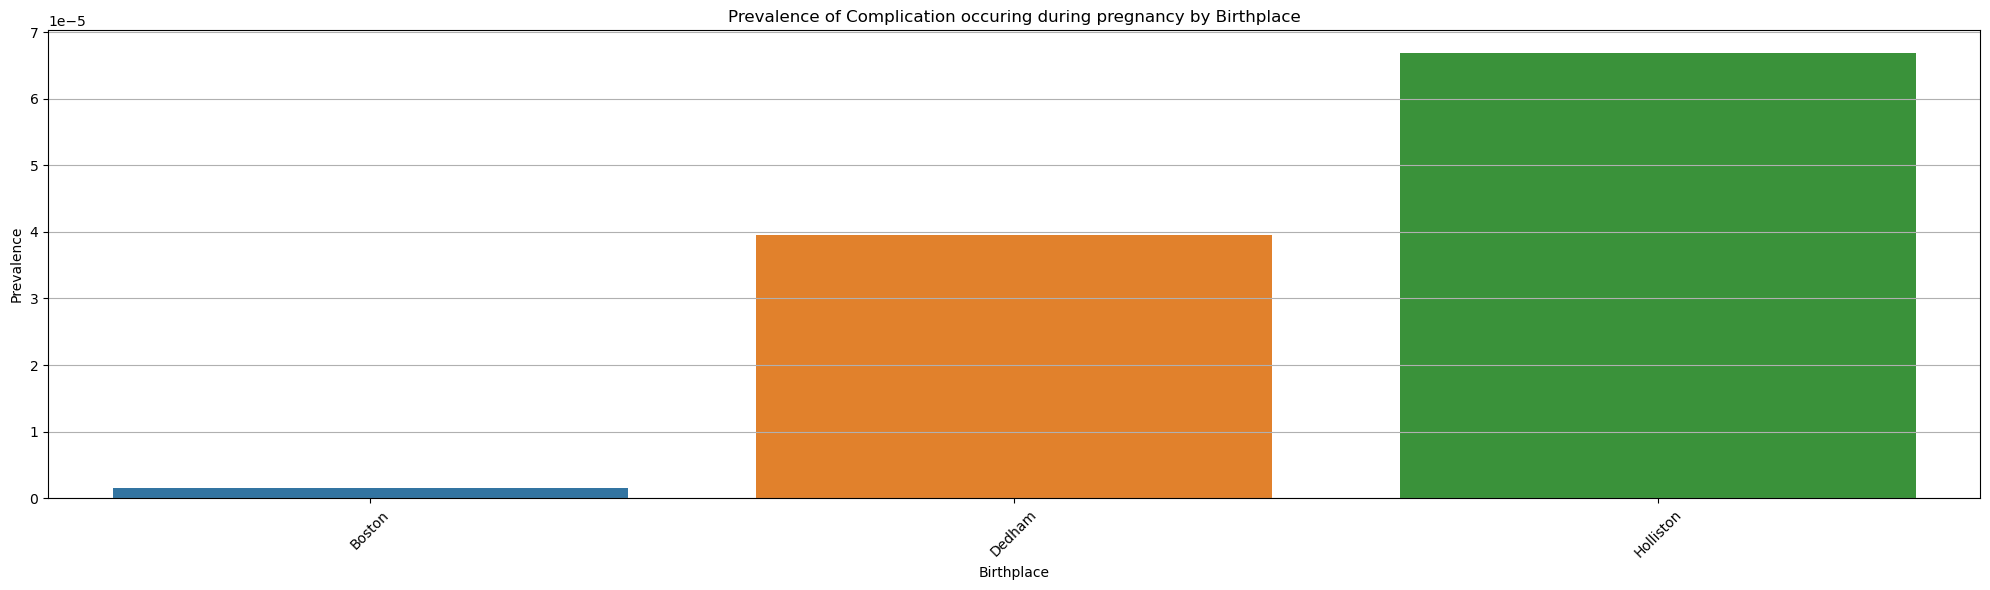

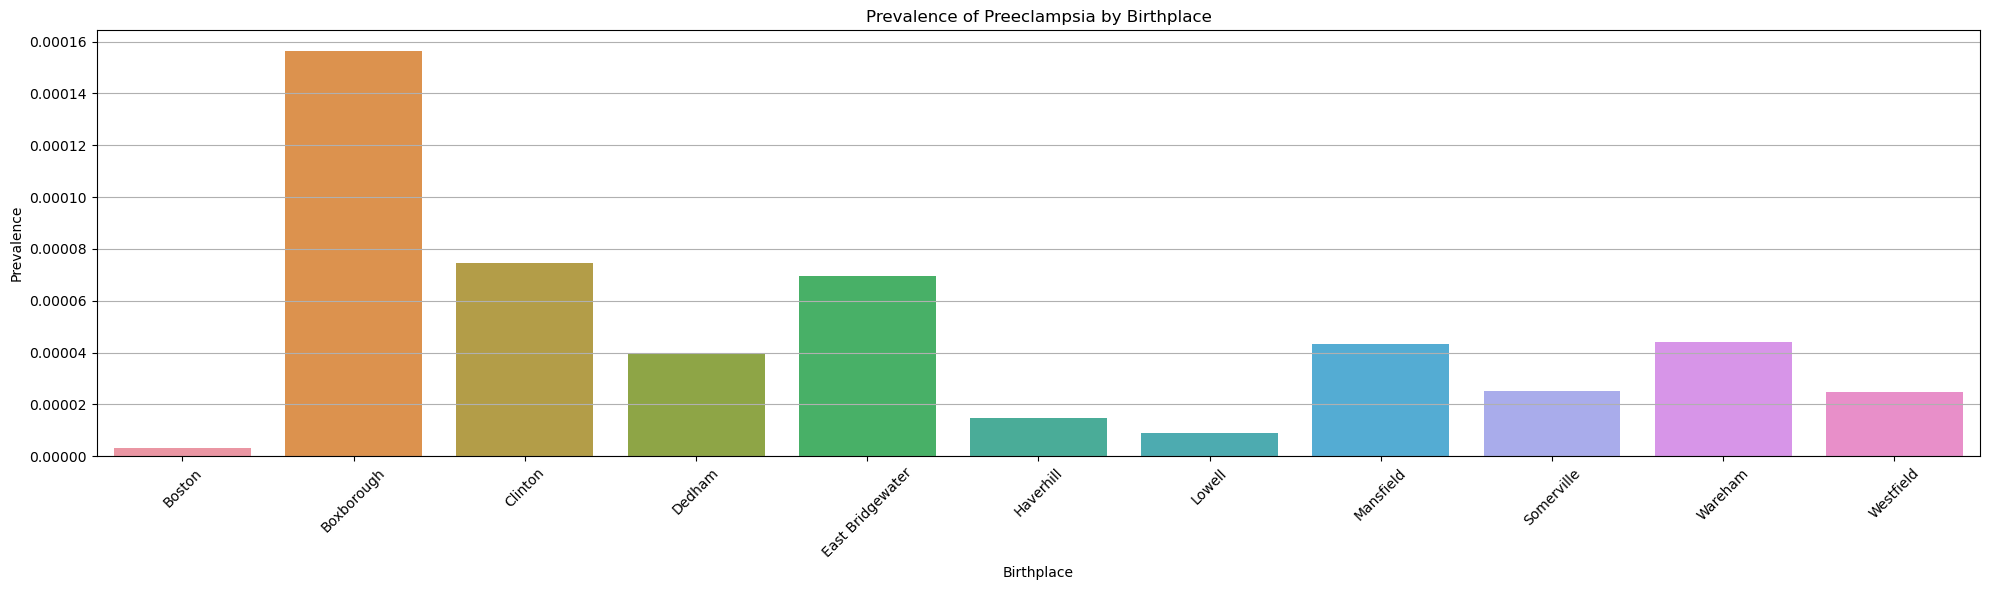

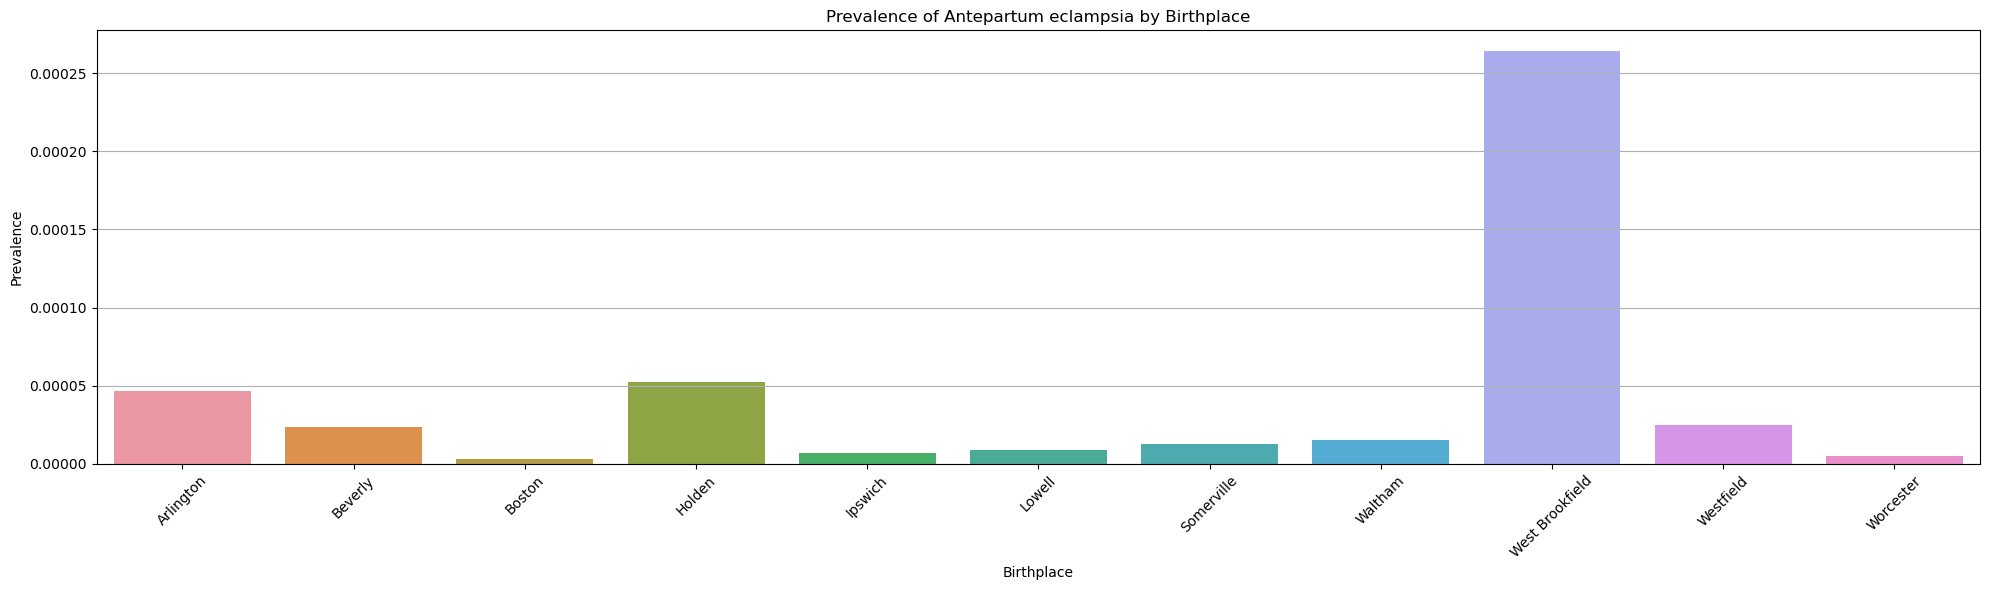

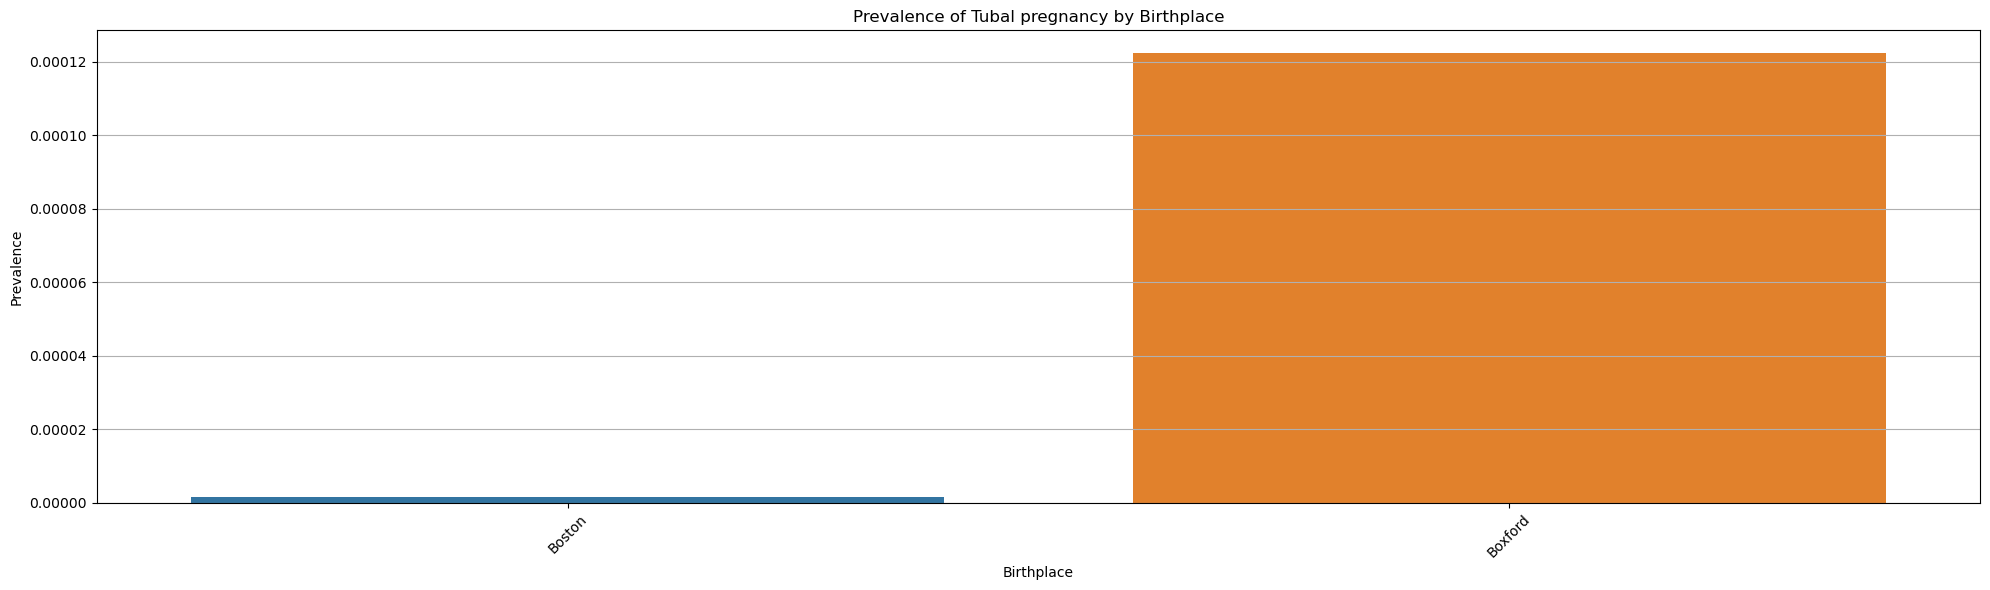

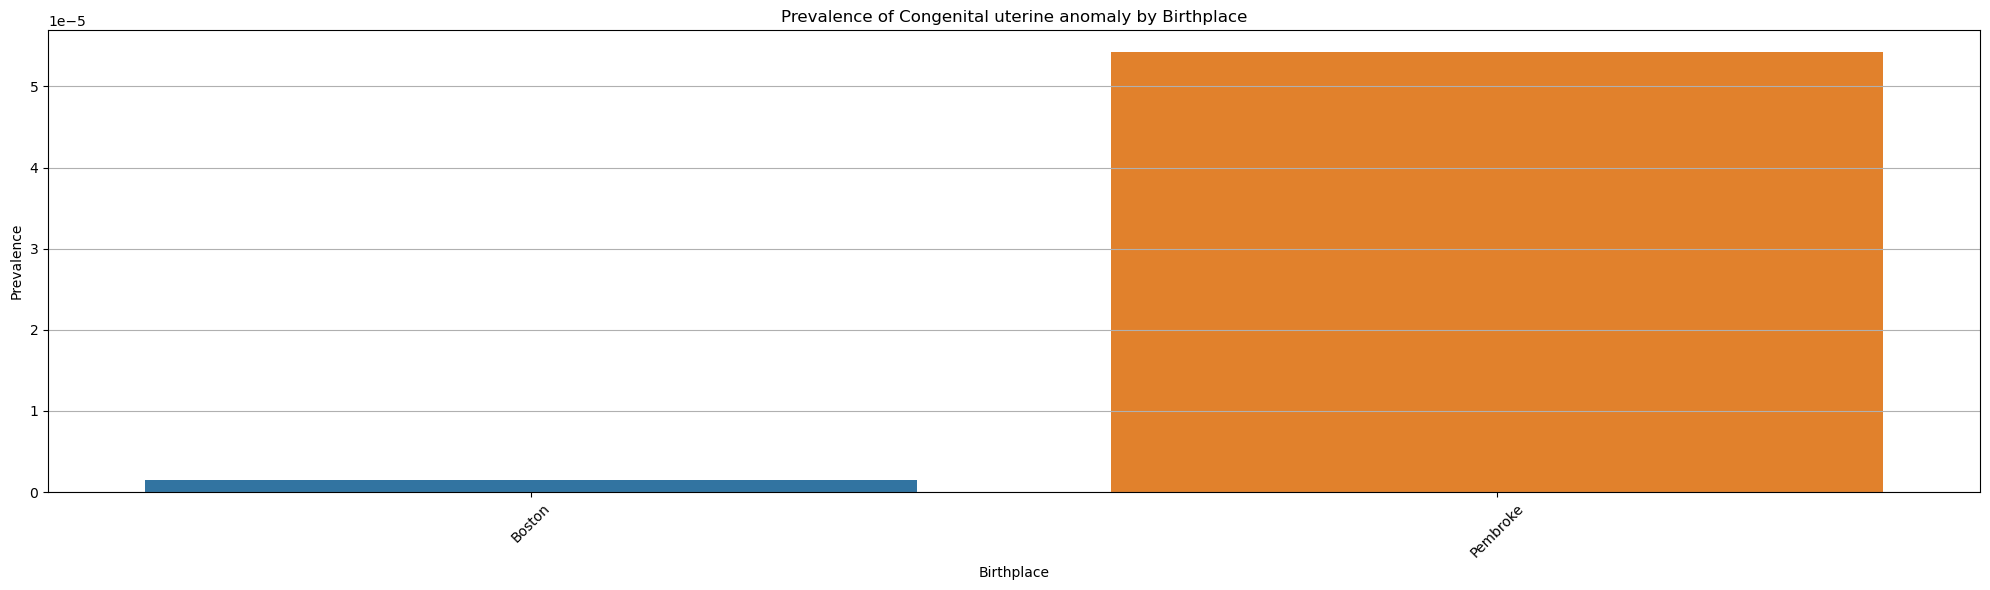

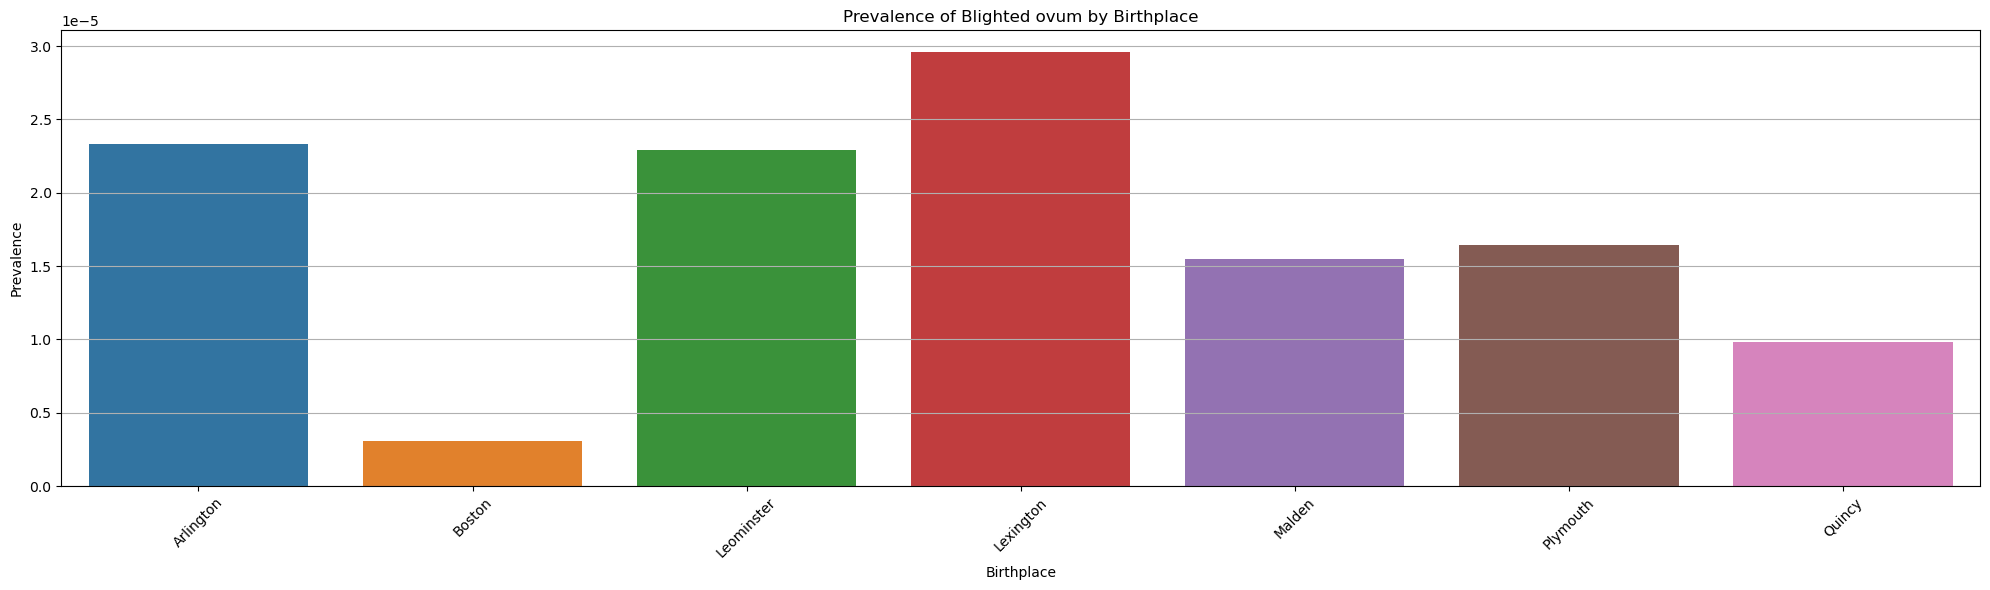

In [62]:
for condition_column in condition_columns:
    # Filter out birthplaces where prevalence is not zero
    filtered_data = prevdatapreg[prevdatapreg[f'prevalence_{condition_column}'] != 0]

    plt.figure(figsize=(20, 6))
    plt.grid()
    sns.barplot(x='birthplace', y=f'prevalence_{condition_column}', data=filtered_data)
    plt.title(f'Prevalence of {condition_column[:-11]} by Birthplace')
    plt.xlabel('Birthplace')
    plt.ylabel('Prevalence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()